In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Exercises

1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)



In [9]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

In [19]:
hw_data = pd.read_excel("EFWAndRGDP.xls")

In [20]:
hw_data = hw_data[hw_data["Countries"].isin(oecd_countries)]
hw_data

ISO_Code_3  Year ISO_Code_2              World Bank Region  \
5           AUS  2020         AU            East Asia & Pacific   
6           AUT  2020         AT          Europe & Central Asia   
13          BEL  2020         BE          Europe & Central Asia   
28          CAN  2020         CA                  North America   
31          CHL  2020         CL  Latin America & the Caribbean   
...         ...   ...        ...                            ...   
4432        SWE  1970         SE          Europe & Central Asia   
4433        CHE  1970         CH          Europe & Central Asia   
4443        TUR  1970         TR          Europe & Central Asia   
4447        GBR  1970         GB          Europe & Central Asia   
4448        USA  1970         US                  North America   

     World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
5                                                     H                                                                                     
6                                                     H                                                                                     
13                                                    H                                                                                     
28                                                    H                                                                                     
31                                                    H                                                                                     
...                                                 ...                                                                                     
4432                                                NaN                                                                                     
4433                                                NaN                                                                                     
4443                                                NaN                                                                                     
4447                                                NaN                                                                                     
4448                                                NaN                                                                                     

           Countries   Summary  Size of Government  \
5          Australia  8.040000            6.091321   
6            Austria  7.560000            4.929120   
13           Belgium  7.370000            4.324856   
28            Canada  7.810000            5.817909   
31             Chile  7.560000            7.680245   
...              ...       ...                 ...   
4432          Sweden  6.546508            3.764700   
4433     Switzerland  7.599282            7.597014   
4443          Turkey  4.277887            5.183333   
4447  United Kingdom  6.035320            4.622300   
4448   United States  7.615181            5.341231   

      Legal System and Property Rights  Sound Money  \
5                             8.336755     9.557660   
6                             8.388811     9.181004   
13                            7.515025     9.230280   
28                            8.019952     9.517202   
31                            6.678075     9.376363   
...                                ...          ...   
4432                          8.244318     6.515988   
4433                          7.567425     9.589409   
4443                          4.764211     5.476488   
4447                          7.344851     7.312995   
4448                          8.286741     9.588817   

      Freedom to Trade Internationally  Regulation  RGDP Per Capita  
5                             7.918387    8.272967              NaN  
6                             8.094356    7.201705       

In [21]:
hw_data = hw_data.set_index(["ISO_Code_3", "Year"])
hw_data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
AUS        2020         AU            East Asia & Pacific   
AUT        2020         AT          Europe & Central Asia   
BEL        2020         BE          Europe & Central Asia   
CAN        2020         CA                  North America   
CHL        2020         CL  Latin America & the Caribbean   
...                    ...                            ...   
SWE        1970         SE          Europe & Central Asia   
CHE        1970         CH          Europe & Central Asia   
TUR        1970         TR          Europe & Central Asia   
GBR        1970         GB          Europe & Central Asia   
USA        1970         US                  North America   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
AUS        2020                                                  H                                                                                     
AUT        2020                                                  H                                                                                     
BEL        2020                                                  H                                                                                     
CAN        2020                                                  H                                                                                     
CHL        2020                                                  H                                                                                     
...                                                            ...                                                                                     
SWE        1970                                                NaN                                                                                     
CHE        1970                                                NaN                                                                                     
TUR        1970                                                NaN                                                                                     
GBR        1970                                                NaN                                                                                     
USA        1970                                                NaN                                                                                     

                      Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AUS        2020       Australia  8.040000            6.091321   
AUT        2020         Austria  7.560000            4.929120   
BEL        2020         Belgium  7.370000            4.324856   
CAN        2020          Canada  7.810000            5.817909   
CHL        2020           Chile  7.560000            7.680245   
...                         ...       ...                 ...   
SWE        1970          Sweden  6.546508            3.764700   
CHE        1970     Switzerland  7.599282            7.597014   
TUR        1970          Turkey  4.277887            5.183333   
GBR        1970  United Kingdom  6.035320            4.622300   
USA        1970   United States  7.615181            5.341231   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AUS        2020                          8.336755     9.557660   
AUT        2020                          8.388811     9.181004   
BEL        2020                          7.515025     9.230280   
CAN        2020                          8.019952     9.517202   
CHL

In [22]:
hw_data.keys()

Index(['ISO_Code_2', 'World Bank Region',
       'World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)',
       'Countries', 'Summary', 'Size of Government',
       'Legal System and Property Rights', 'Sound Money',
       'Freedom to Trade Internationally', 'Regulation', 'RGDP Per Capita'],
      dtype='object')

In [23]:
data = hw_data[hw_data.keys()[4:]]
data

Summary  Size of Government  \
ISO_Code_3 Year                                 
AUS        2020  8.040000            6.091321   
AUT        2020  7.560000            4.929120   
BEL        2020  7.370000            4.324856   
CAN        2020  7.810000            5.817909   
CHL        2020  7.560000            7.680245   
...                   ...                 ...   
SWE        1970  6.546508            3.764700   
CHE        1970  7.599282            7.597014   
TUR        1970  4.277887            5.183333   
GBR        1970  6.035320            4.622300   
USA        1970  7.615181            5.341231   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AUS        2020                          8.336755     9.557660   
AUT        2020                          8.388811     9.181004   
BEL        2020                          7.515025     9.230280   
CAN        2020                          8.019952     9.517202   
CHL        2020                          6.678075     9.376363   
...                                           ...          ...   
SWE        1970                          8.244318     6.515988   
CHE        1970                          7.567425     9.589409   
TUR        1970                          4.764211     5.476488   
GBR        1970                          7.344851     7.312995   
USA        1970                          8.286741     9.588817   

                 Freedom to Trade Internationally  Regulation  RGDP Per Capita  
ISO_Code_3 Year                                                                 
AUS        2020                          7.918387    8.272967              NaN  
AUT        2020                          8.094356    7.201705              NaN  
BEL        2020                          8.031710    7.750047              NaN  
CAN        2020                          7.750840    7.956916              NaN  
CHL        2020                          7.374200    6.670284              NaN  
...                                           ...         ...              ...  
SWE        1970                          7.017093    7.360023       20269.0000  
CHE        1970                          6.426513    6.846434       23478.9918  
TUR        1970                          0.246240    5.578751        4398.0000  
GBR        1970                          3.981406    7.489366       17162.0000  
USA        1970                          8.232334    6.631262       23958.0000  

[972 rows x 7 columns]

In [24]:
data.sort_index(inplace = True)
data

C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\1074359210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace = True)


Summary  Size of Government  \
ISO_Code_3 Year                                 
AUS        1970  7.291154            6.863768   
           1975  7.002204            6.255684   
           1980  7.316469            6.339449   
           1985  7.670016            6.259326   
           1990  7.927001            6.708215   
...                   ...                 ...   
USA        2016  8.339536            7.252009   
           2017  8.379486            7.354358   
           2018  8.279612            7.409095   
           2019  8.249649            7.320058   
           2020  7.970000            6.790621   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AUS        1970                          7.775615     9.581113   
           1975                          8.034445     8.346907   
           1980                          8.037057     9.085686   
           1985                          8.540345     9.089736   
           1990                          8.398730     9.018318   
...                                           ...          ...   
USA        2016                          7.793107     9.814703   
           2017                          7.802657     9.772320   
           2018                          7.646530     9.772494   
           2019                          7.644319     9.747903   
           2020                          7.555009     9.626843   

                 Freedom to Trade Internationally  Regulation  RGDP Per Capita  
ISO_Code_3 Year                                                                 
AUS        1970                          5.882101    6.335298       19166.0000  
           1975                          5.692162    6.761980       20993.0000  
           1980                          5.841104    7.389934       22972.0000  
           1985                          6.985368    7.469774       24927.0000  
           1990                          7.661409    7.750886       27373.0000  
...                                           ...         ...              ...  
USA        2016                          7.889129    8.952382       53015.0000  
           2017                          7.921225    9.031901       54007.7698  
           2018                          7.783384    8.784245       55334.7394  
           2019                          7.829949    8.682216              NaN  
           2020                          7.765508    8.109914              NaN  

[972 rows x 7 columns]

In [25]:
reg_vars = list(data.keys())
reg_vars

['Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [26]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[2:-1]
y_var, x_vars

(['RGDP Per Capita'],
 ['Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation'])

In [27]:
reg_data = data[reg_vars].dropna()

In [ ]:
y = reg_data[y_var]
x = reg_data[x_vars]
x["Constant"] = 1
x

In [28]:
years_diff = 5
reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff) 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan)

In [29]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]

C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\3653804004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [30]:
reg_data["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].groupby("ISO_Code_3").shift(years_diff) 
x_vars.append("RGDP Per Capita Lag")
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_data["Predictor"] = results.predict()

C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\3121657441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()


In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     23.47
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.54e-21
Time:                        11:47:48   Log-Likelihood:                 485.48
No. Observations:                 534   AIC:                            -959.0
Df Residuals:                     528   BIC:                            -933.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal System and Property Rights    -0.0182      0.005     -3.511      0.000      -0.028      -0.008
Sound Money                         -0.0394      0.008     -4.762      0.000      -0.056      -0.023
Freedom to Trade Internationally     0.0289      0.010      3.018      0.003       0.010       0.048
Regulation                           0.0180      0.008      2.386      0.017       0.003       0.033
RGDP Per Capita Lag                  0.1674      0.020      8.524      0.000       0.129       0.206
Constant                             0.1854      0.074      2.493      0.013       0.039       0.332
==============================================================================
Omnibus:                       87.985   Durbin-Watson:                   0.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.469
Skew:                           0.726   Prob(JB):                     3.82e-68
Kurtosis:                       6.441   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.





C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\2375389319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<AxesSubplot: ylabel='Frequency'>

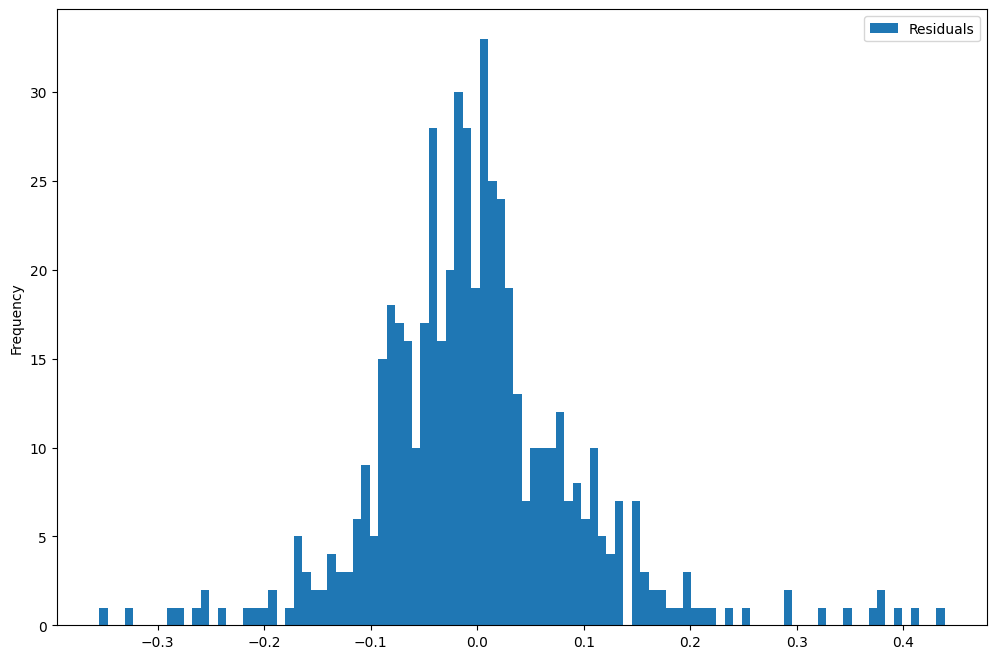

In [46]:
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))
r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

The residuals in the first regression from the lesson were skewed to the right and did not follow a normal distribution. The residuals from this regression, on the other hand, do not appear to be skewed left or right and appear to be much closer to a normal distribution. Due to the fewer observations, there are fewer residuals, so the distribution appears more "spikey" than the first. If there were more residuals to plot, however, it is likely that the distribution would smooth out.

3. Plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). ThenPlot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the resdiuals when controlling for each variable? Why does this matter?

In [47]:
X.keys()

Index(['Legal System and Property Rights', 'Sound Money',
       'Freedom to Trade Internationally', 'Regulation', 'RGDP Per Capita Lag',
       'Constant'],
      dtype='object')

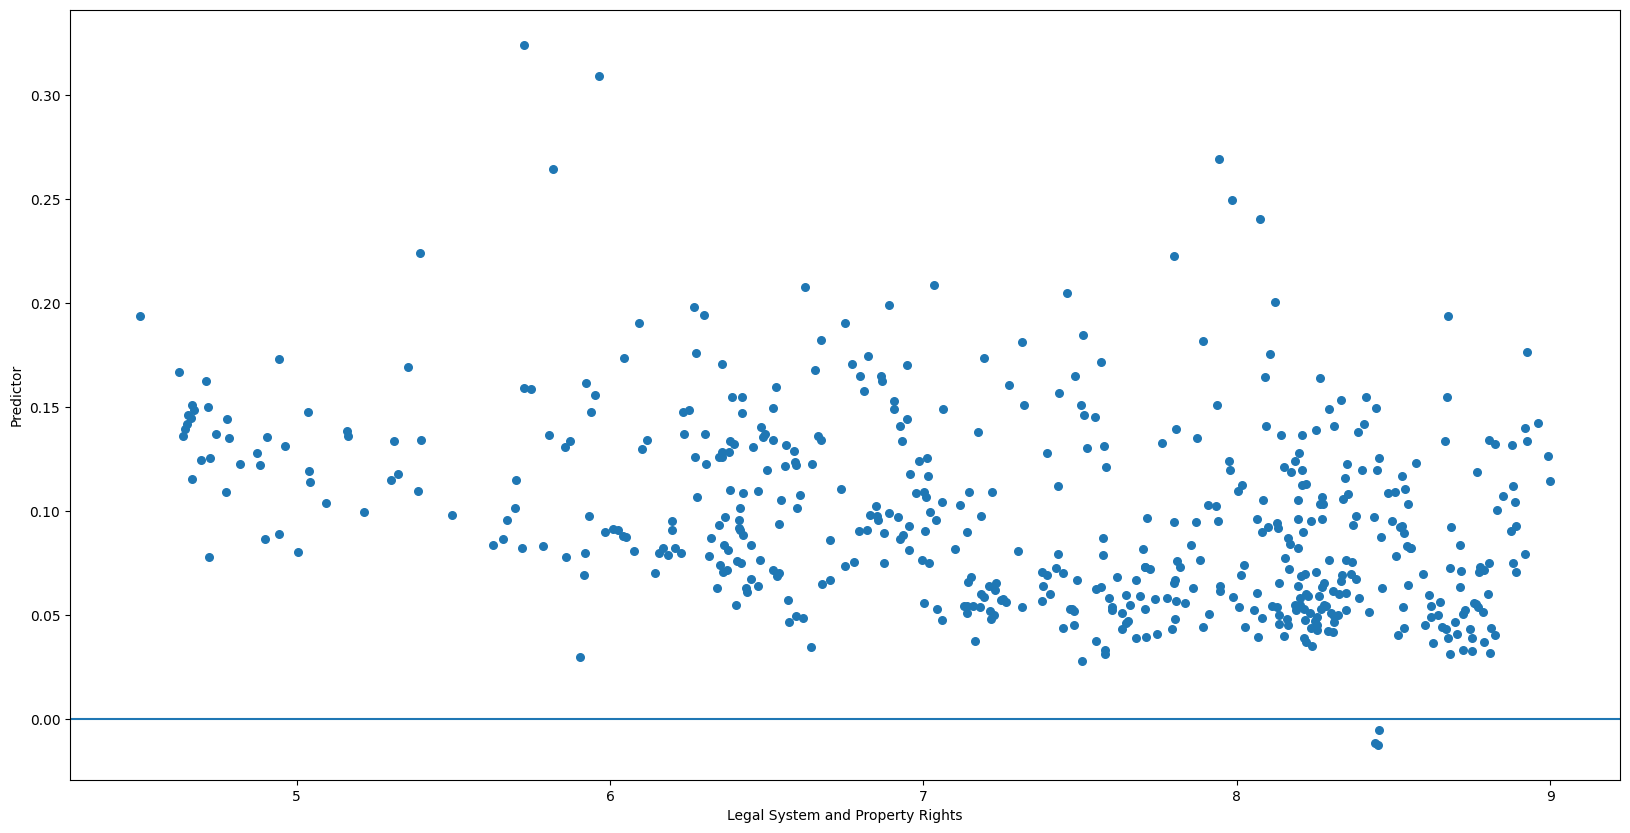

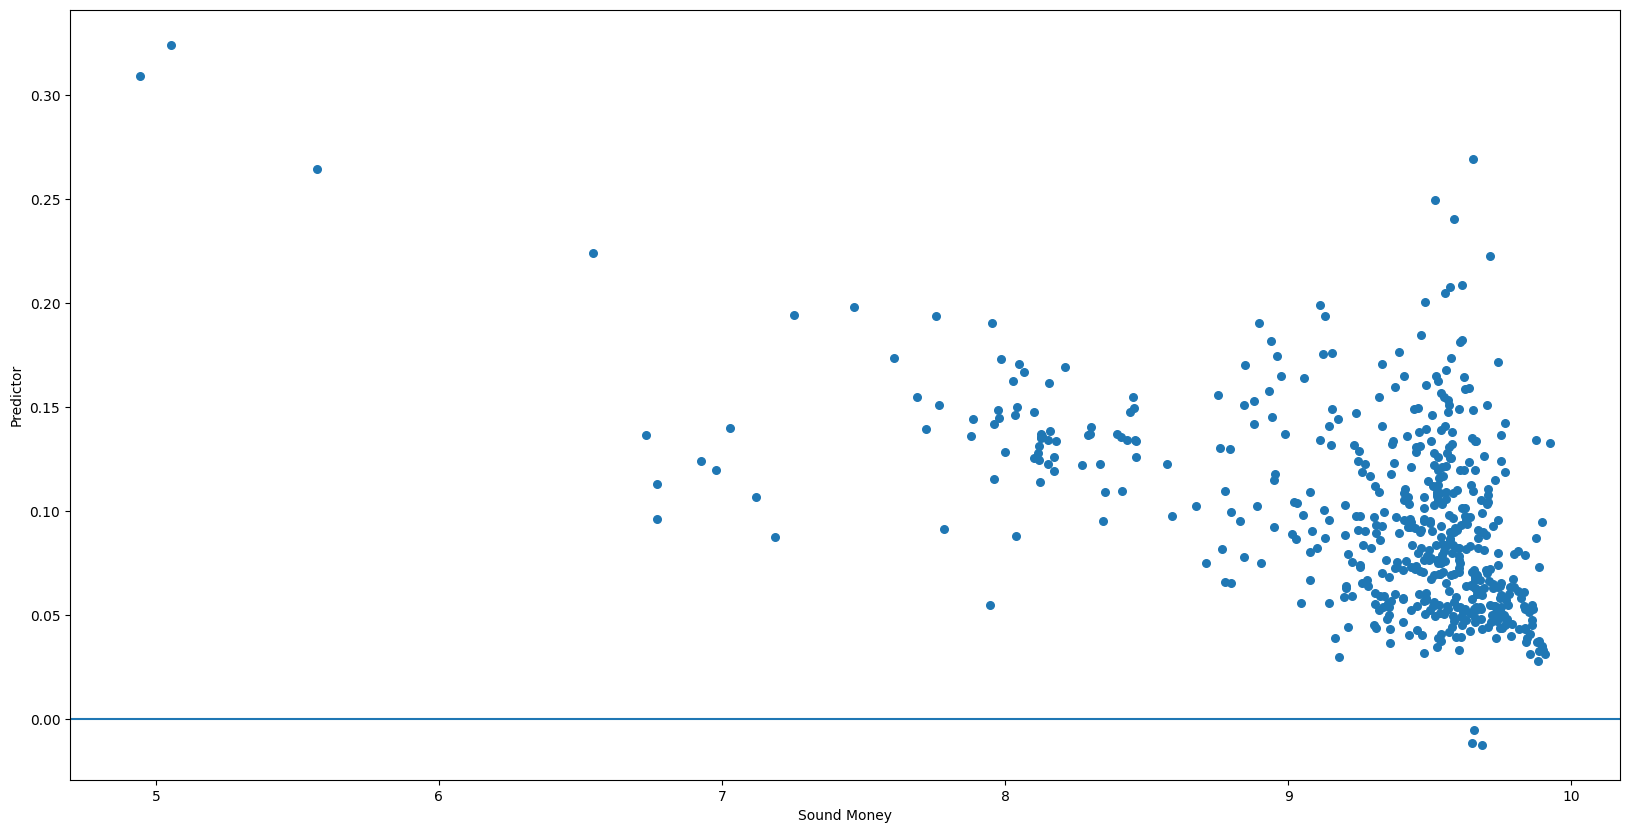

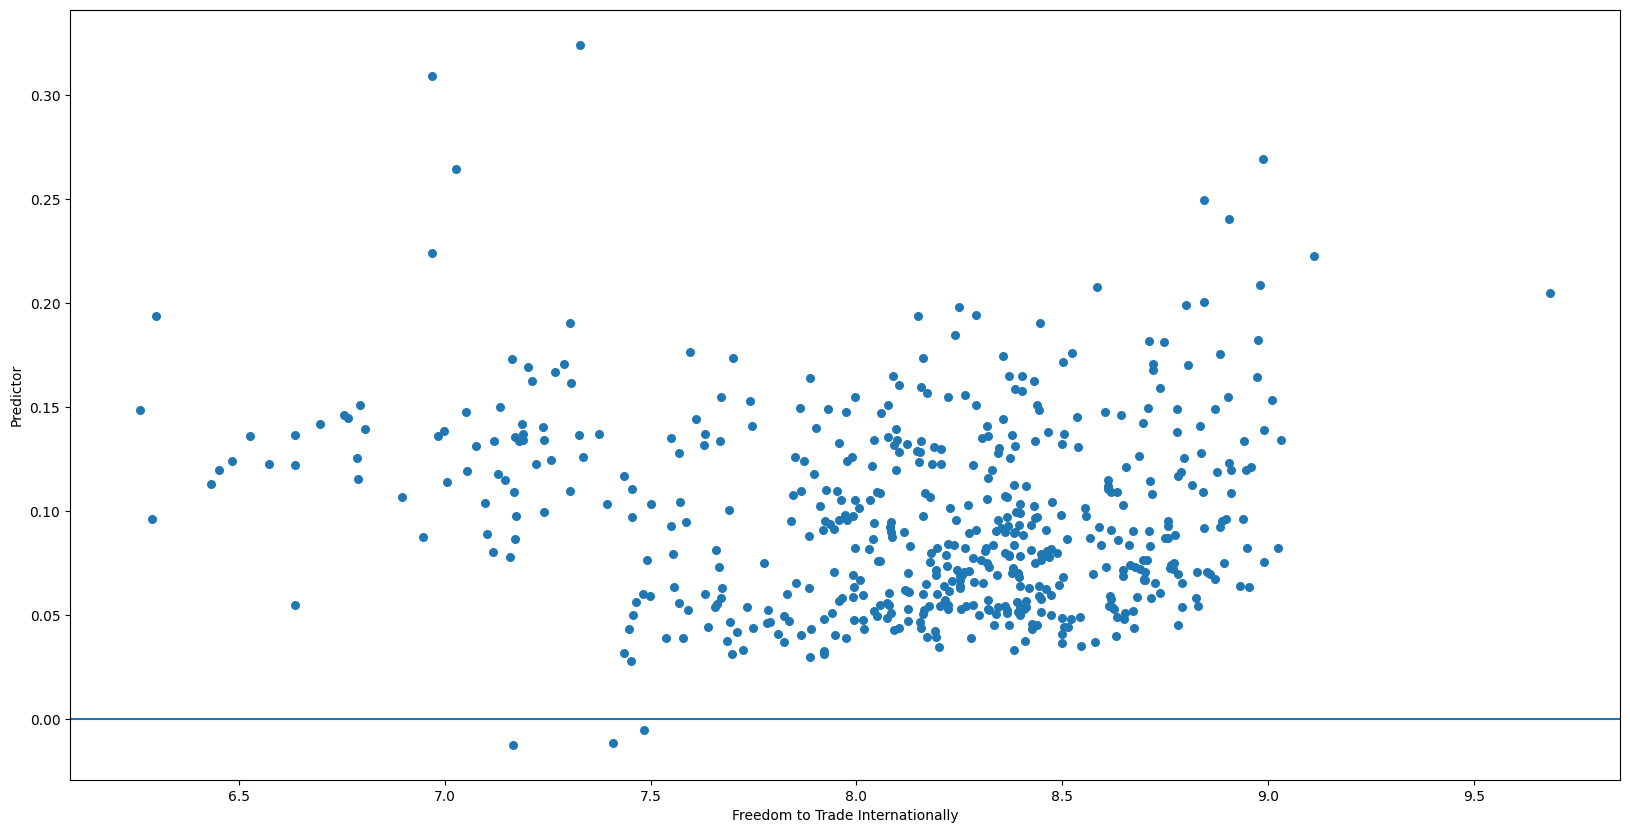

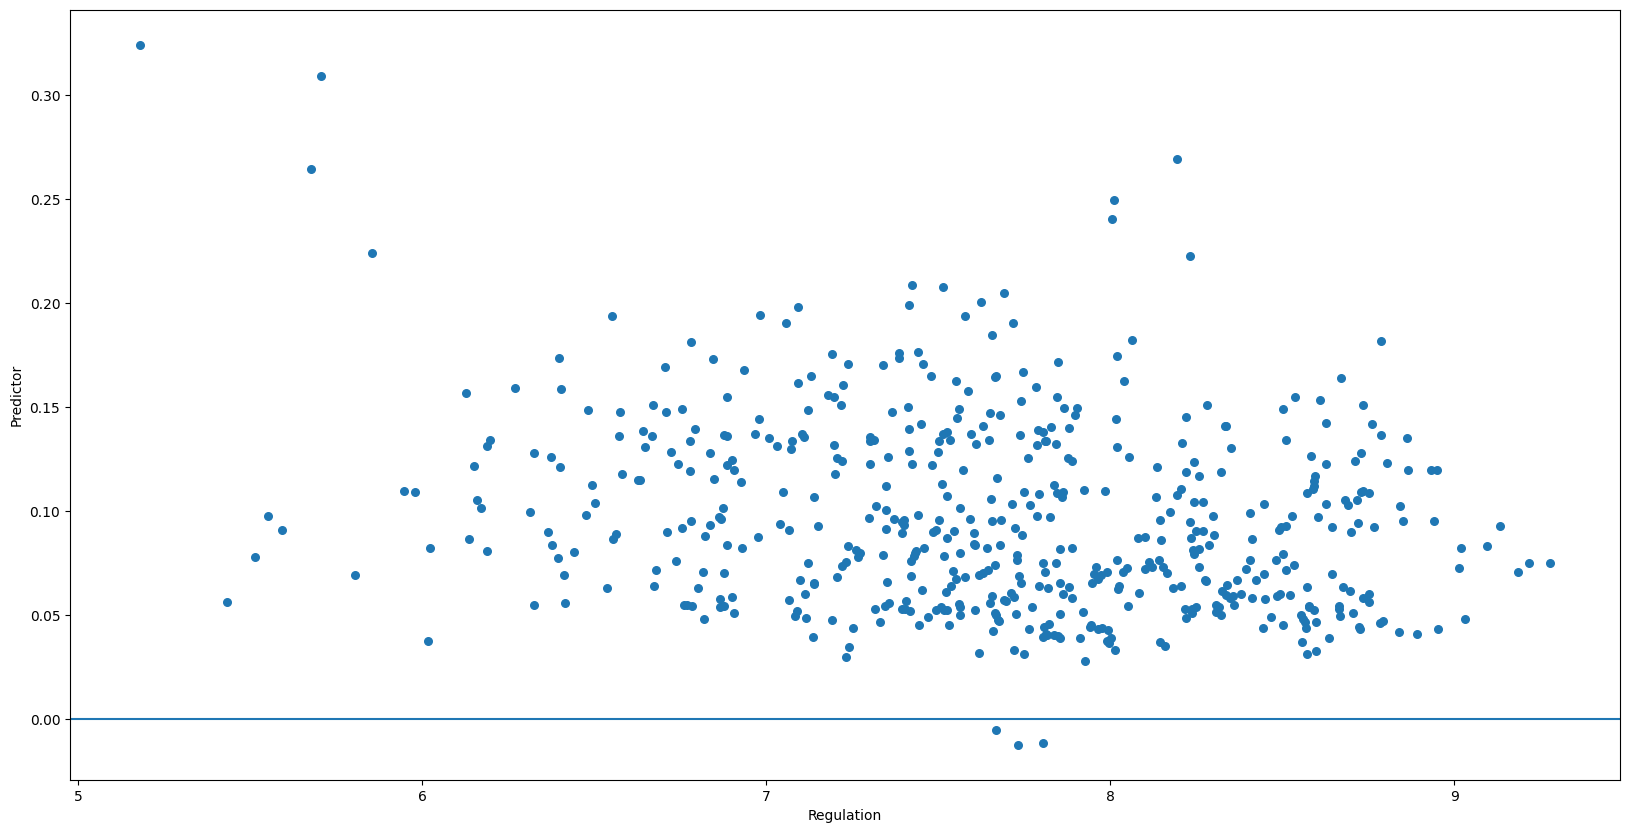

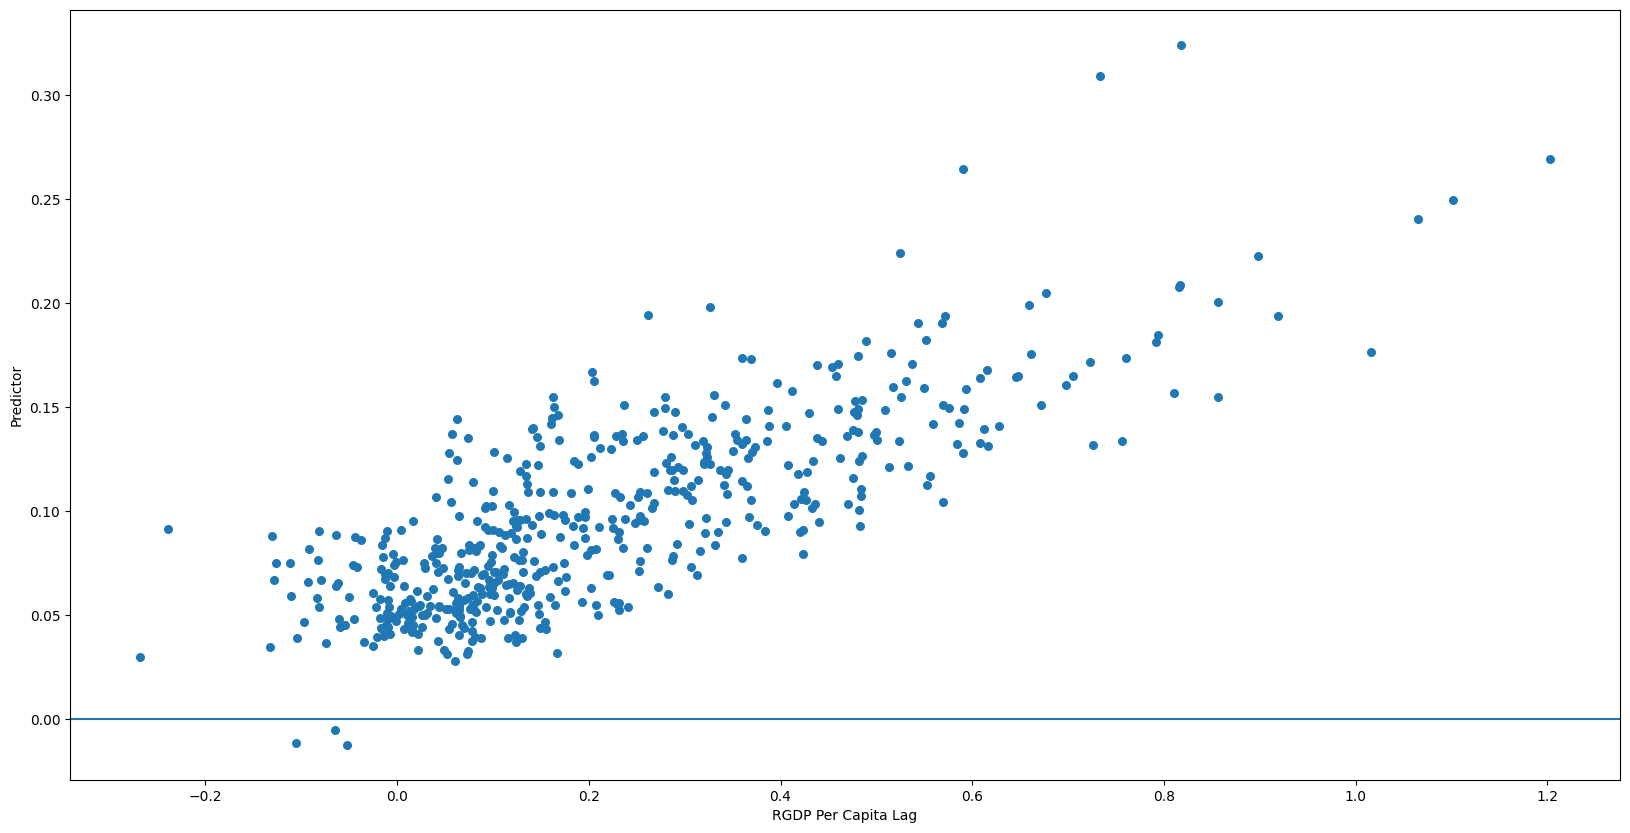

In [50]:
for key in X.keys()[:-1]:
    fig, ax = plt.subplots(figsize=(20,10))
    r_data.plot.scatter(x = key,
                 y = "Predictor", 
                  s = 30, ax = ax)

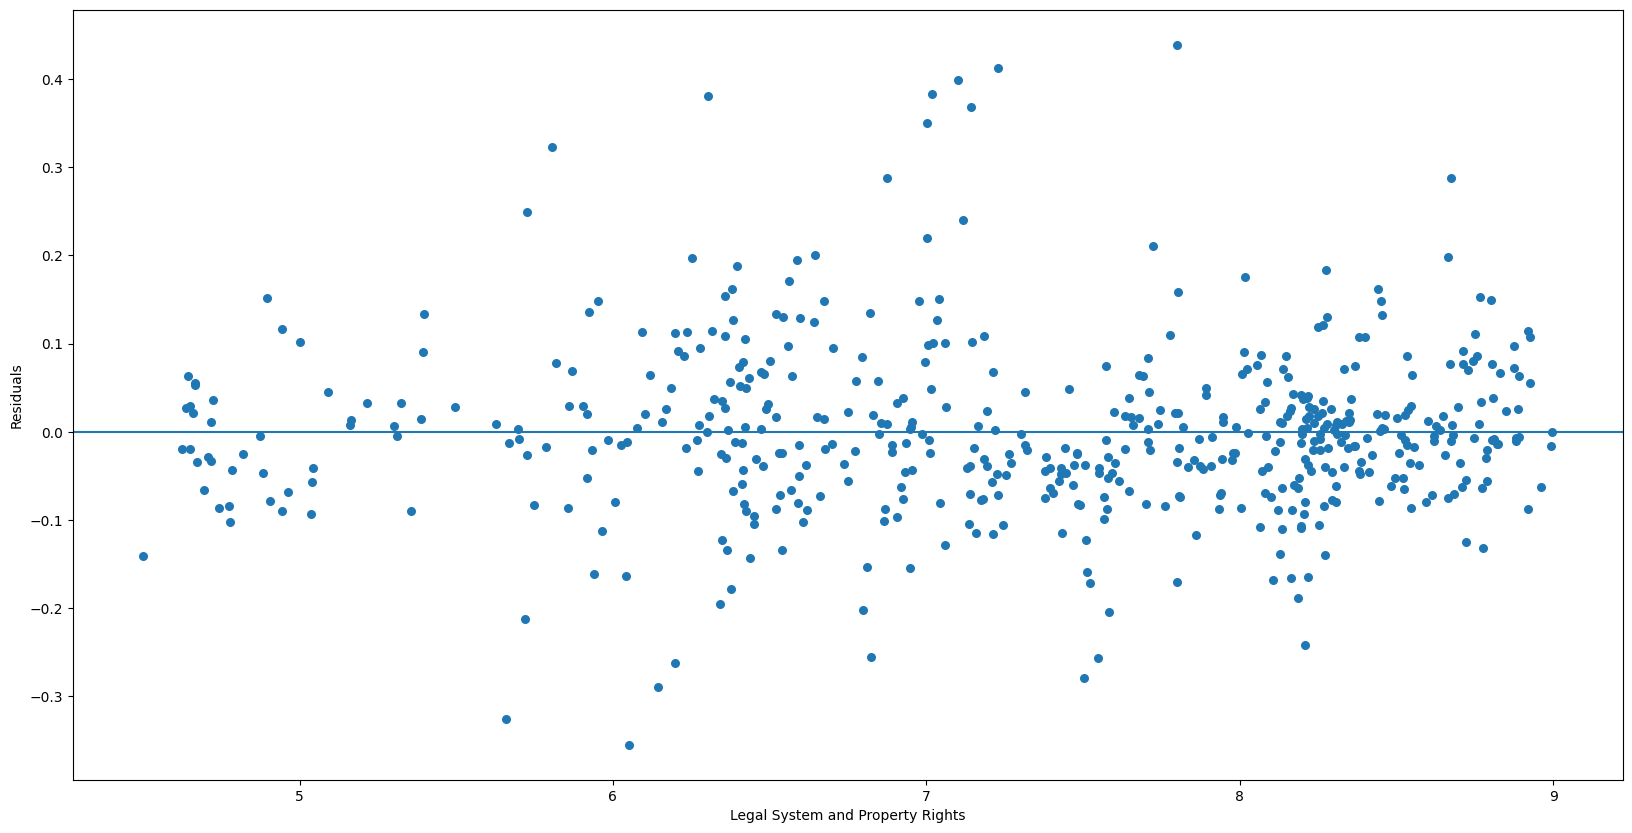

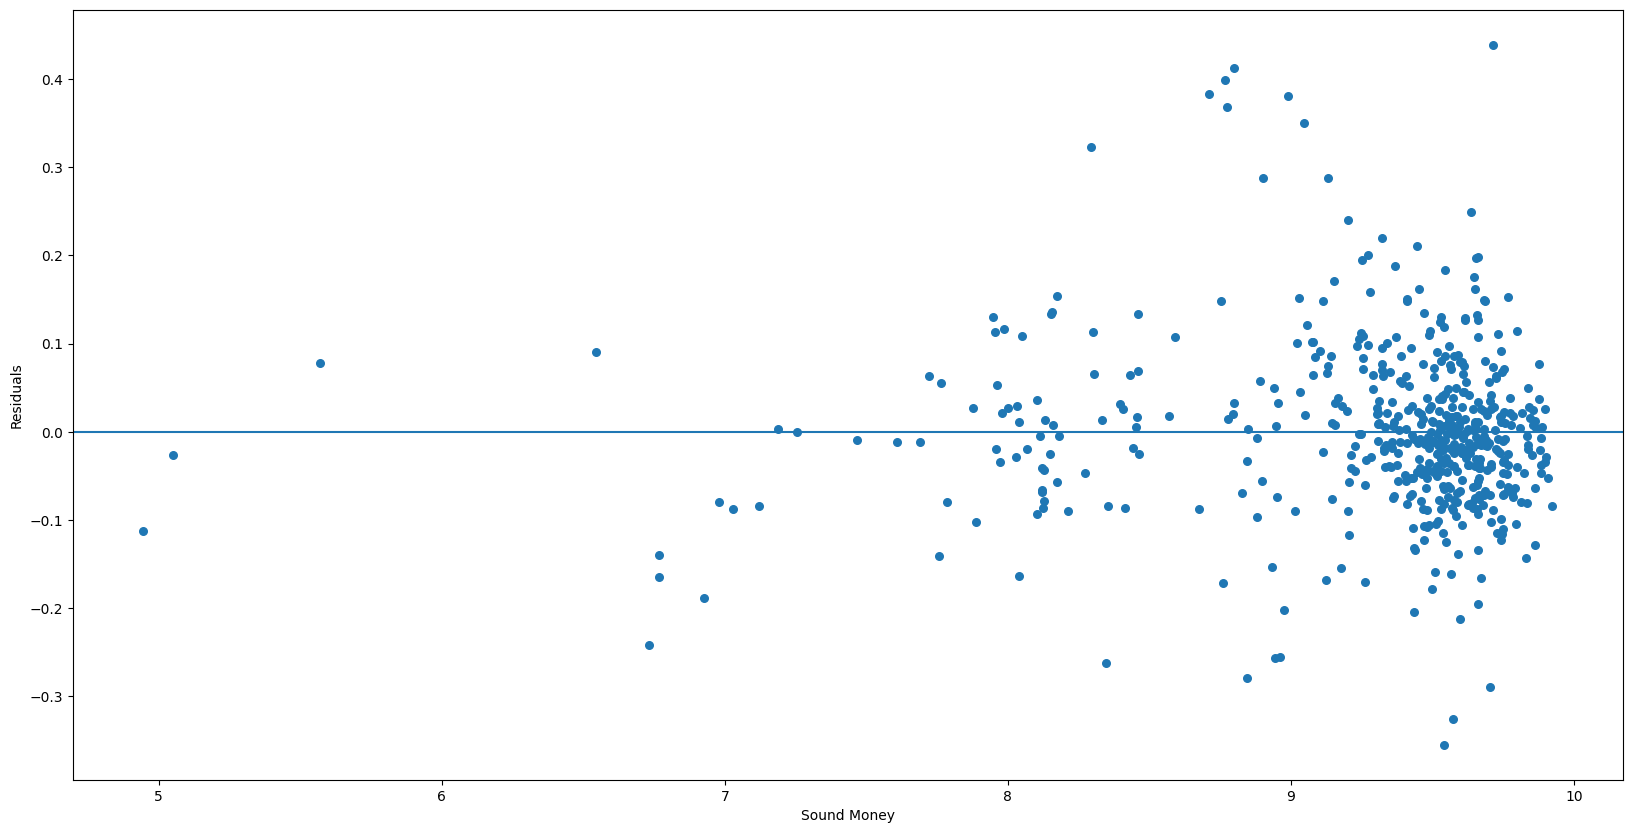

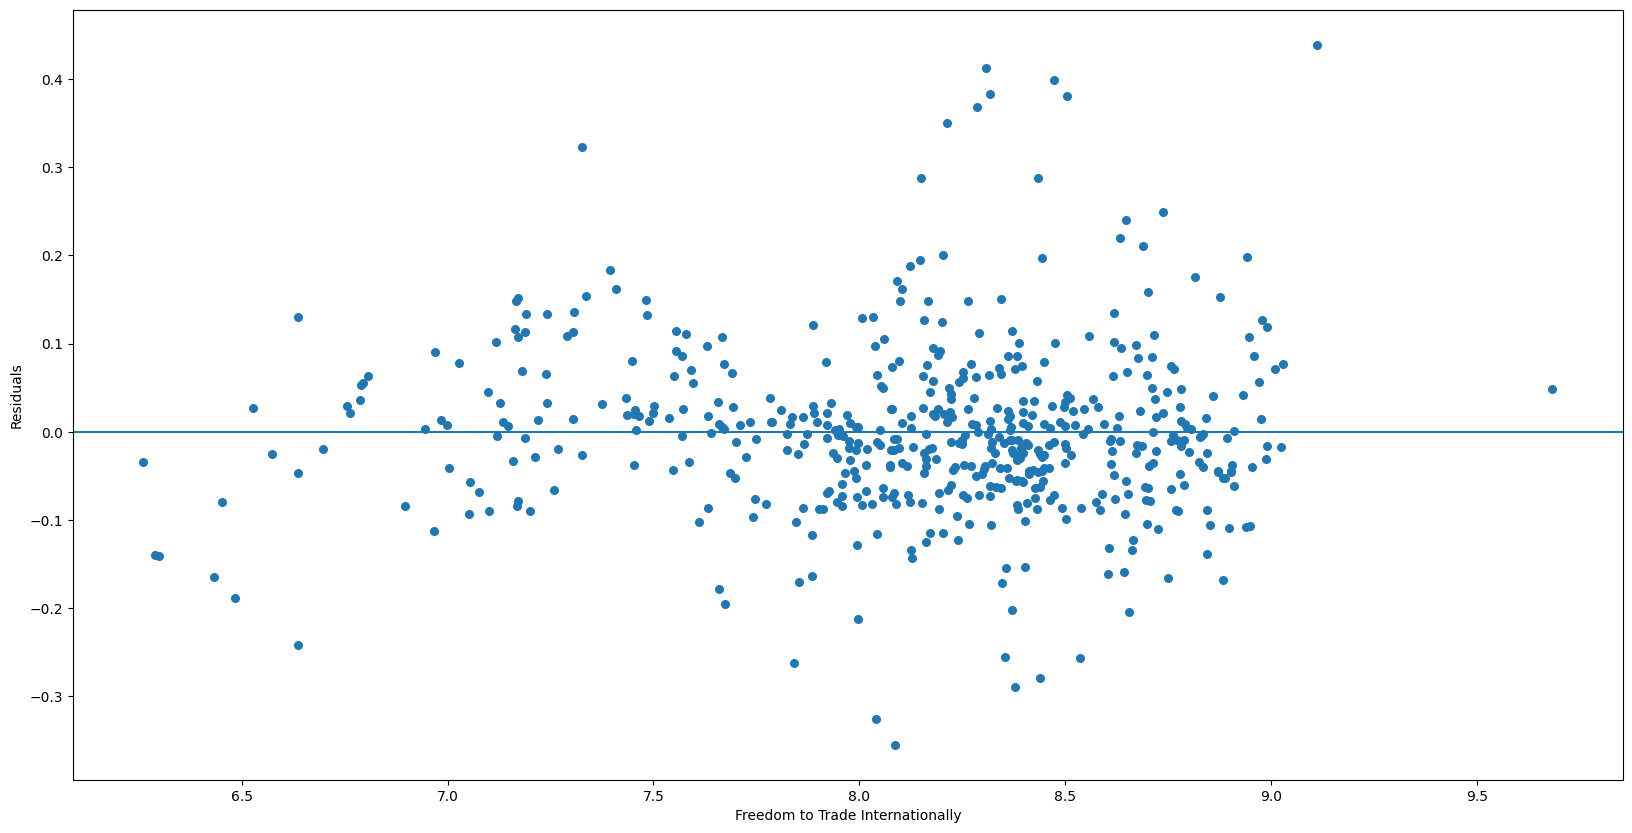

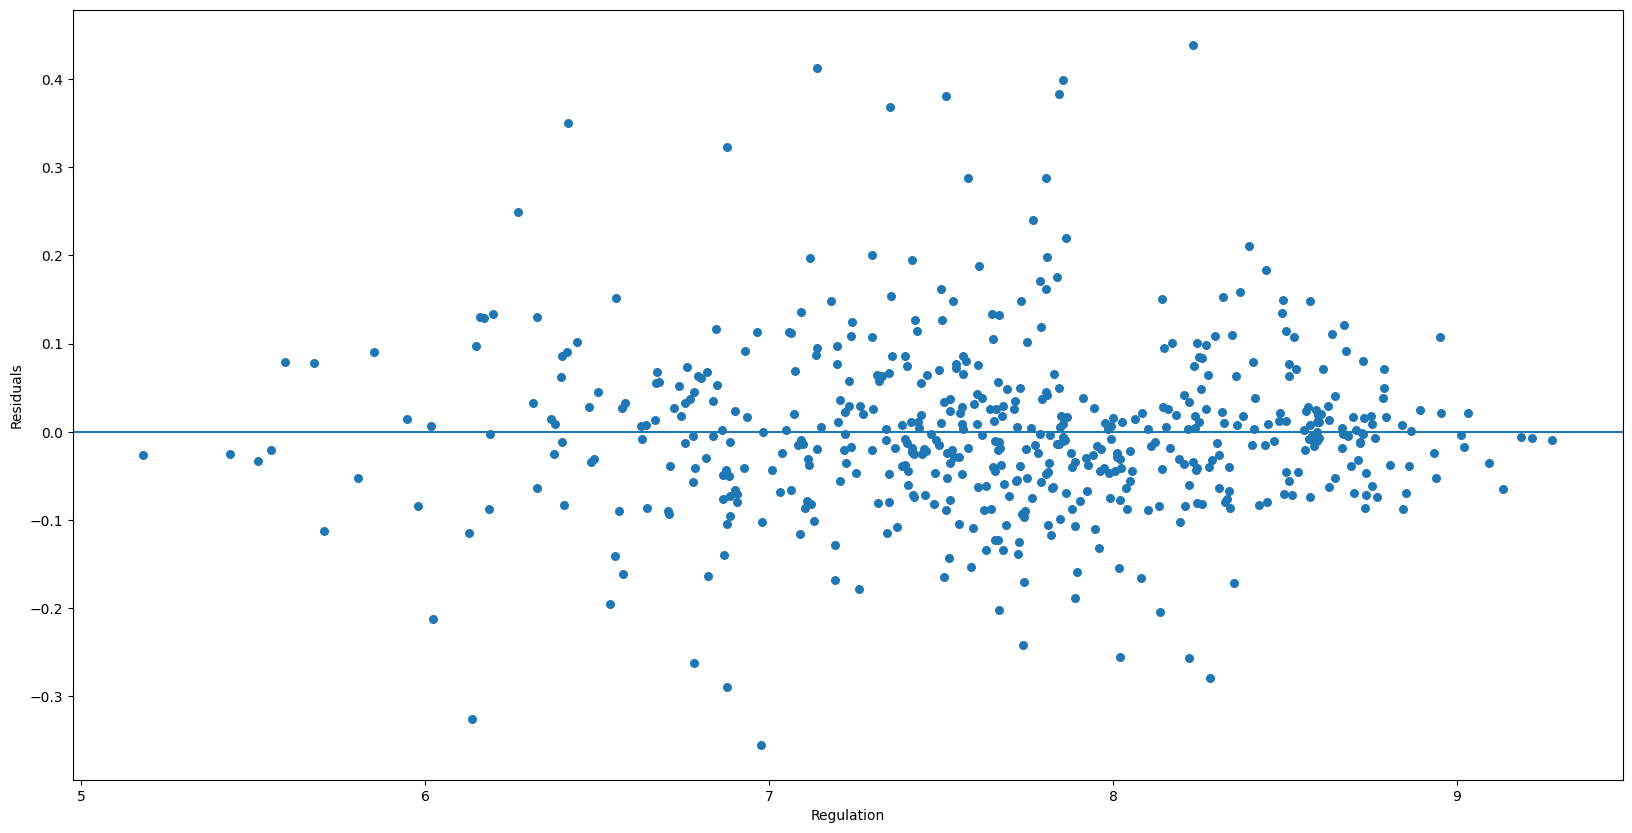

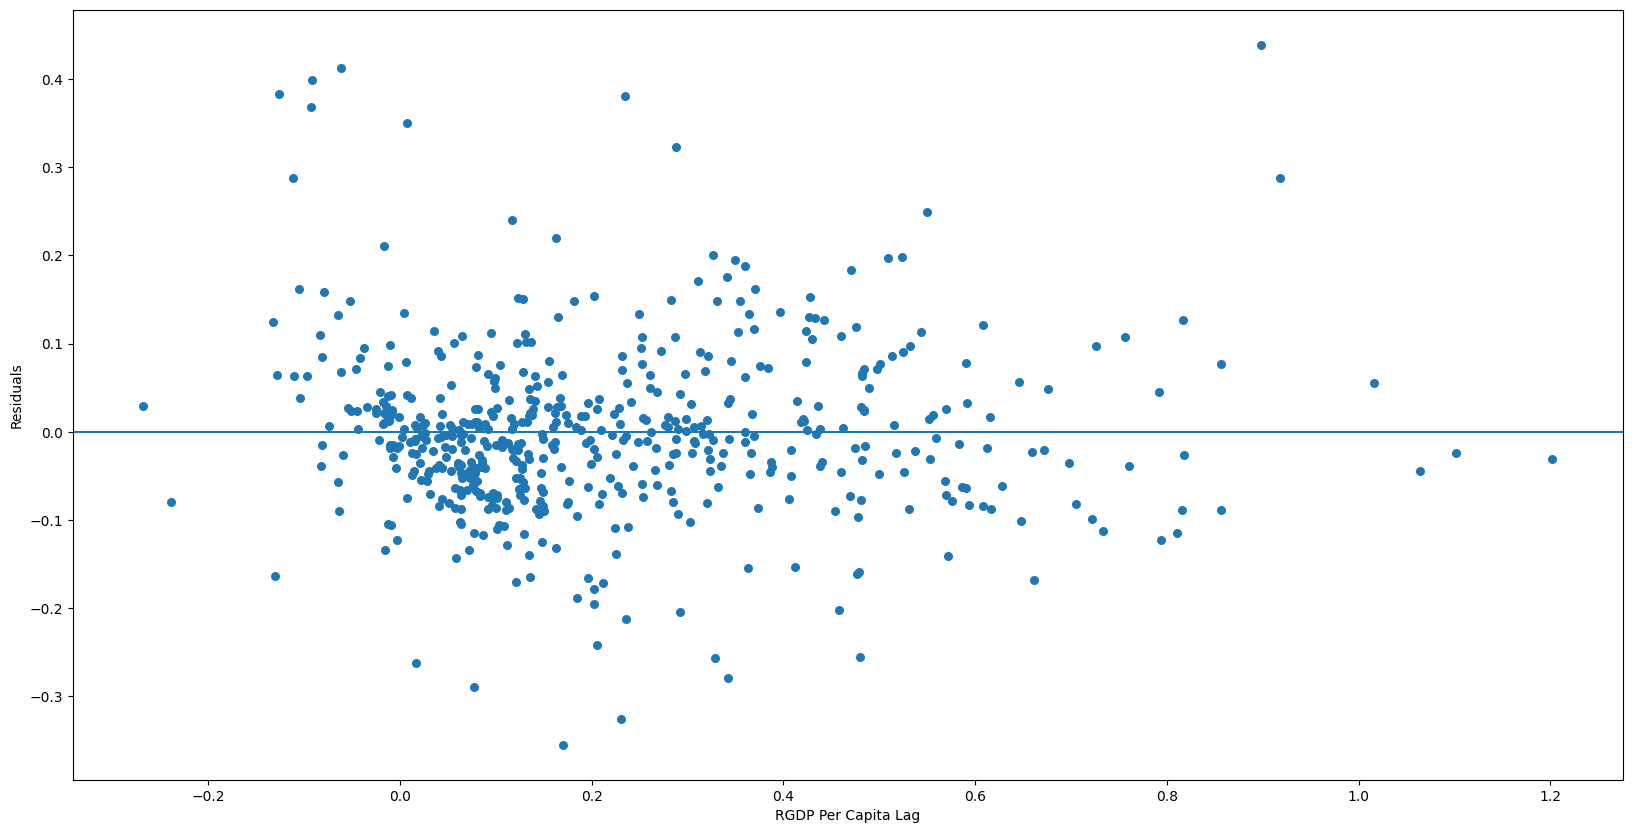

In [51]:
for key in X.keys()[:-1]:
    fig, ax = plt.subplots(figsize=(20,10))
    r_data.plot.scatter(x = key,
                 y = "Residuals", 
                  s = 30, ax = ax)
    ax.axhline(0)

All of the residuals still seems to be centered around zero after controlling for each variable. If bias were to be found, it may suggest that there is a relationship between the residuals and the independent variable that is not captured by the model. This pattern could indicate that the model is misspecified and that there are omitted variables or functional form misspecification.

Another possible explanation for biased residuals is that there is heteroscedasticity, which means that the variance of the residuals is not constant across the range of the independent variable. This could lead to biased estimates of the standard errors of the coefficients and, consequently, to incorrect inference.

4. Plot the observed and predicted values of RGDP Per Capita for each individual country.



In [53]:
plot_data = r_data[["RGDP Per Capita", "Predictor"]]
plot_data

RGDP Per Capita  Predictor
ISO_Code_3 Year                            
AUS        2004         0.286891   0.103299
           2005         0.135260   0.116785
           2006         0.134701   0.110256
           2007         0.132554   0.103506
           2008         0.116827   0.097067
...                          ...        ...
USA        2014         0.064168   0.047105
           2015         0.065292   0.040617
           2016         0.065073   0.043324
           2017         0.069256   0.048227
           2018         0.084265   0.046239

[534 rows x 2 columns]

C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\2352673932.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (20,10))


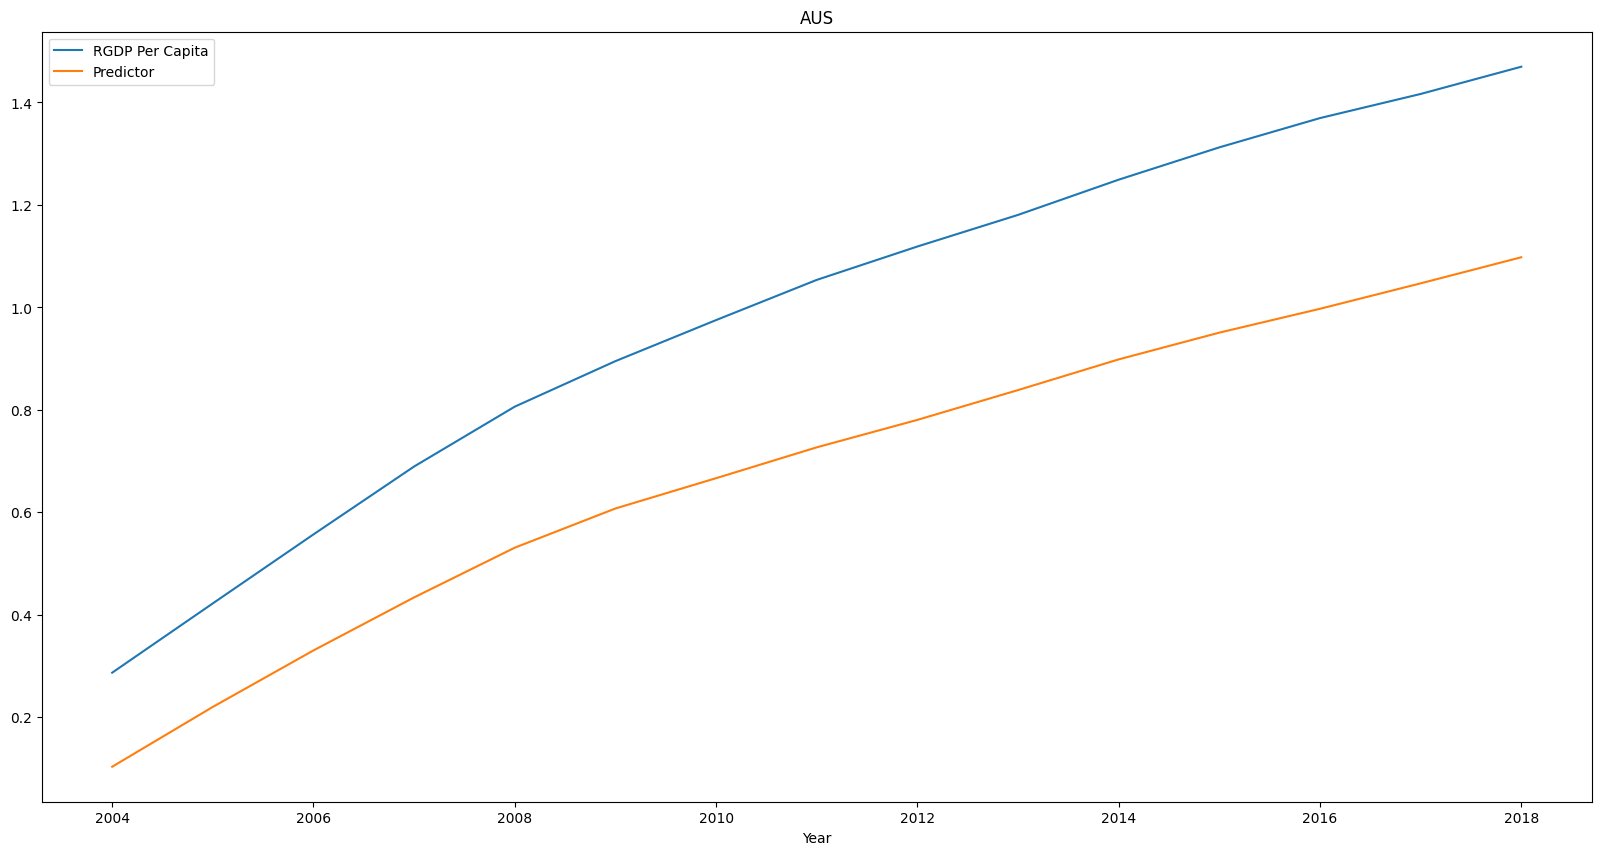

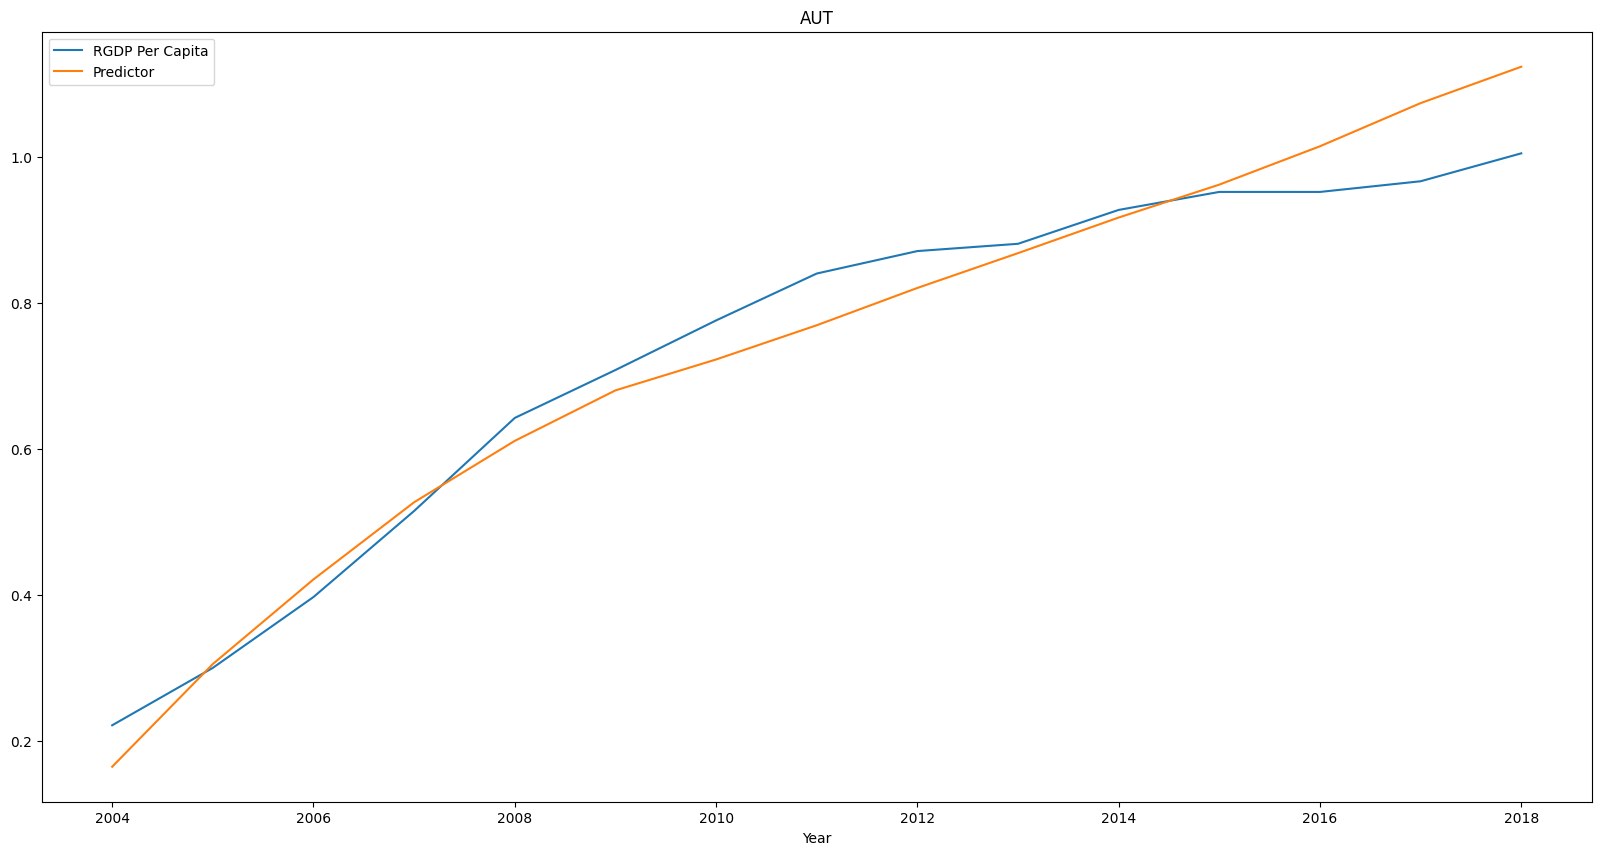

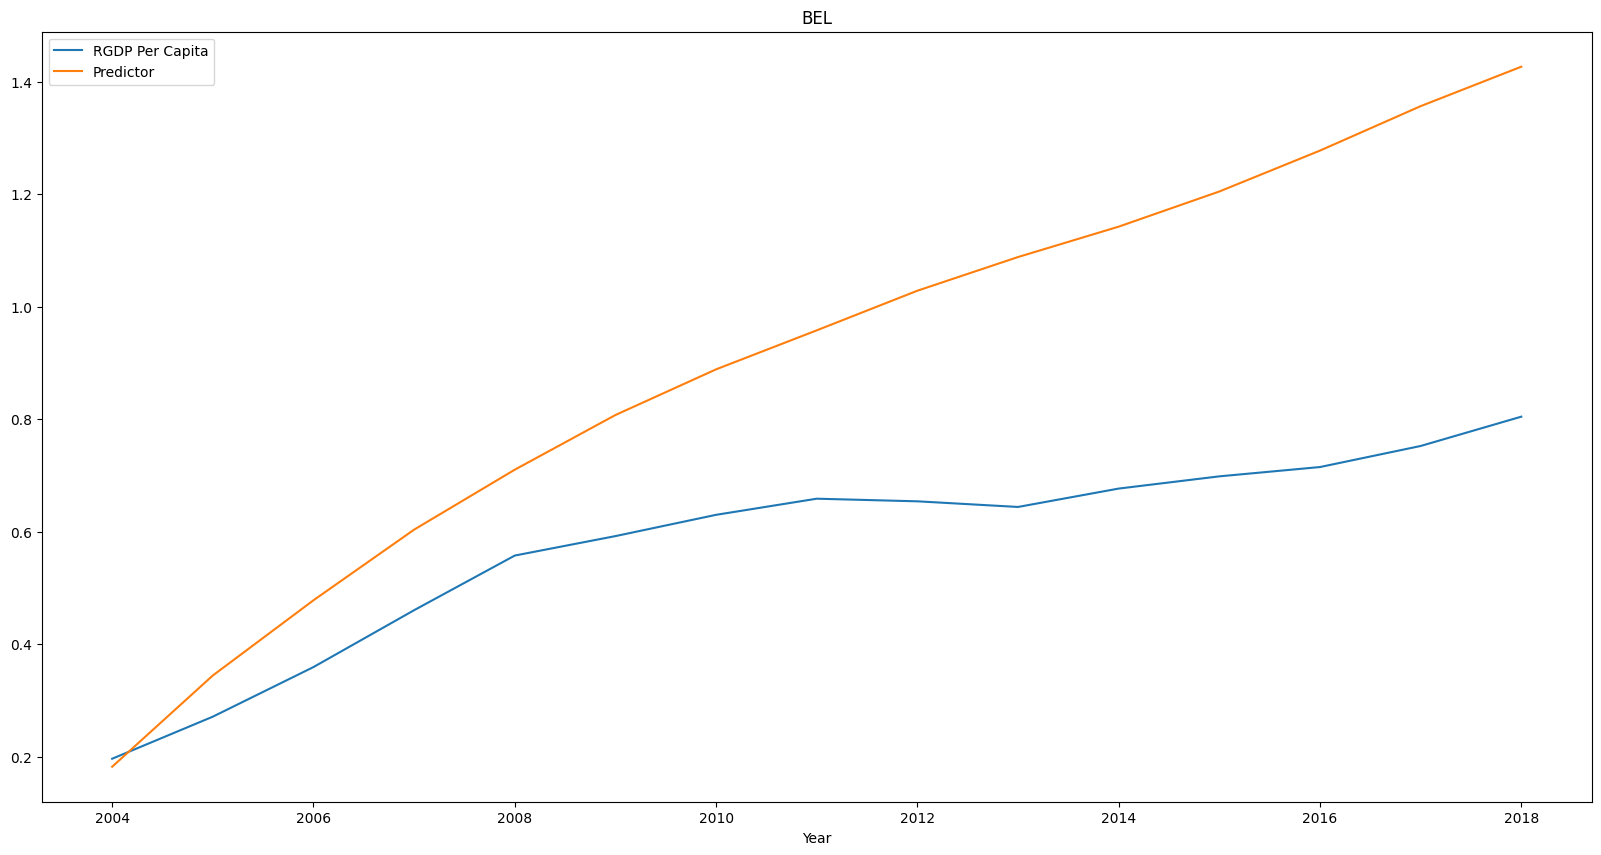

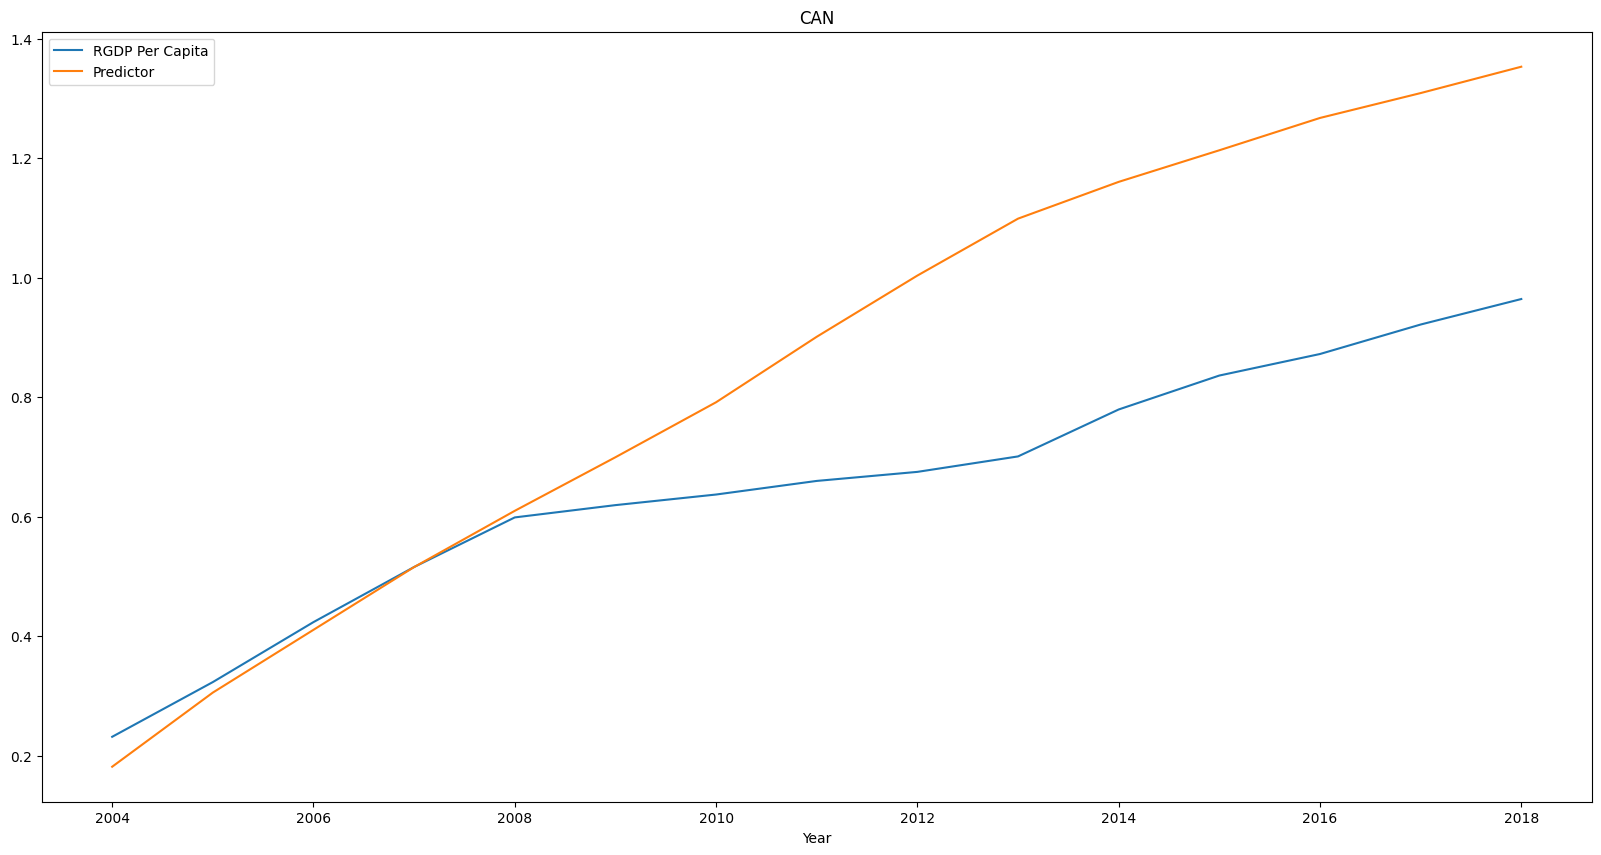

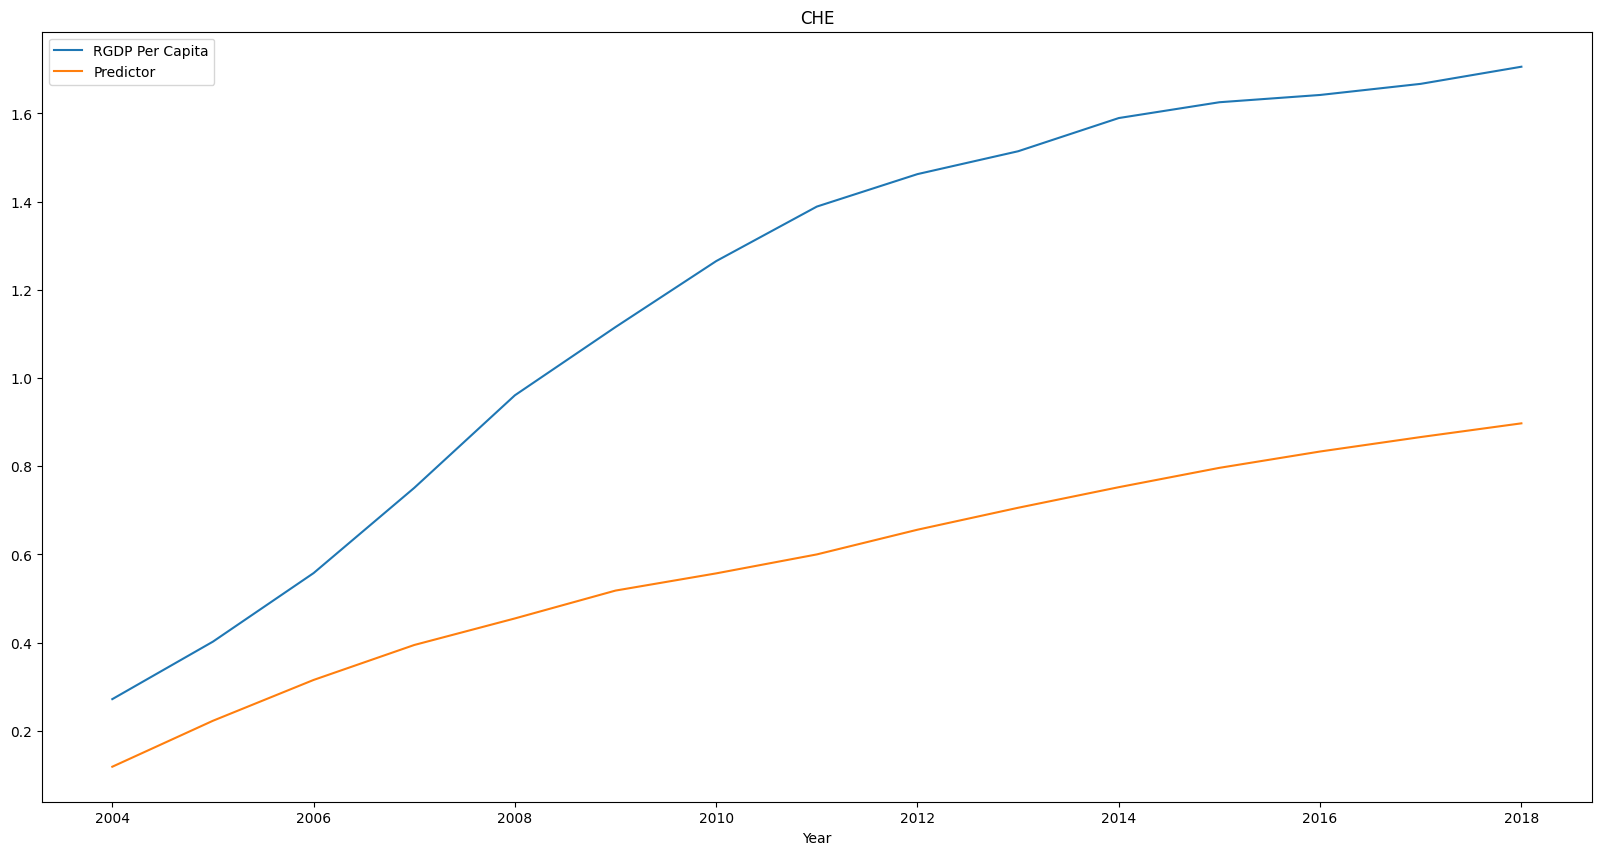

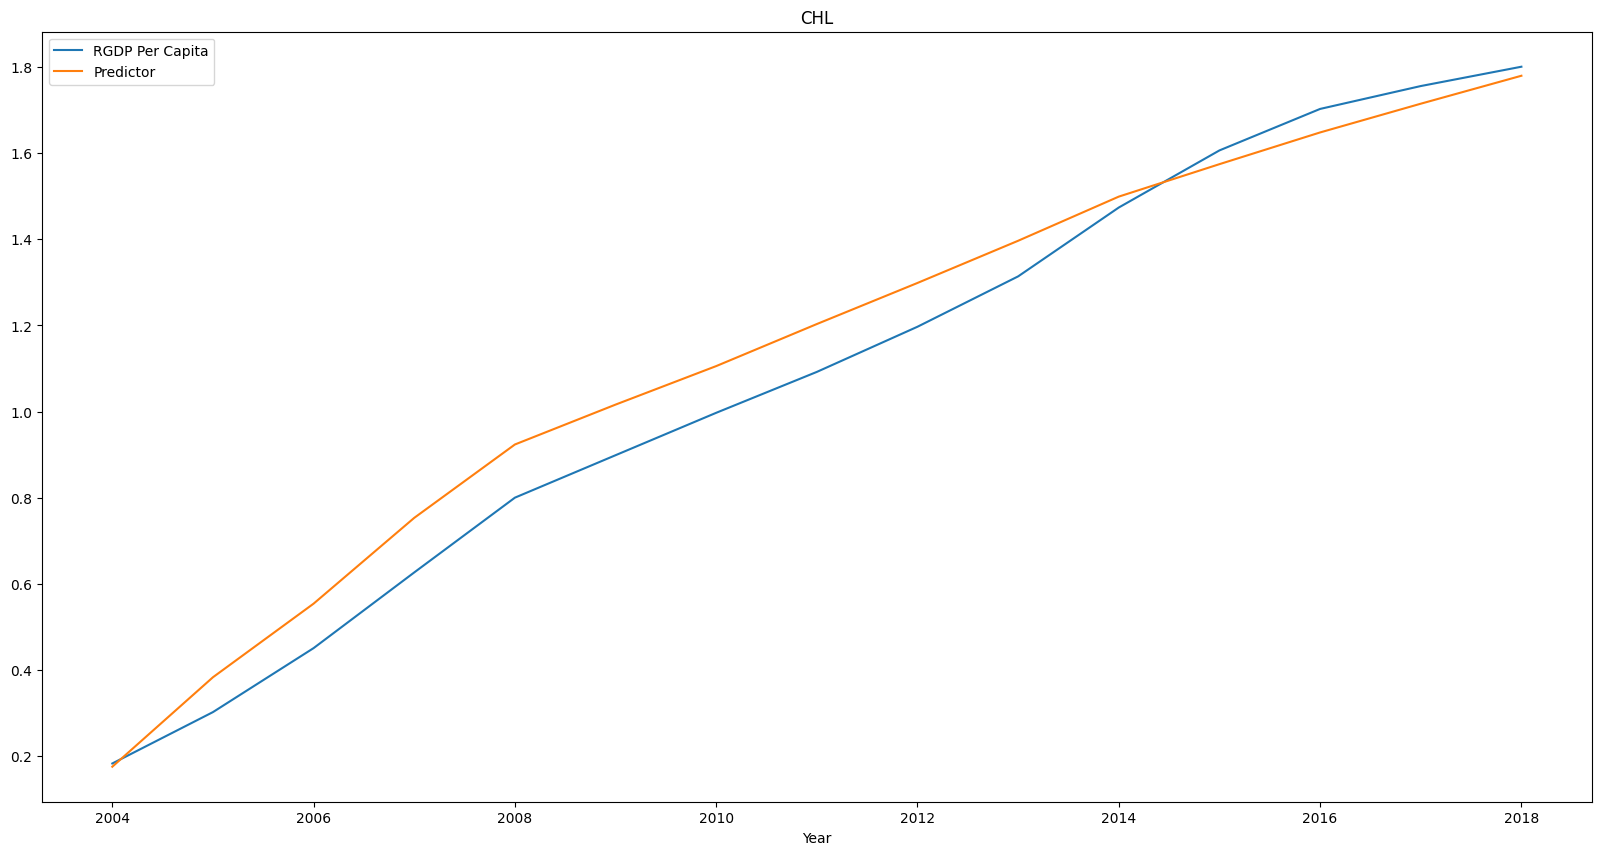

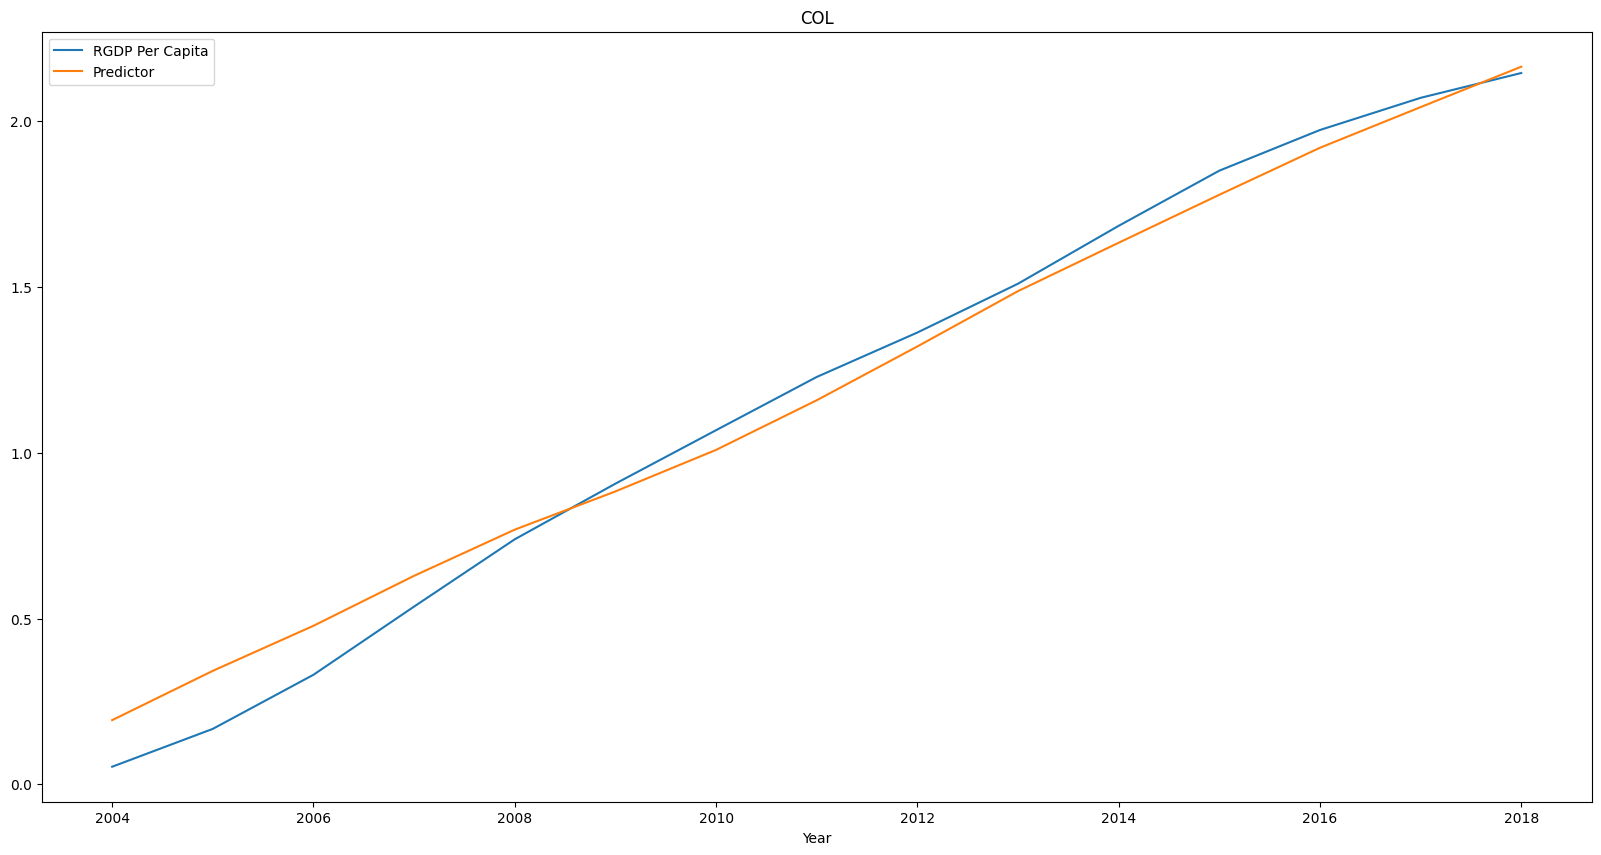

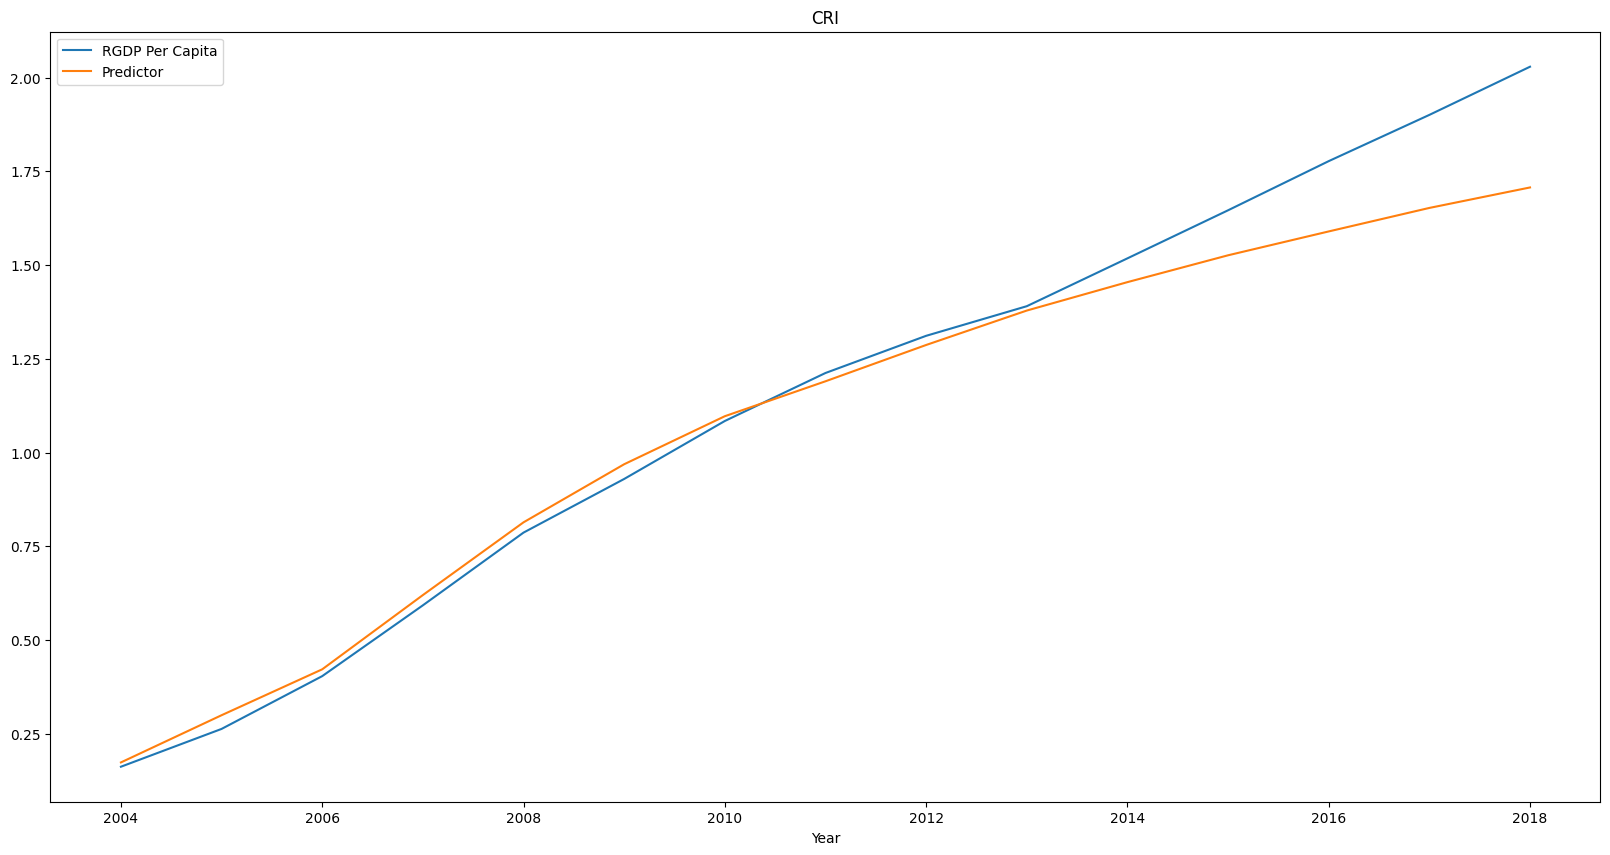

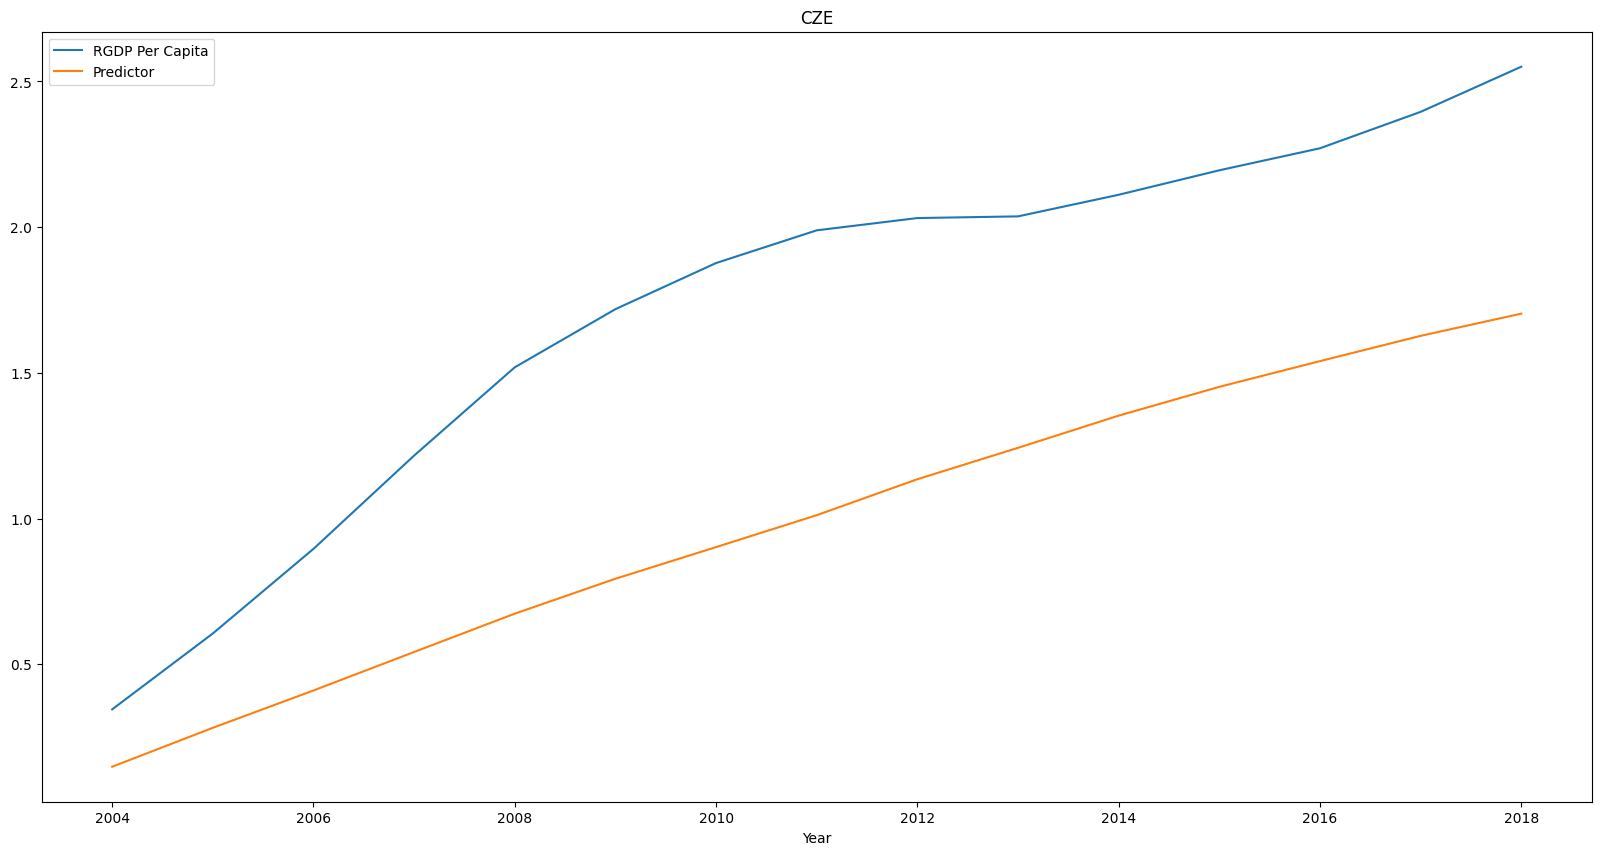

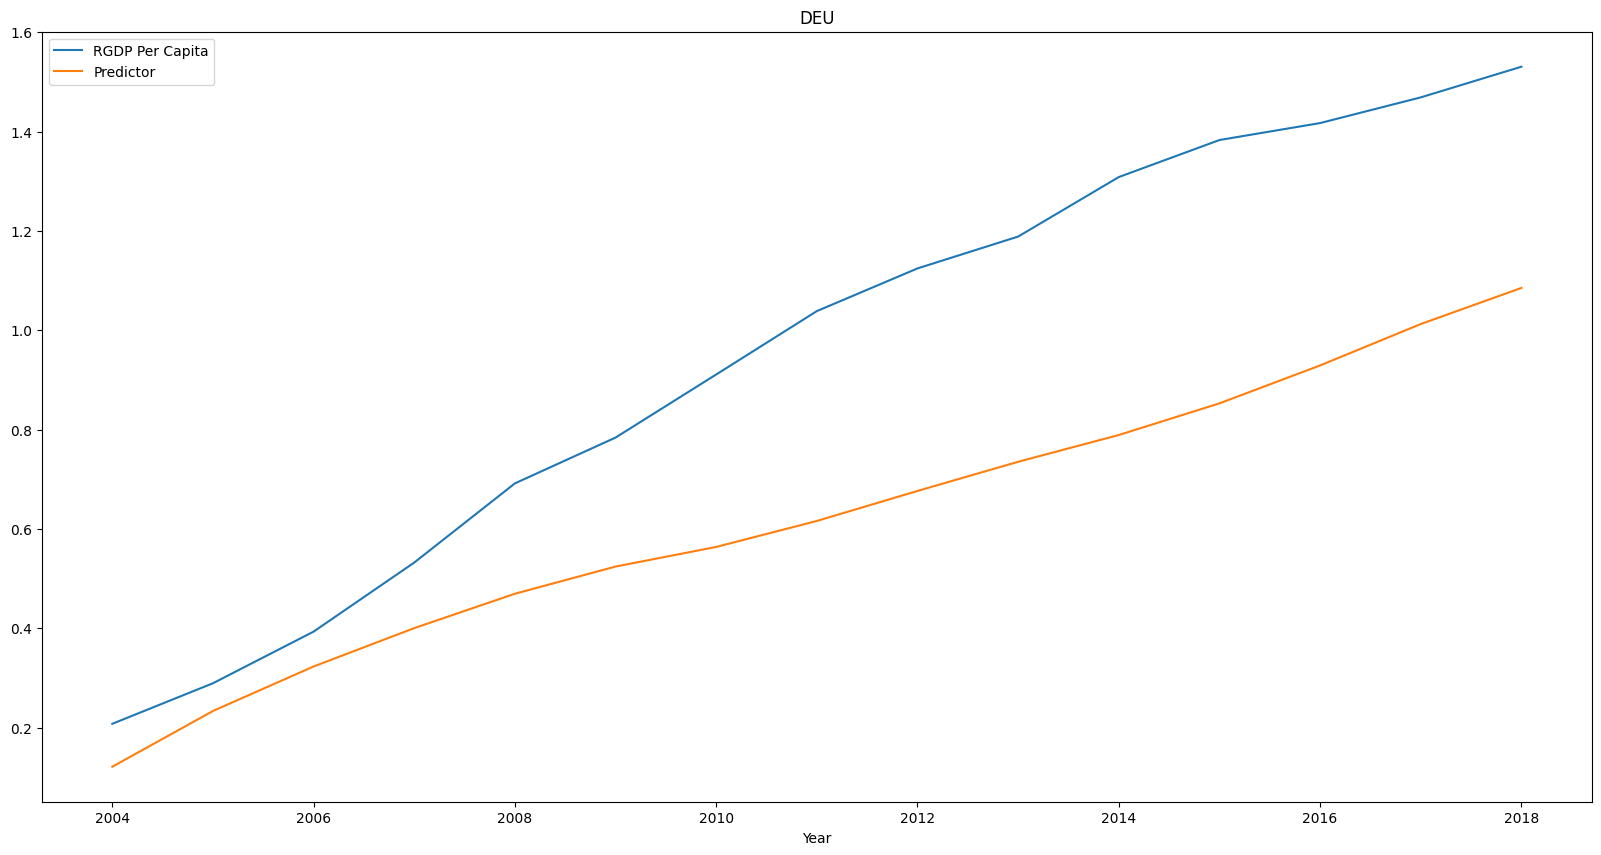

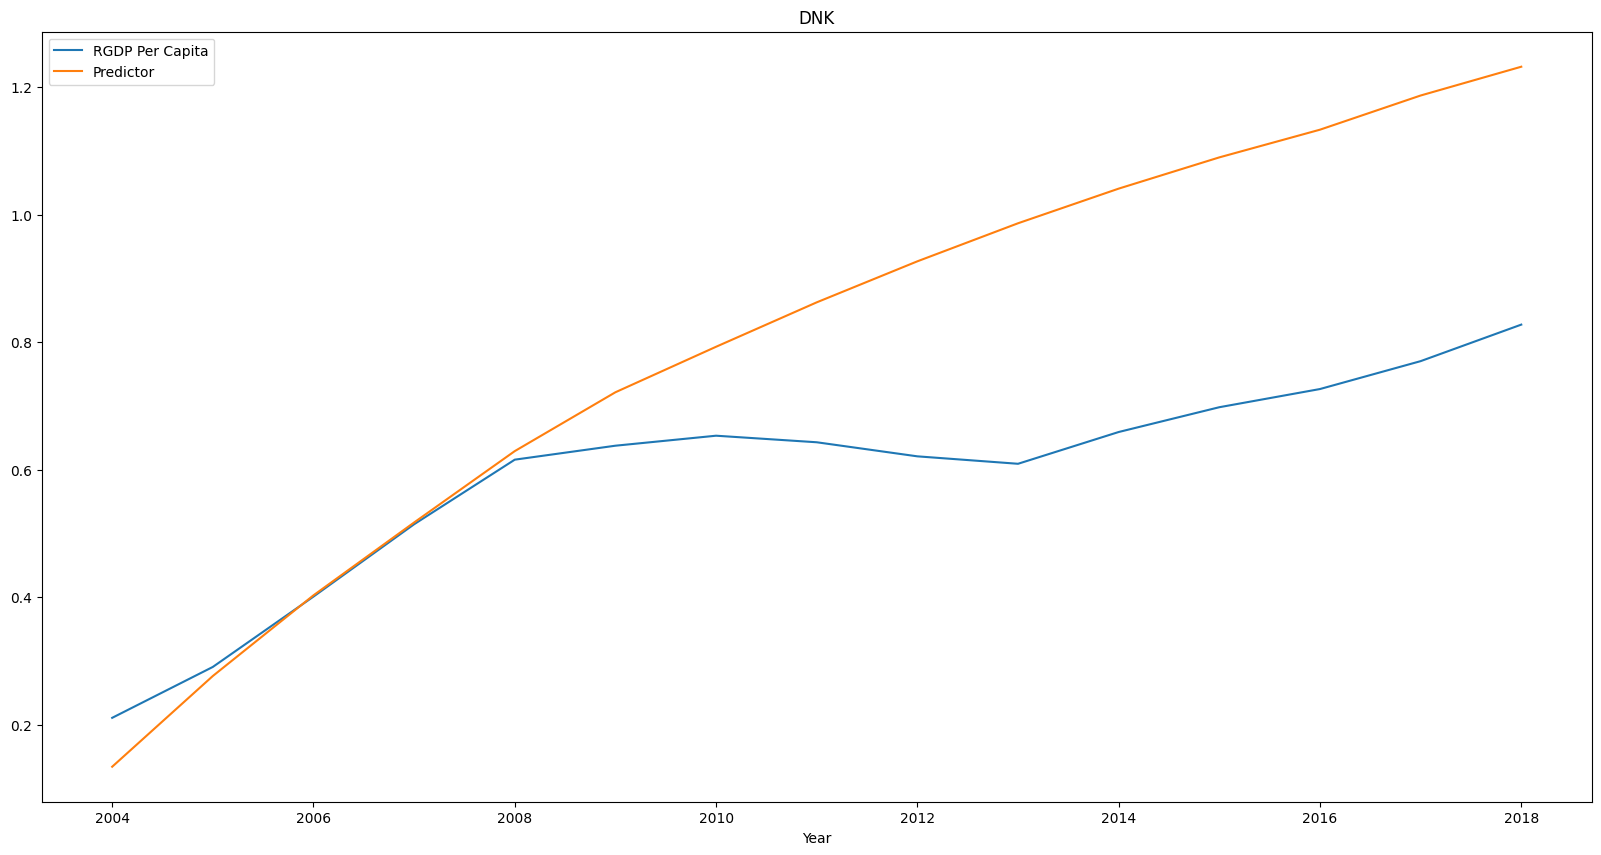

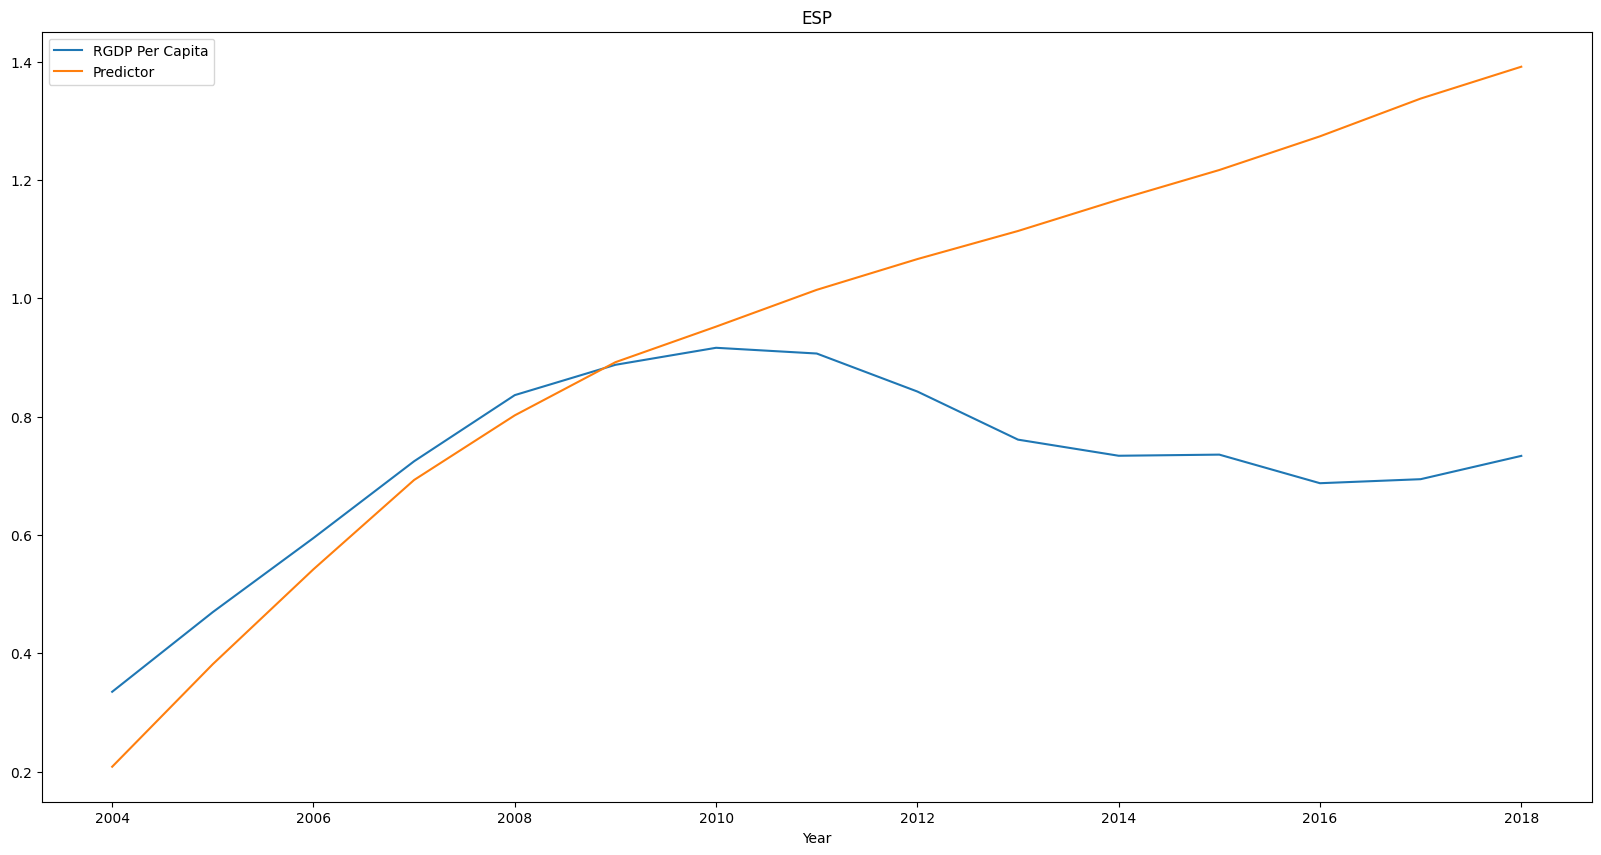

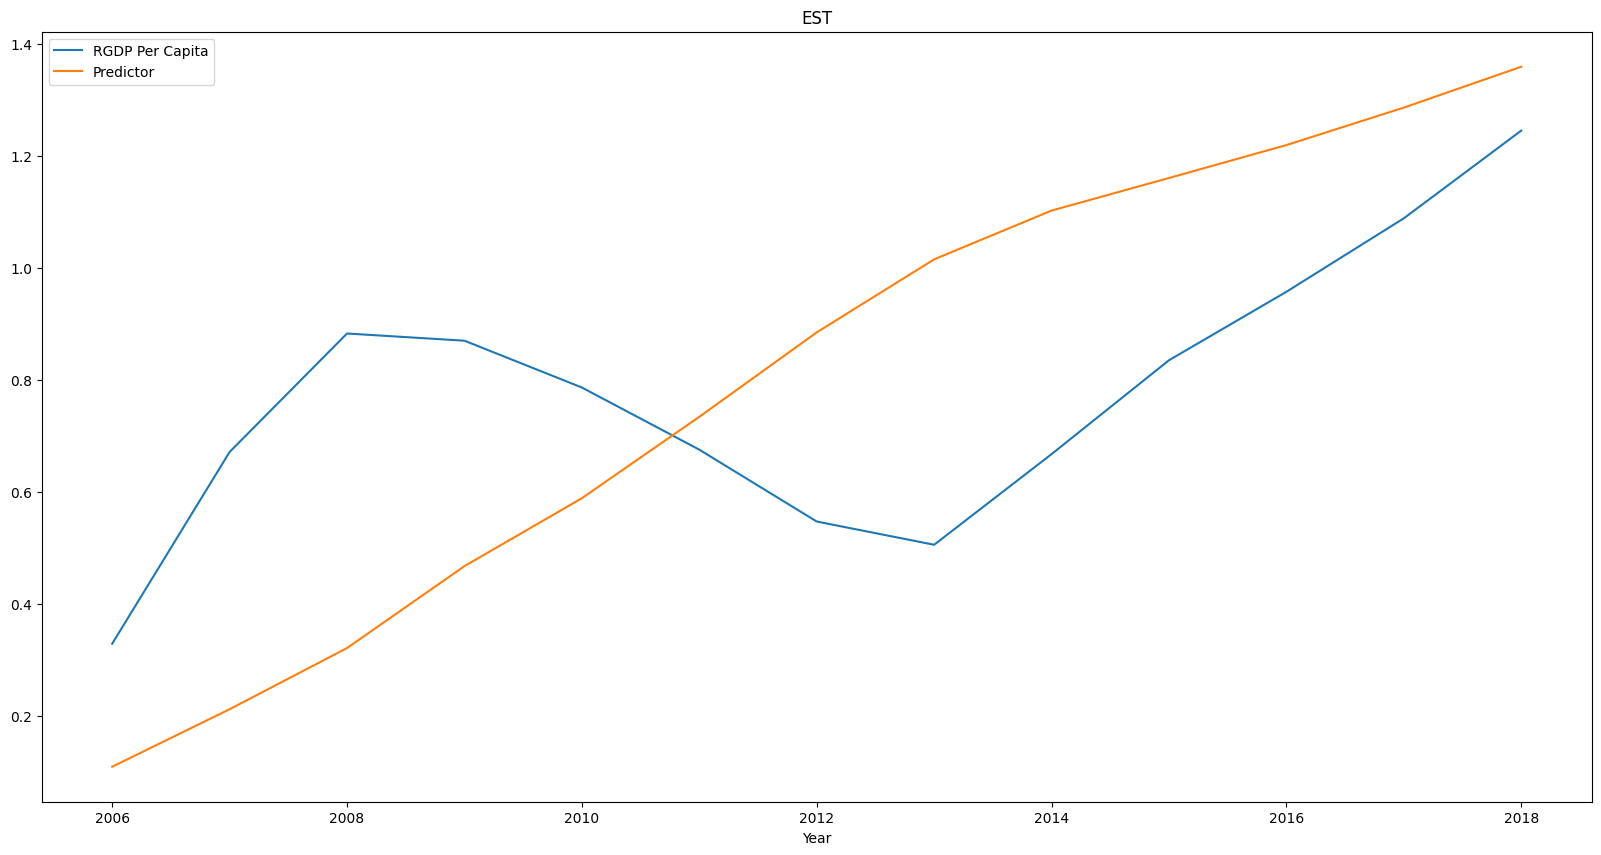

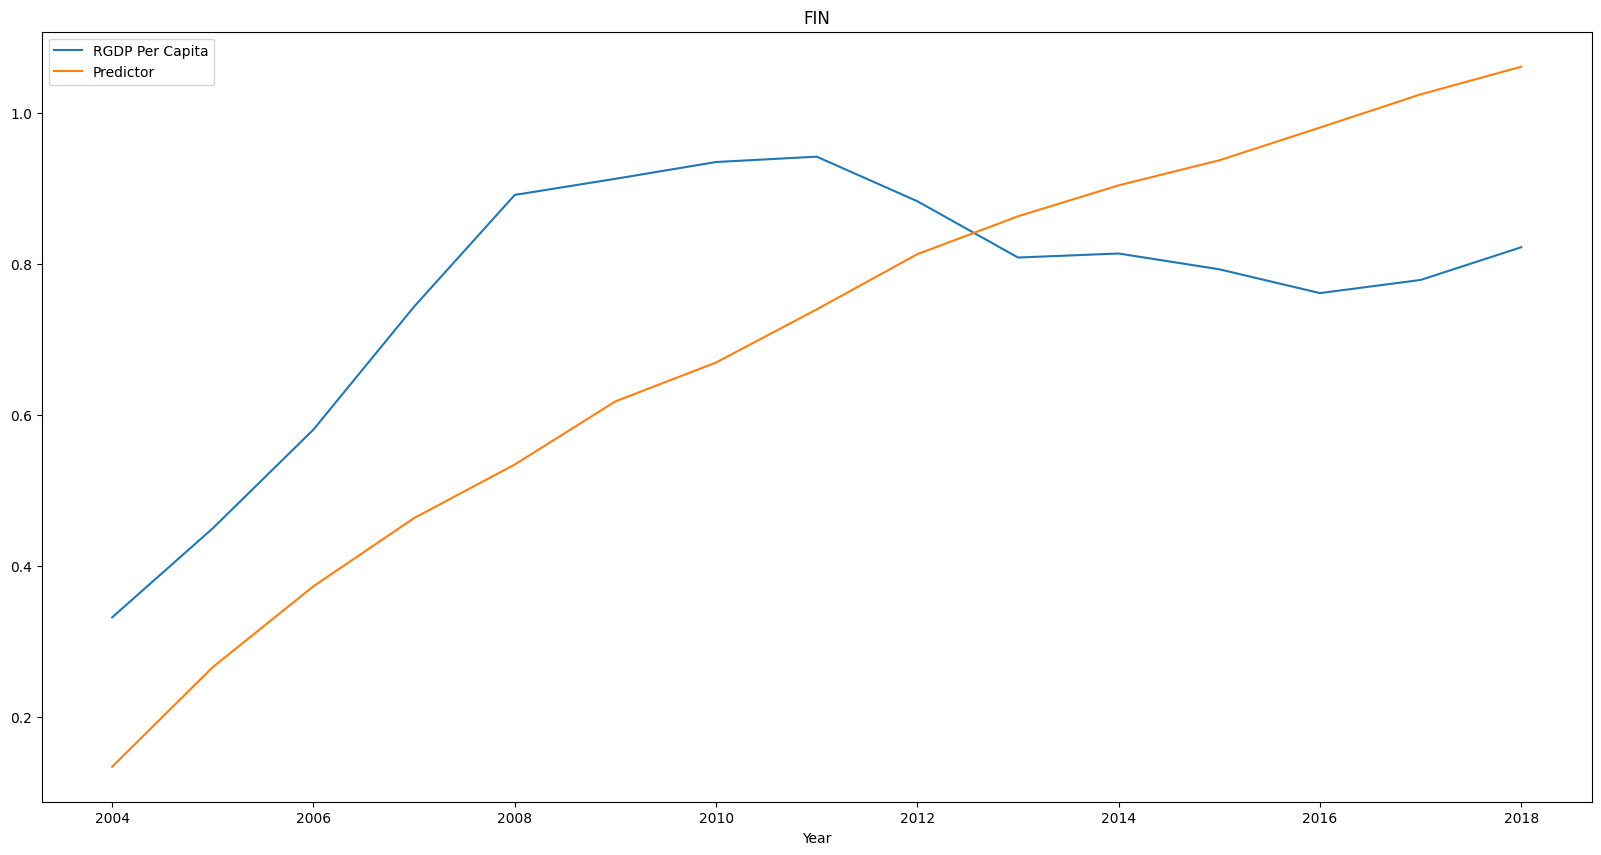

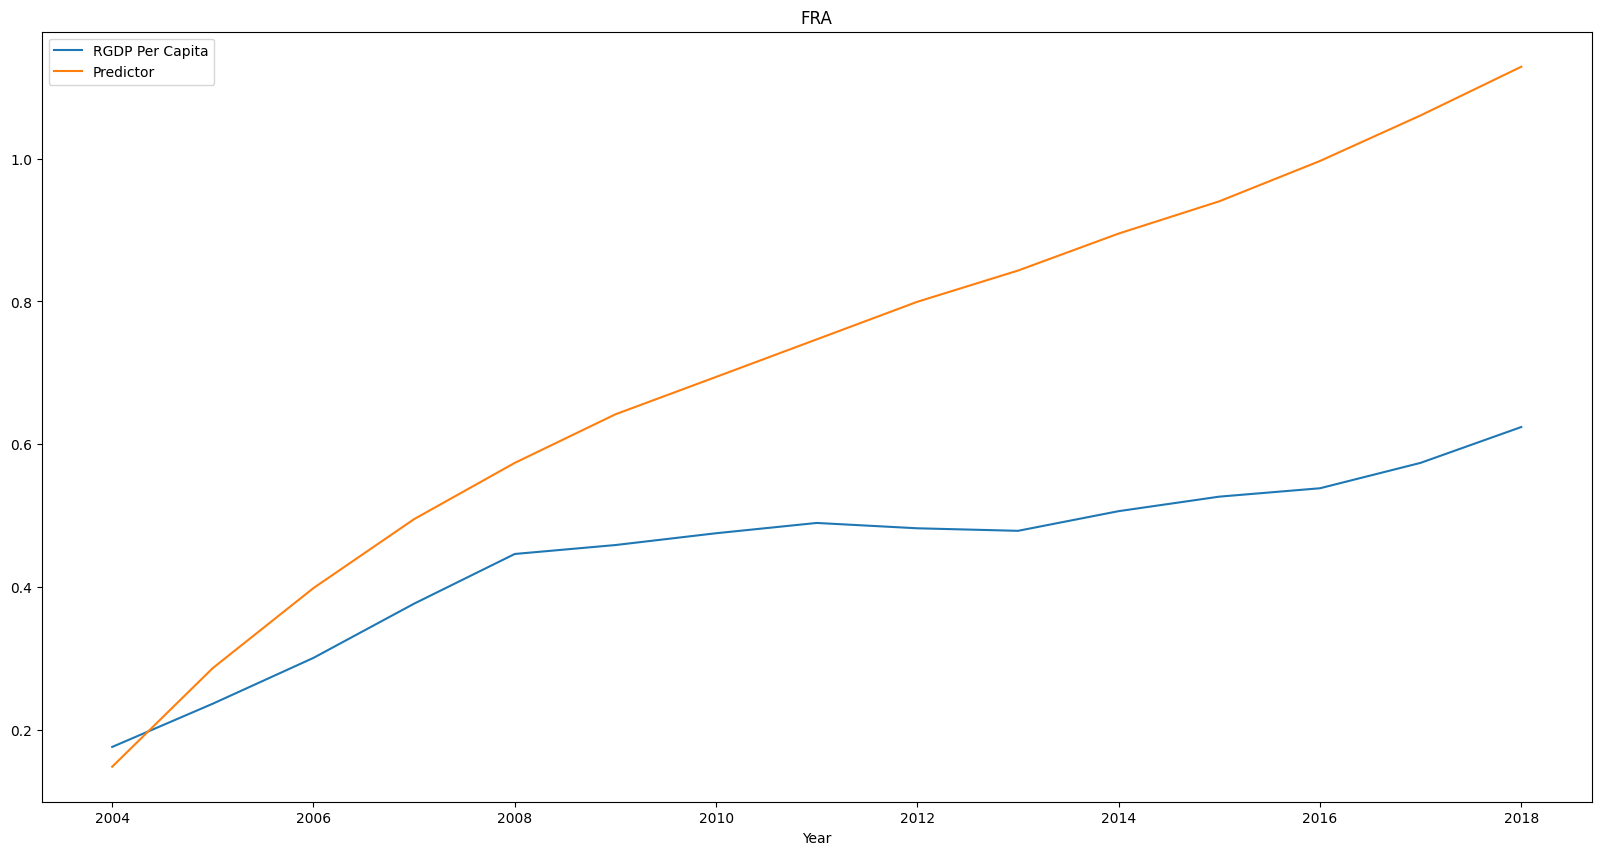

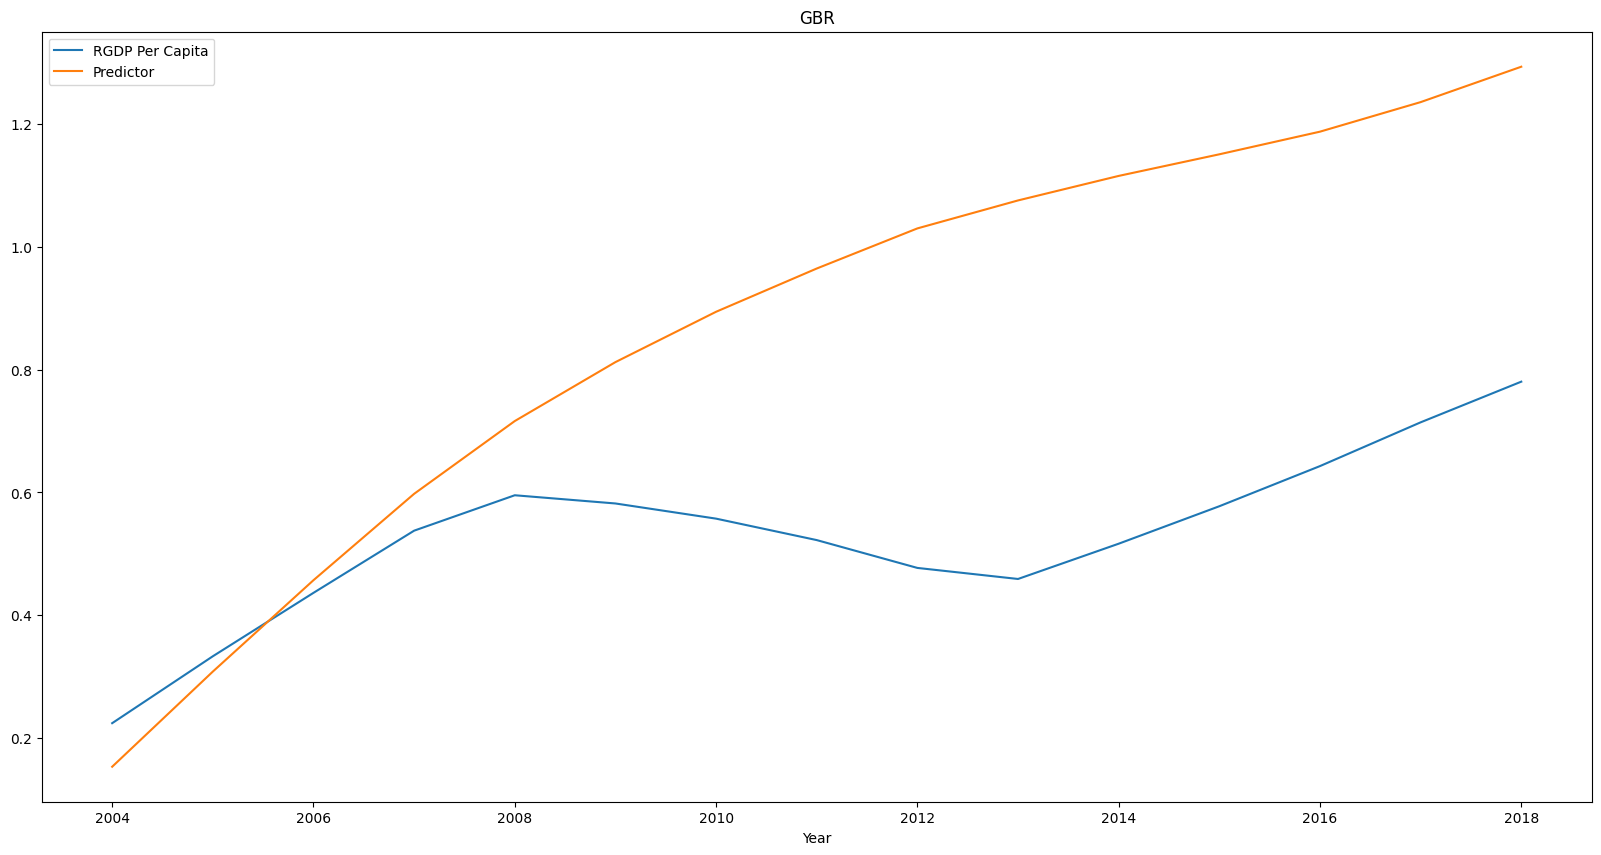

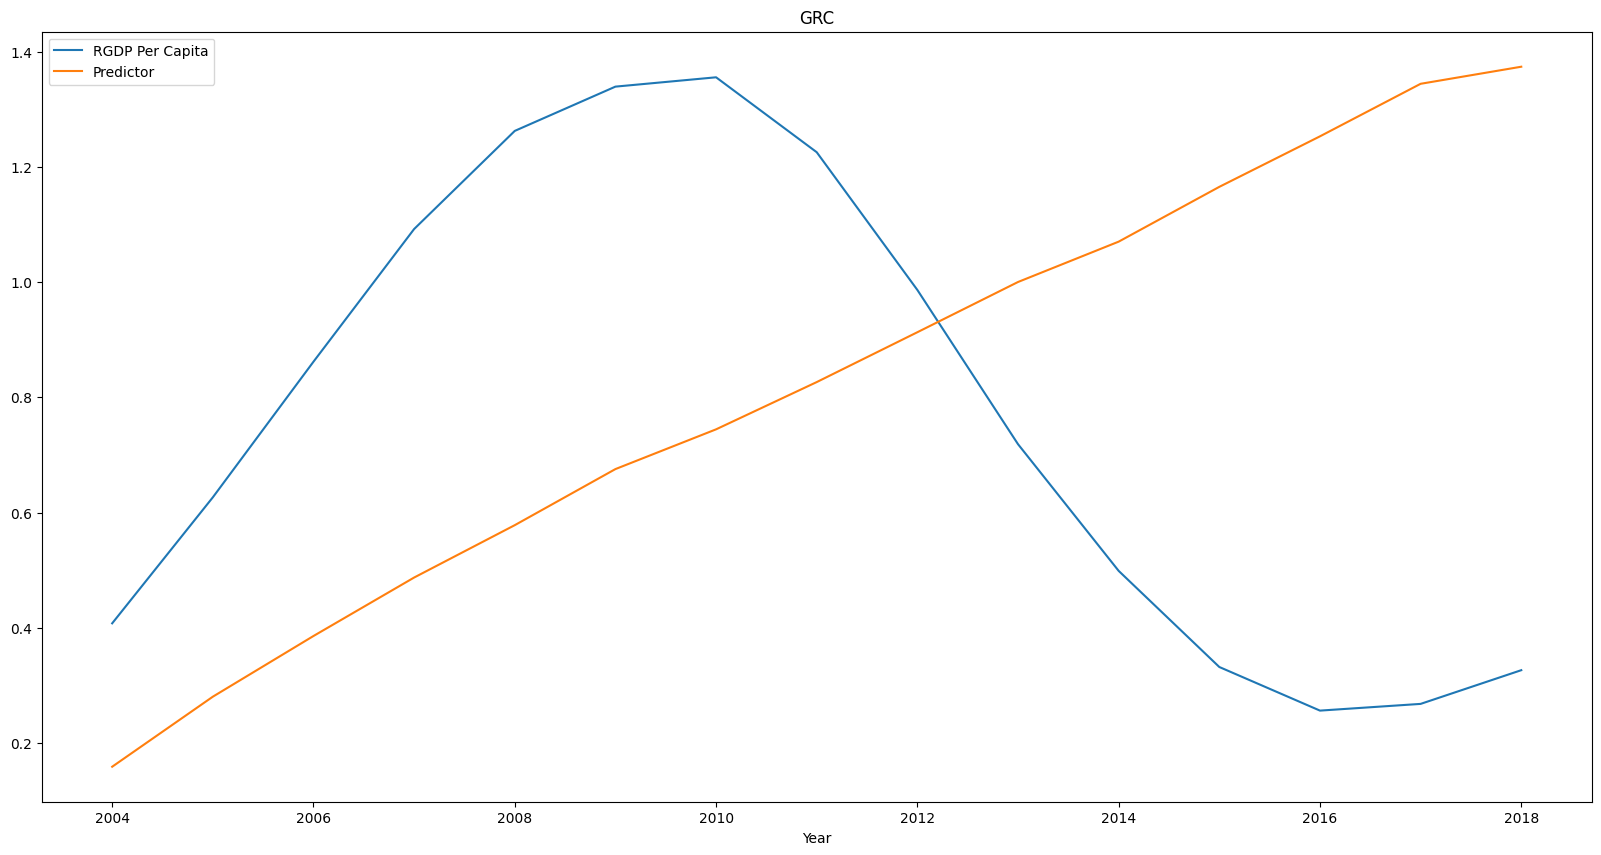

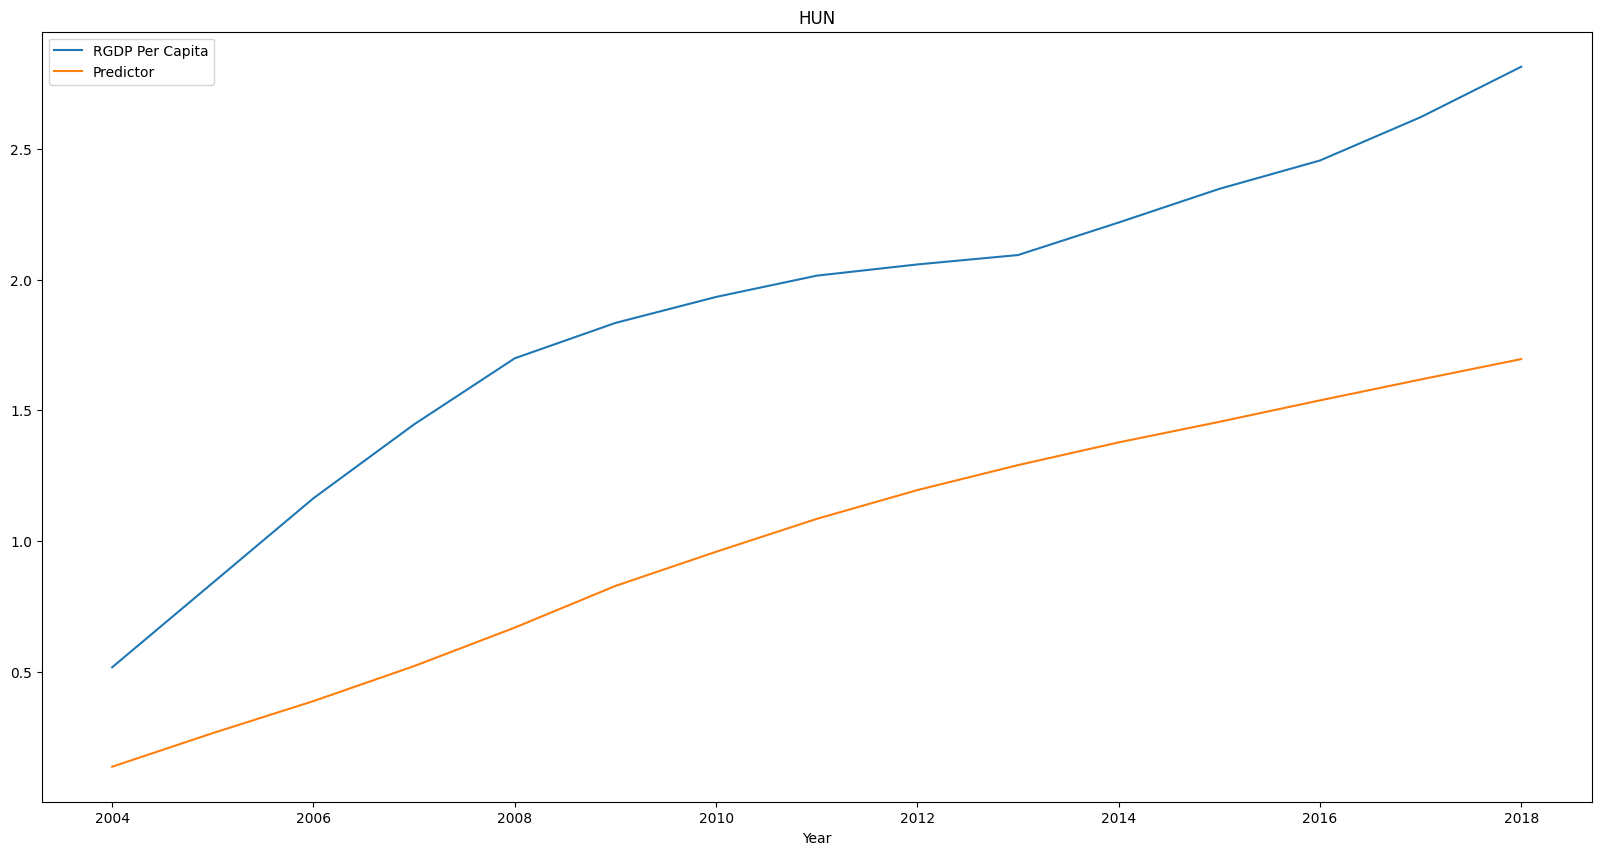

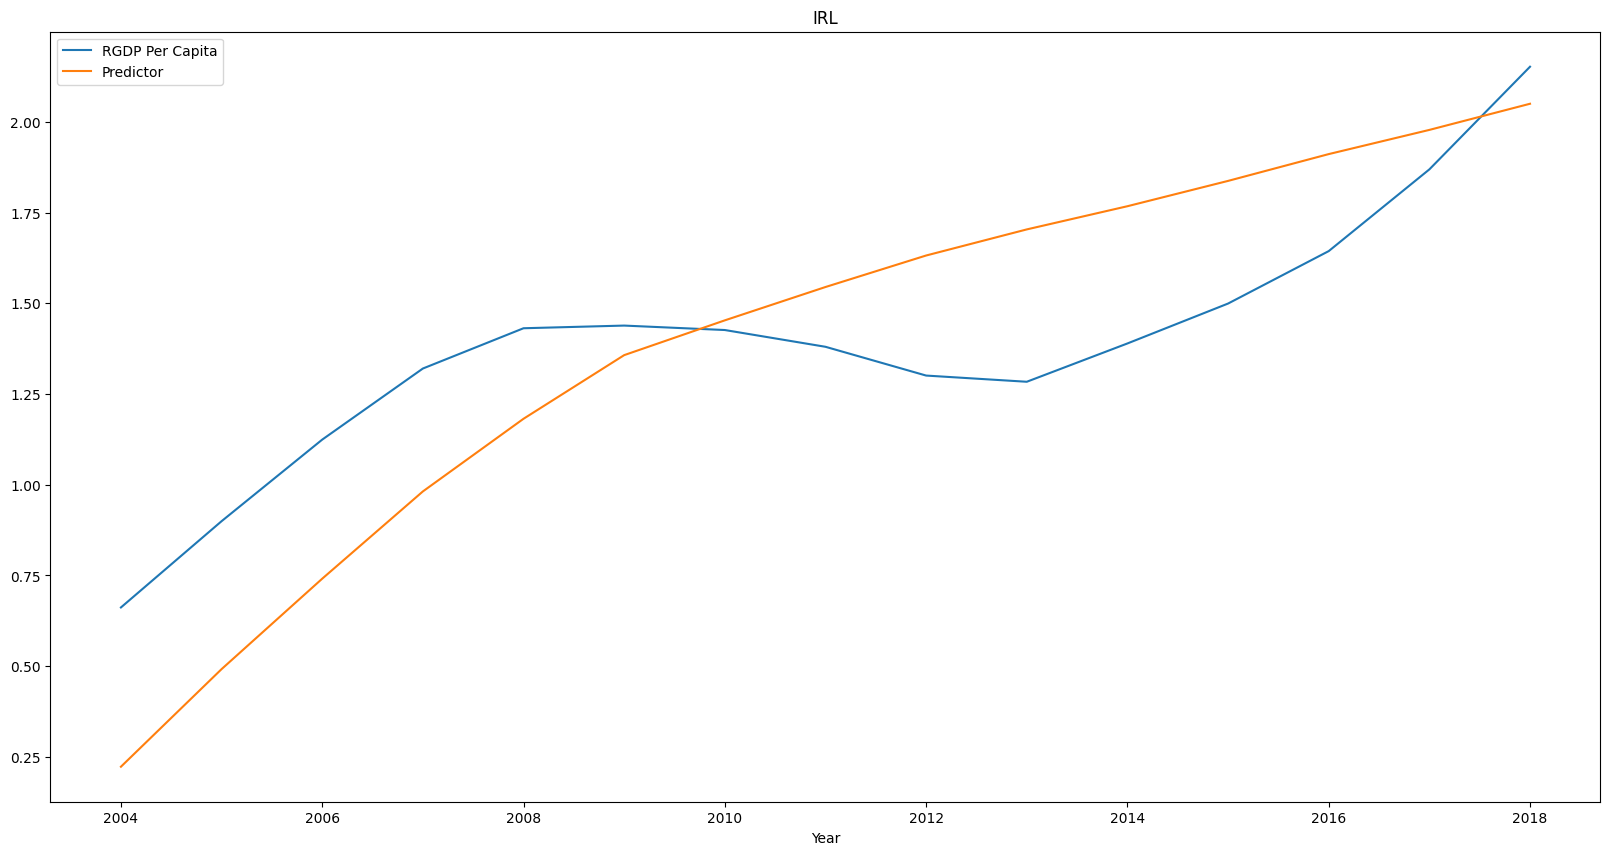

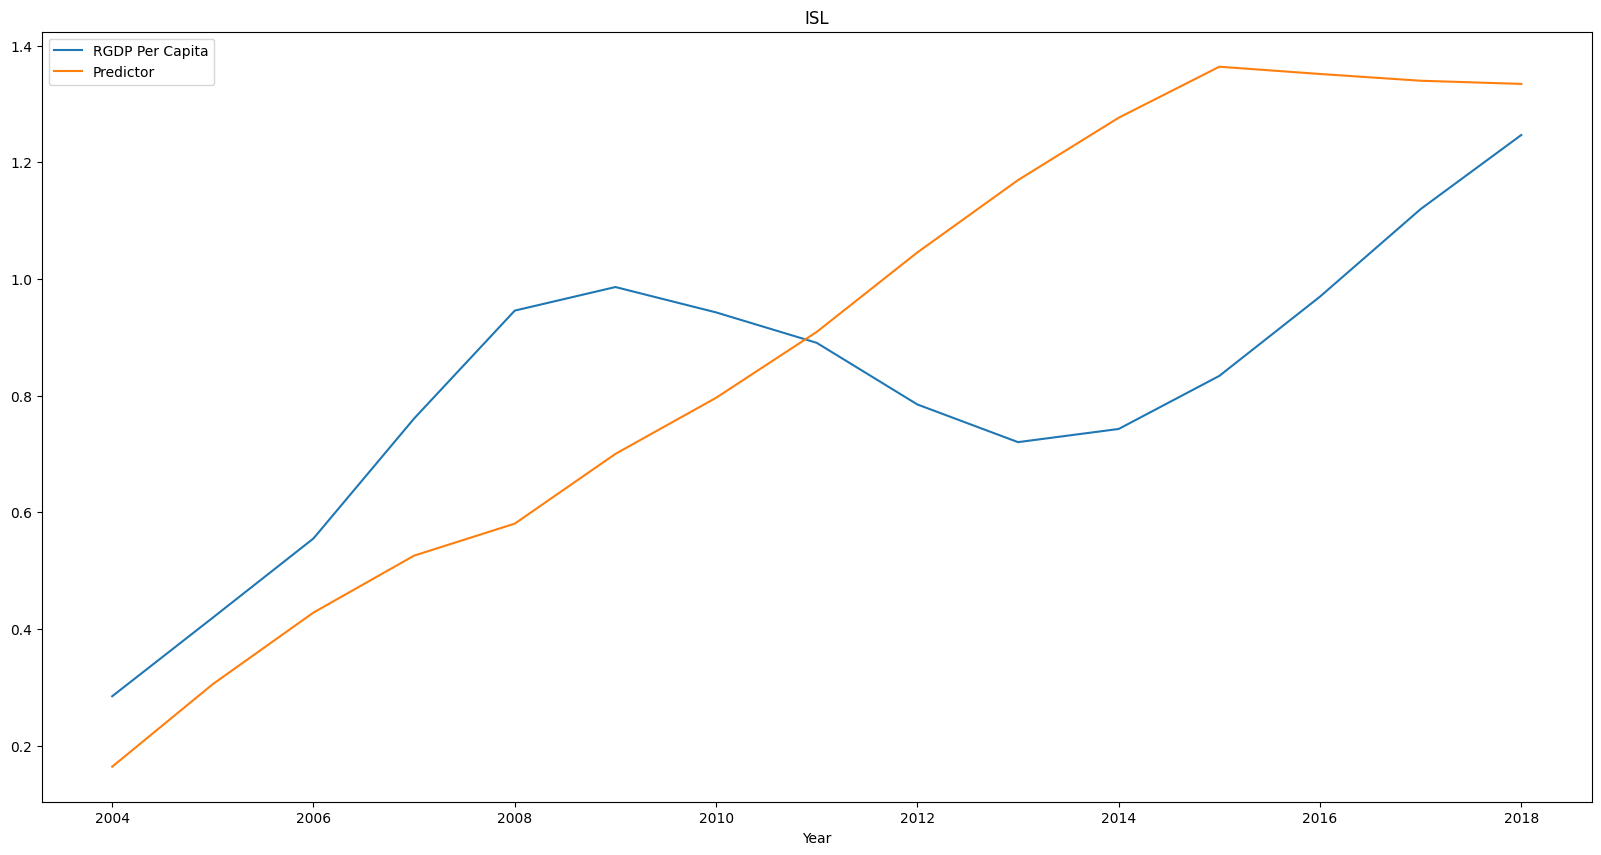

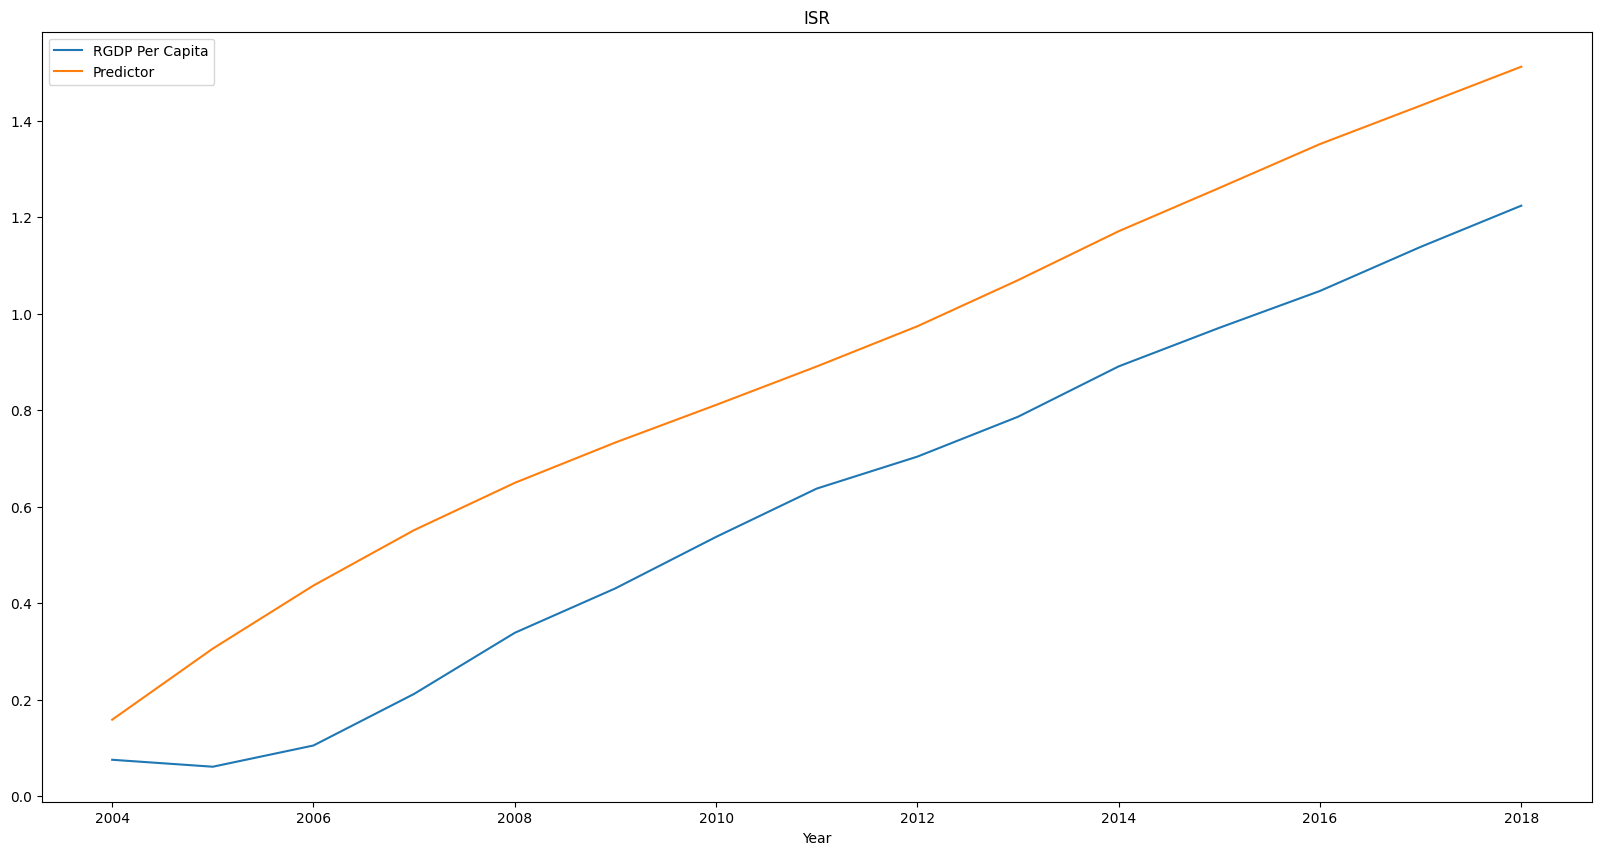

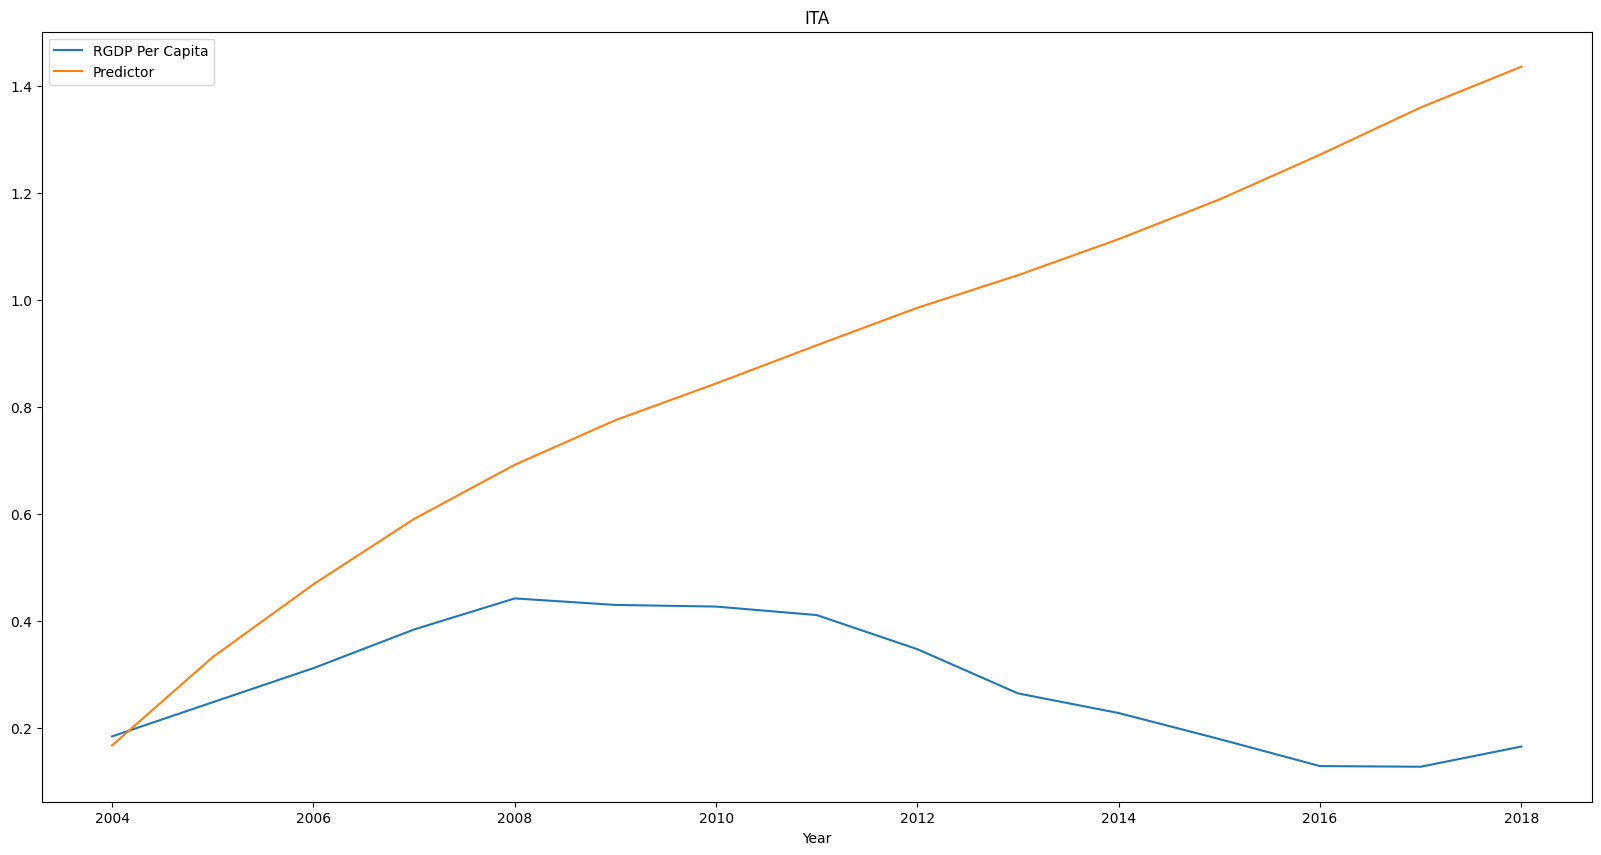

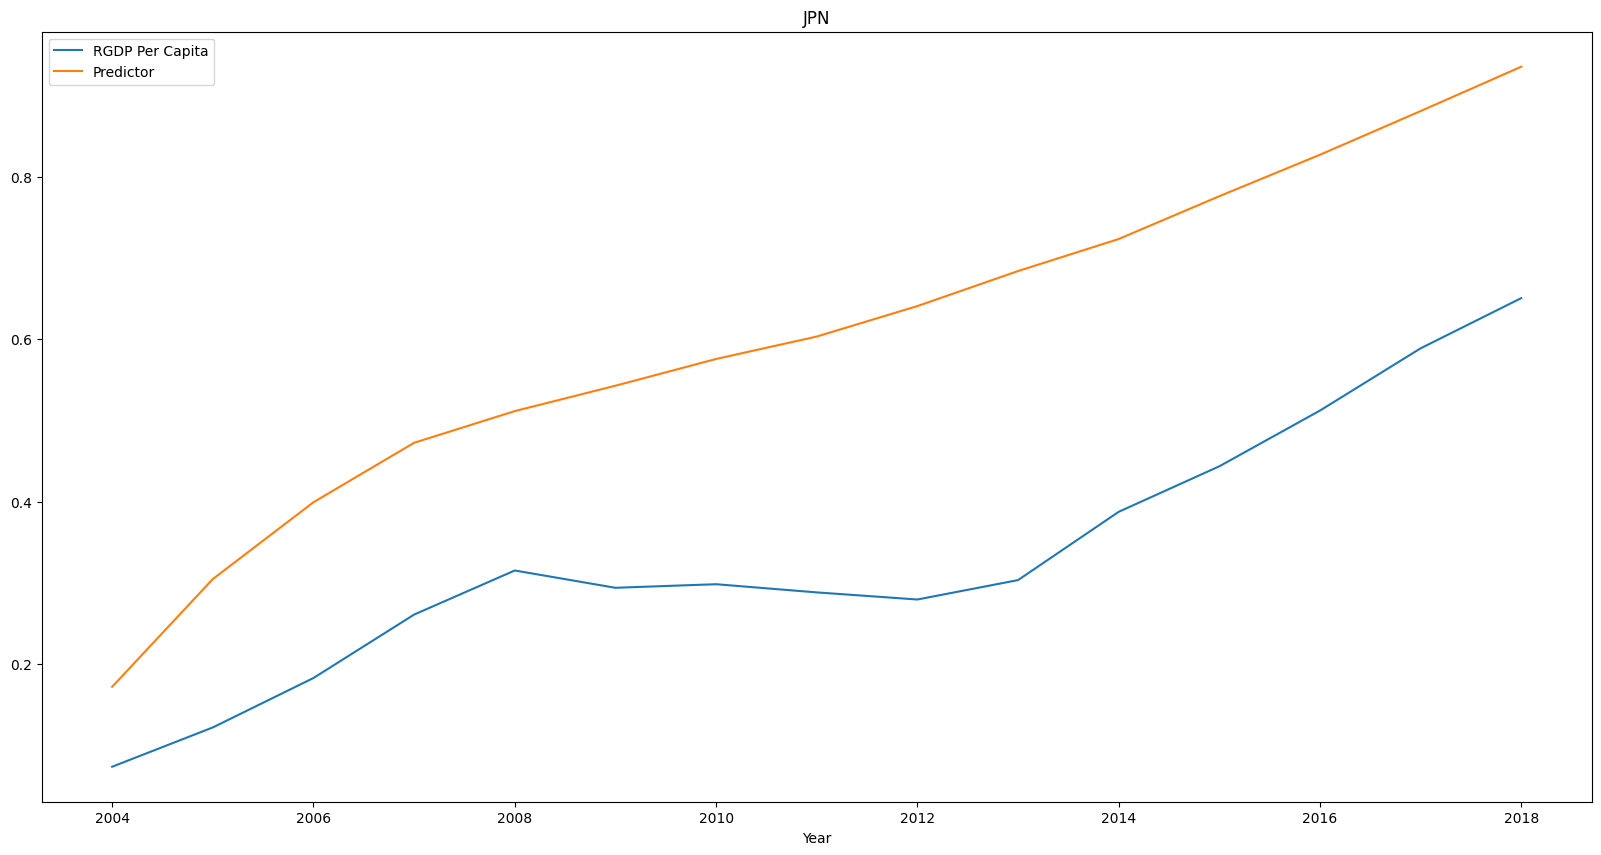

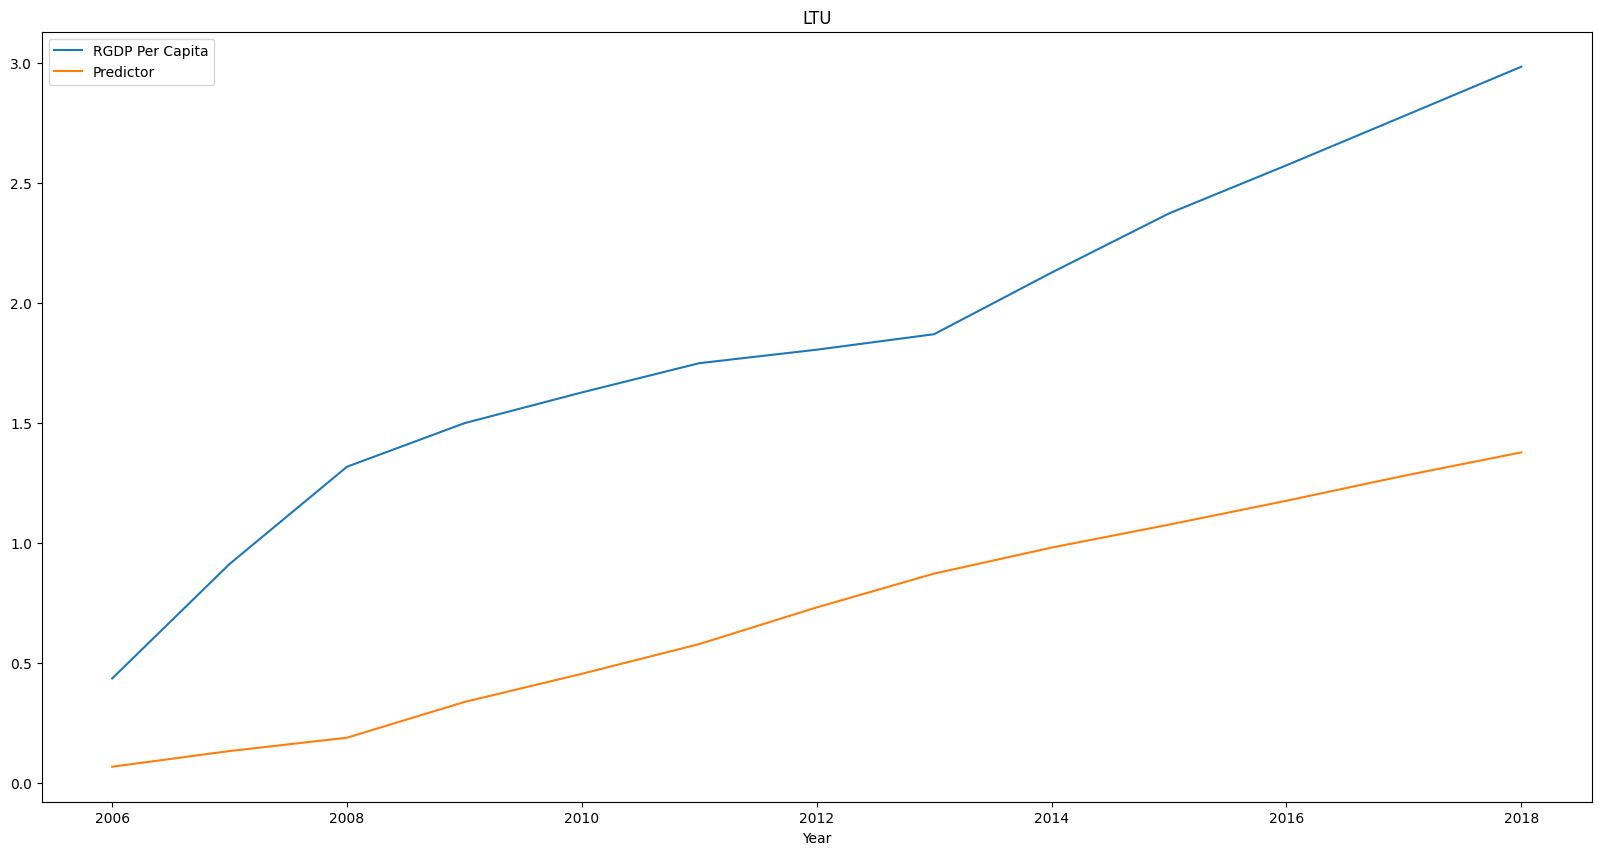

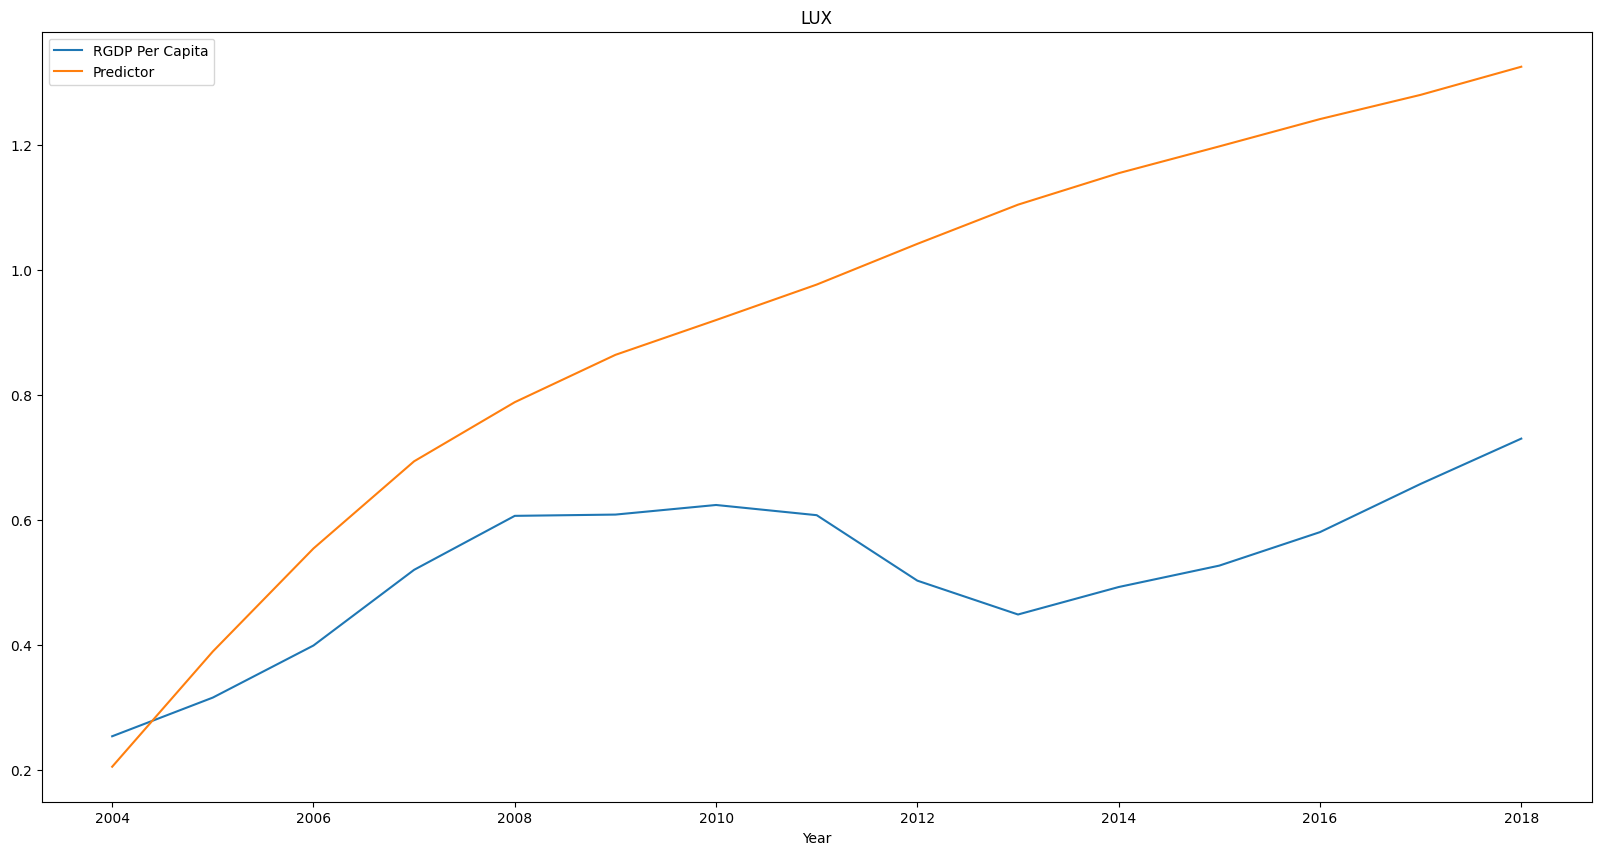

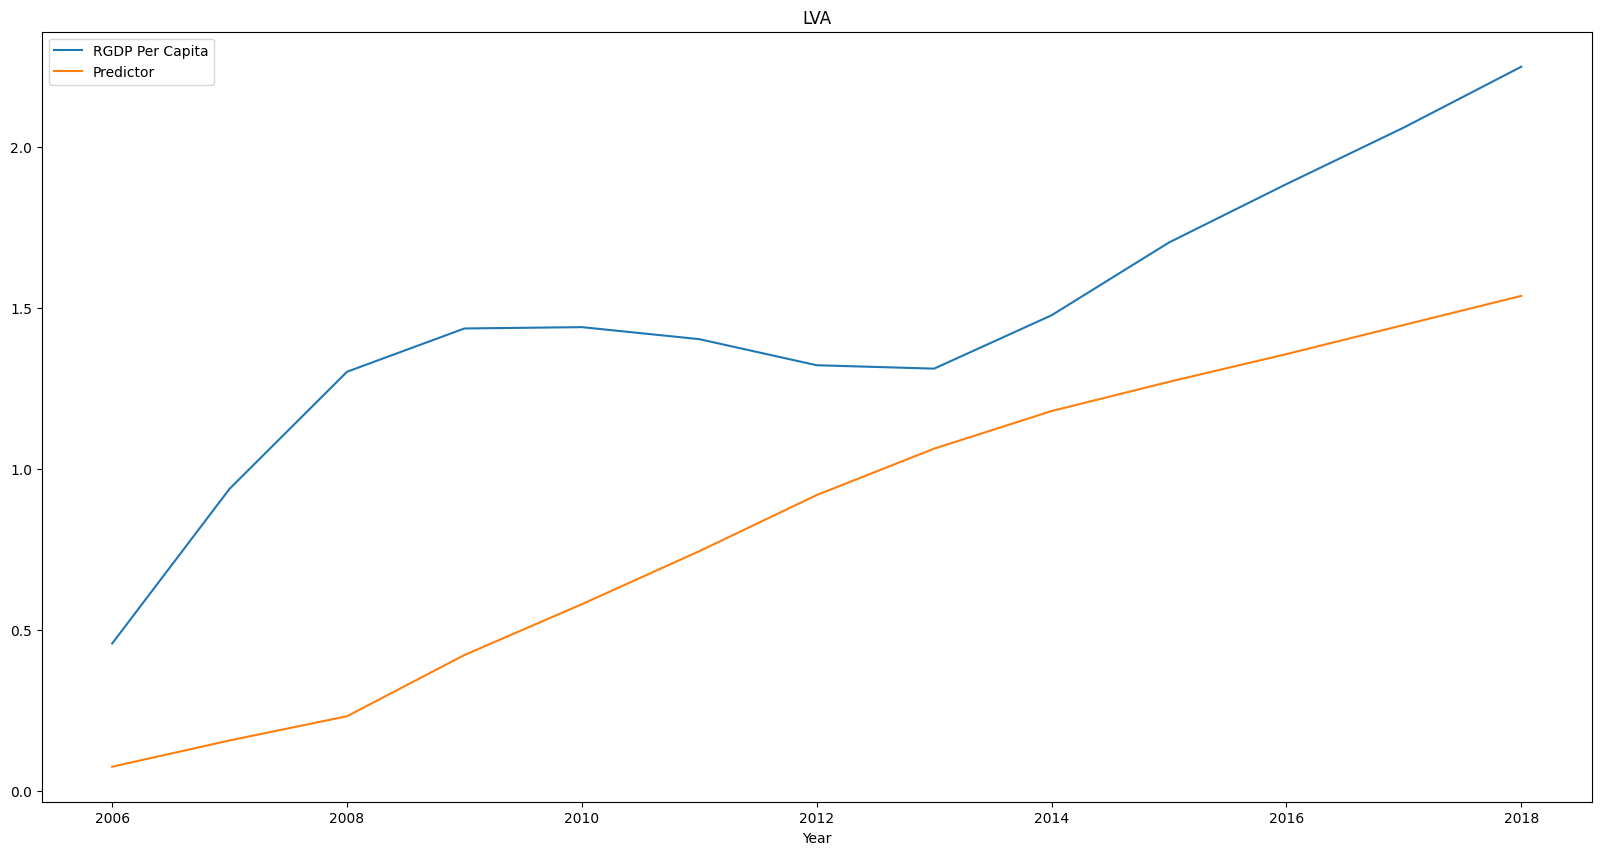

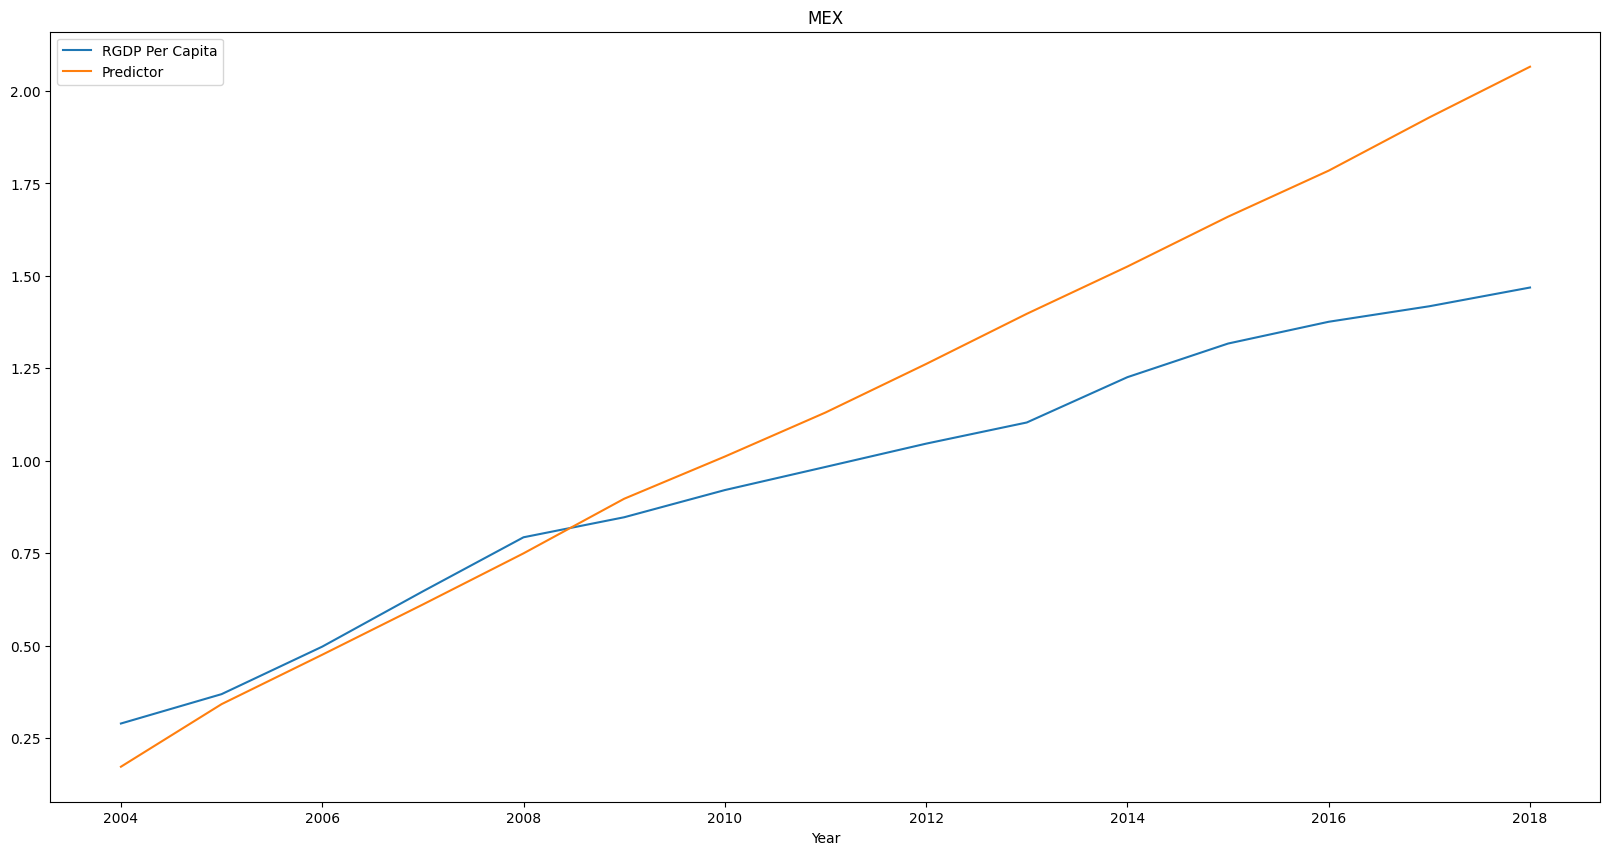

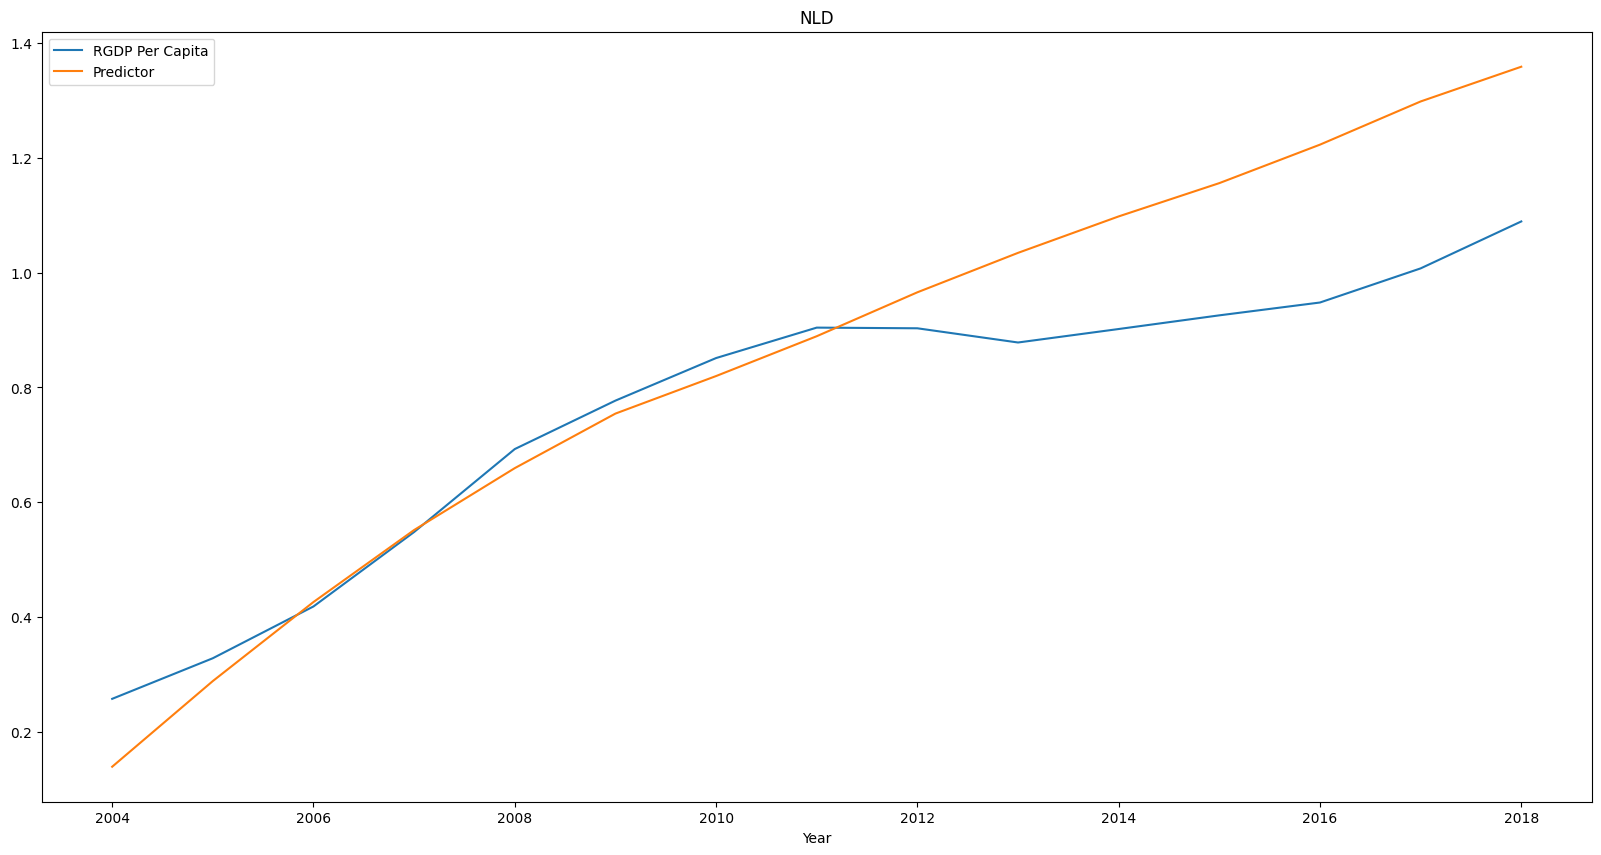

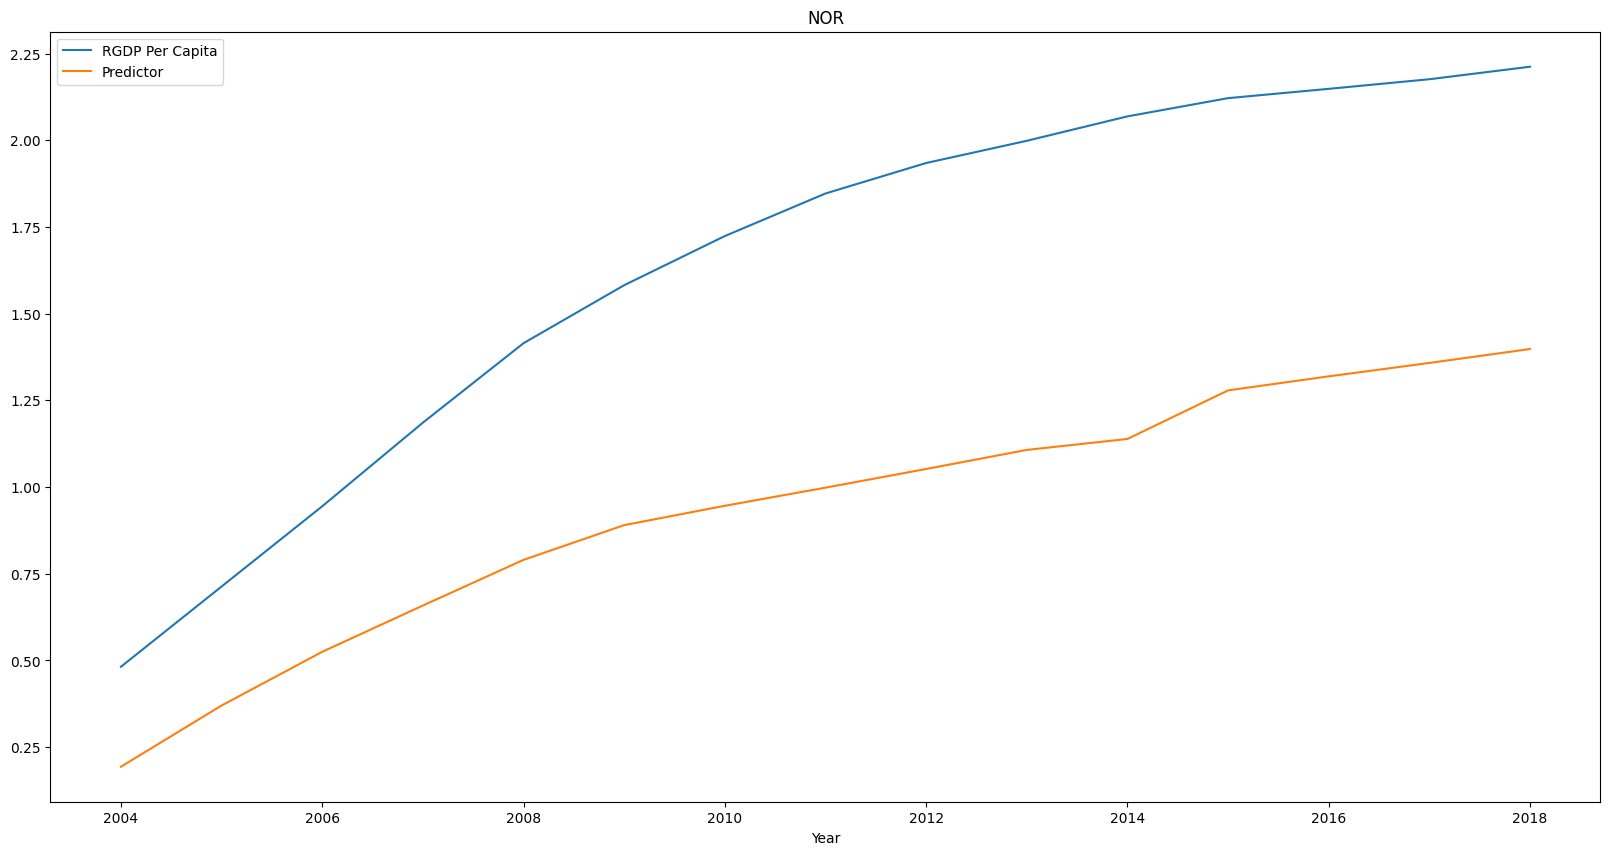

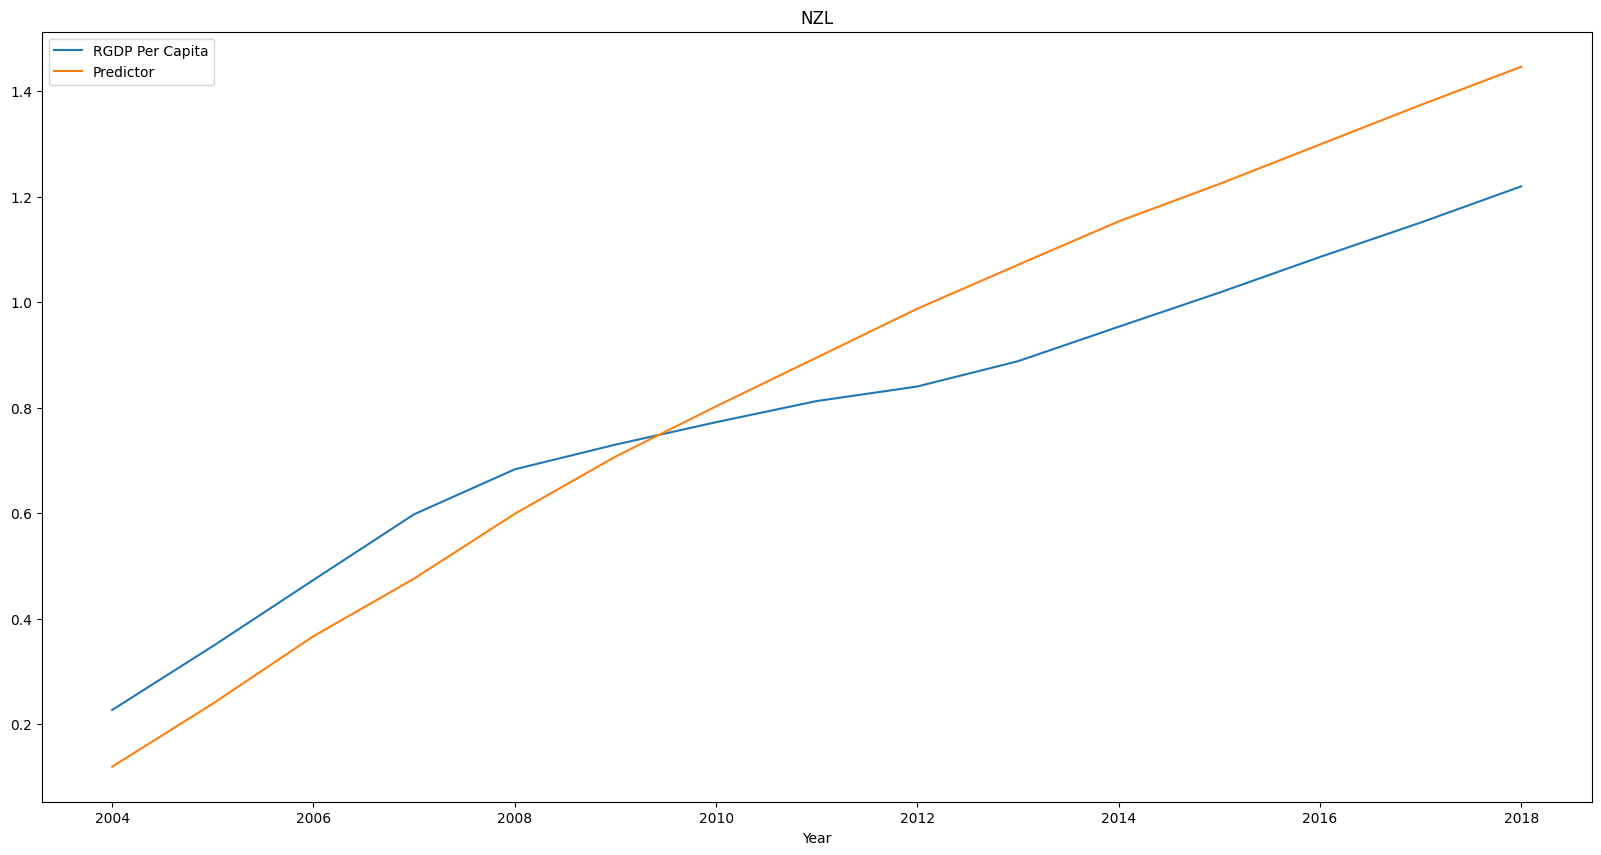

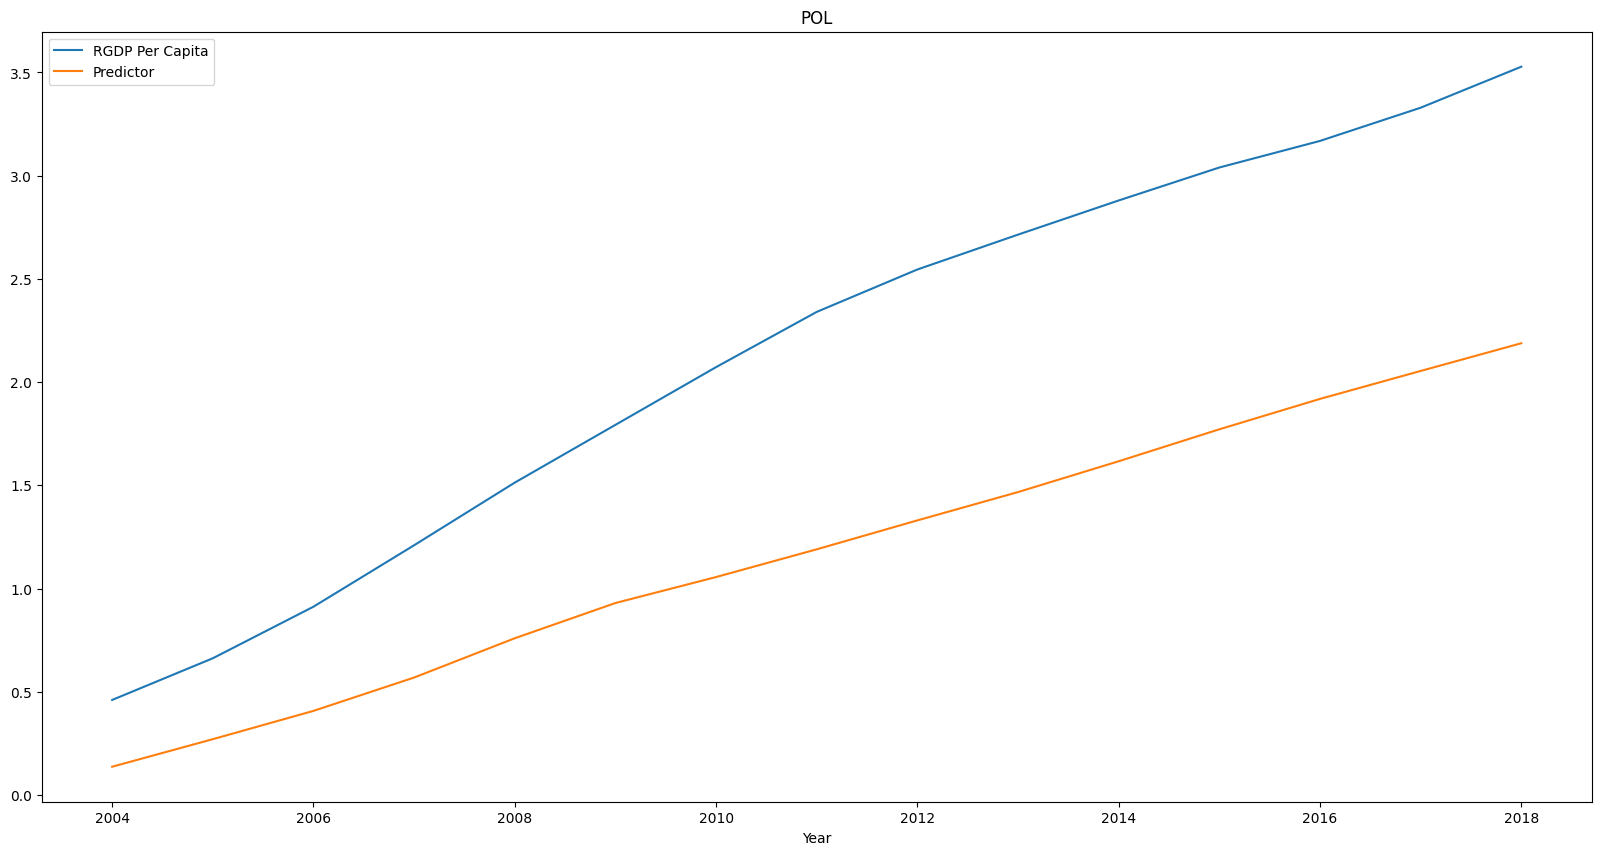

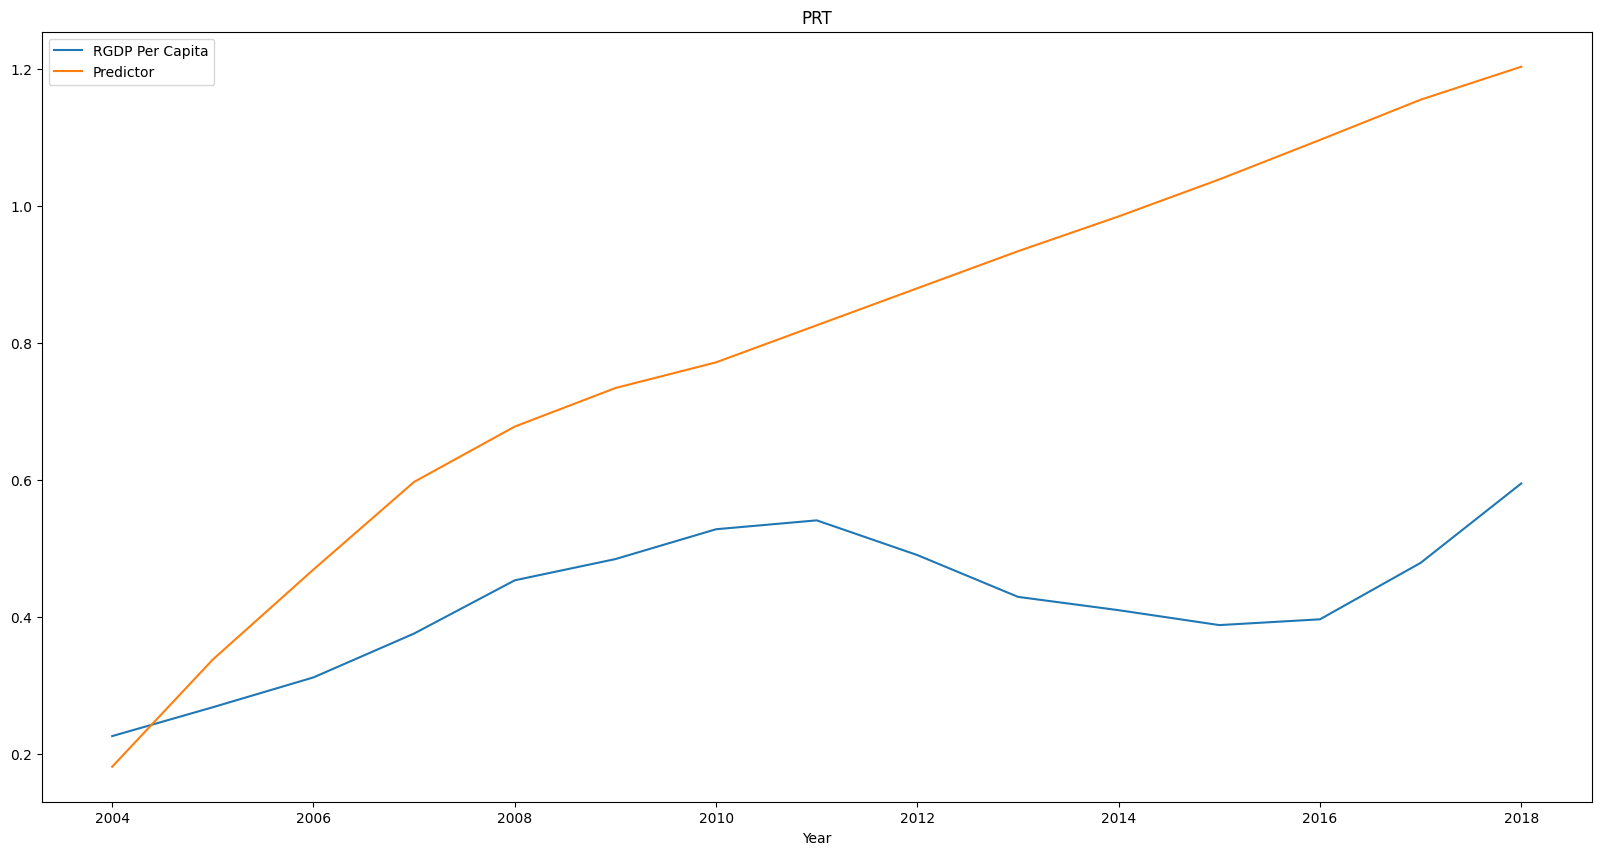

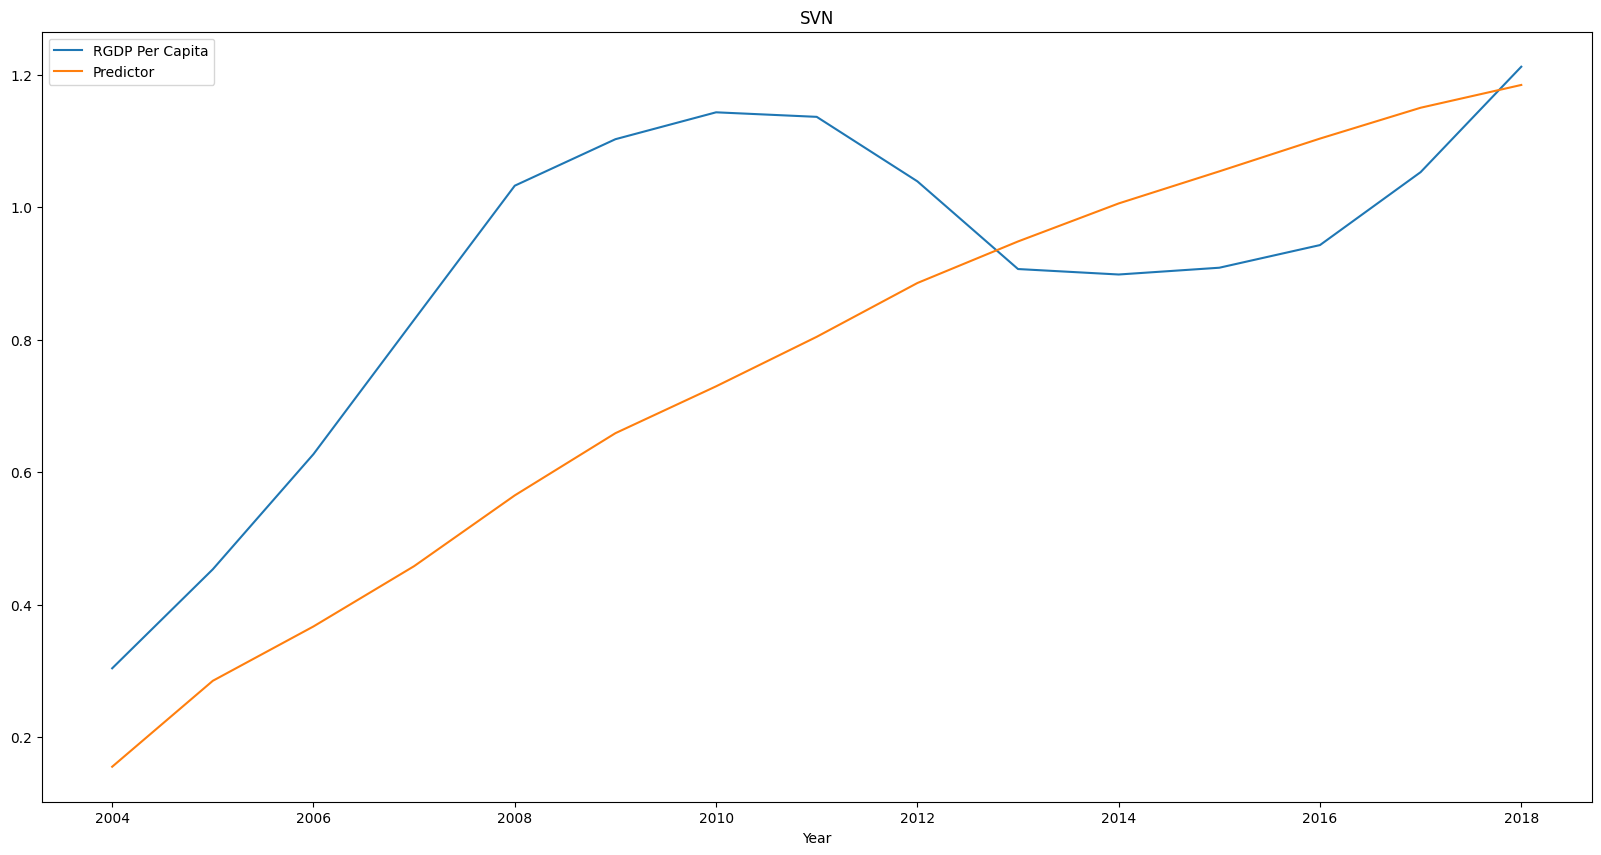

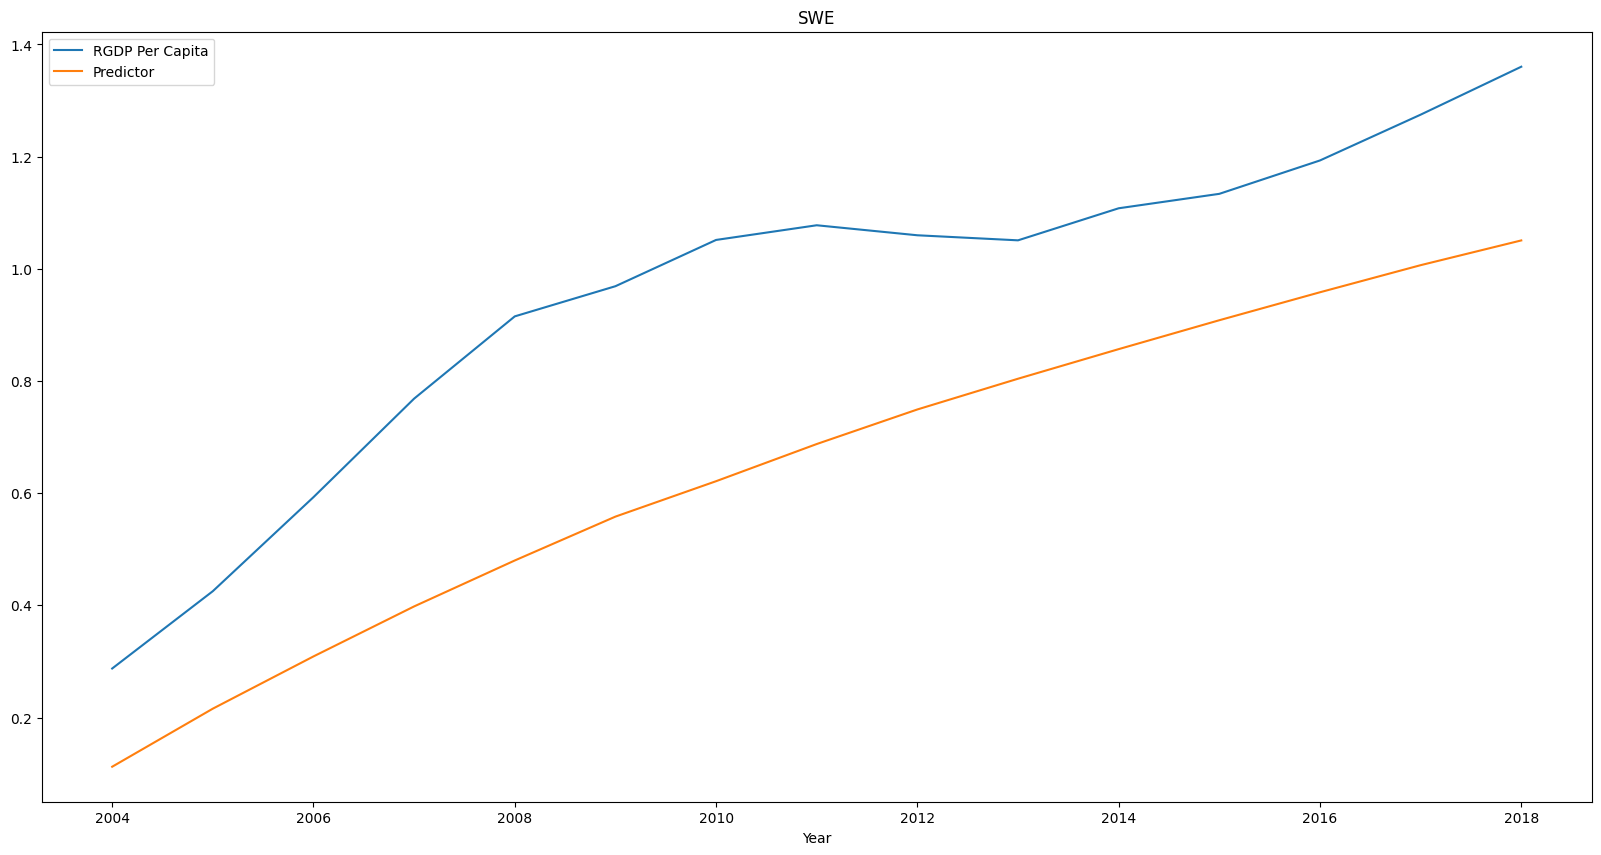

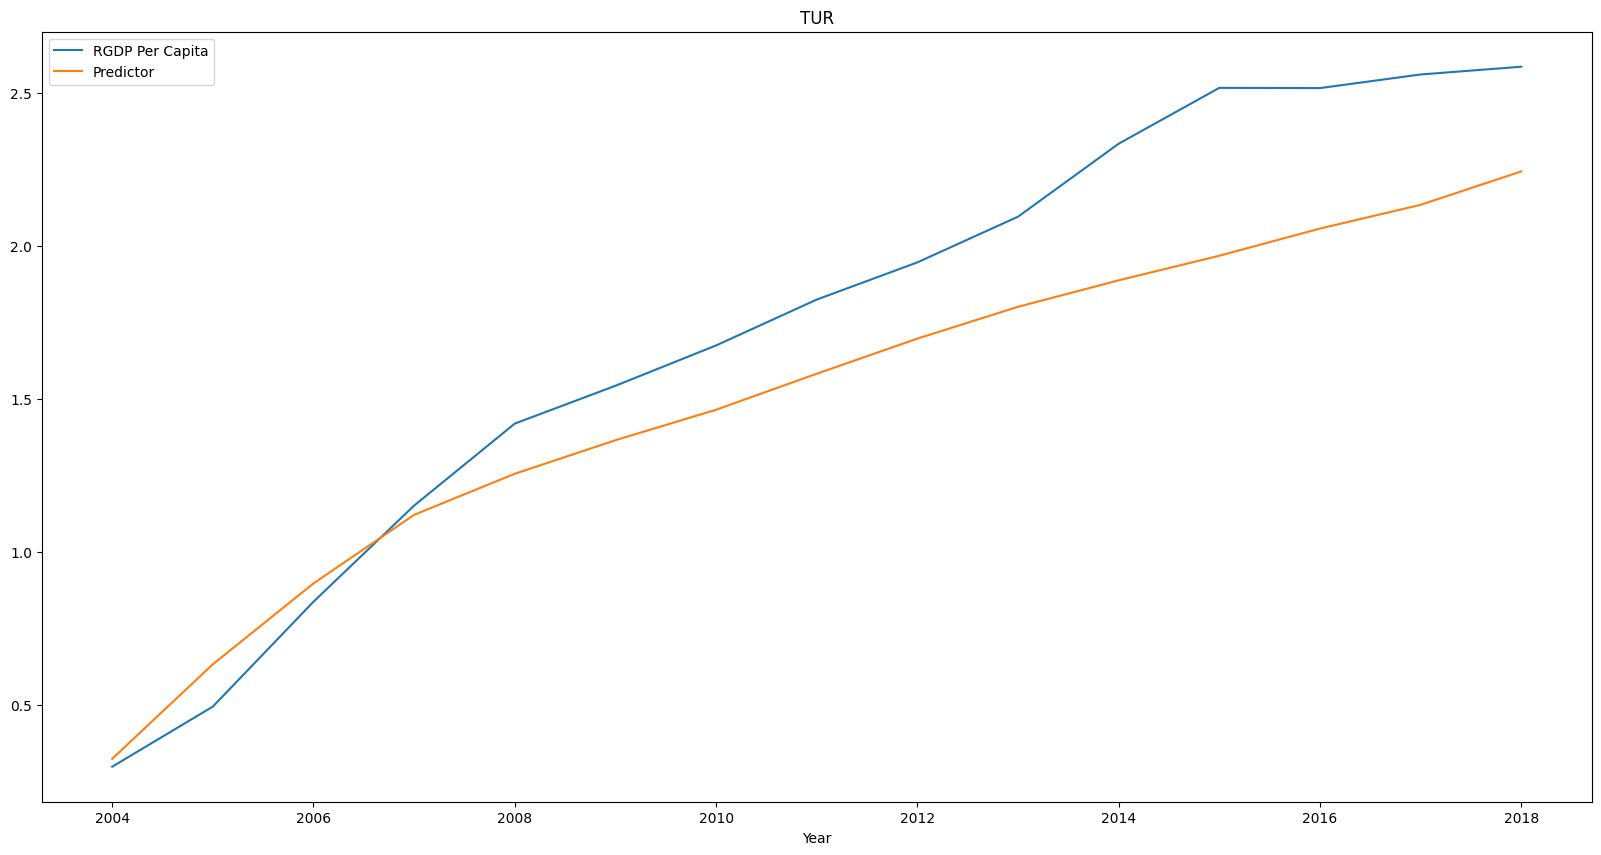

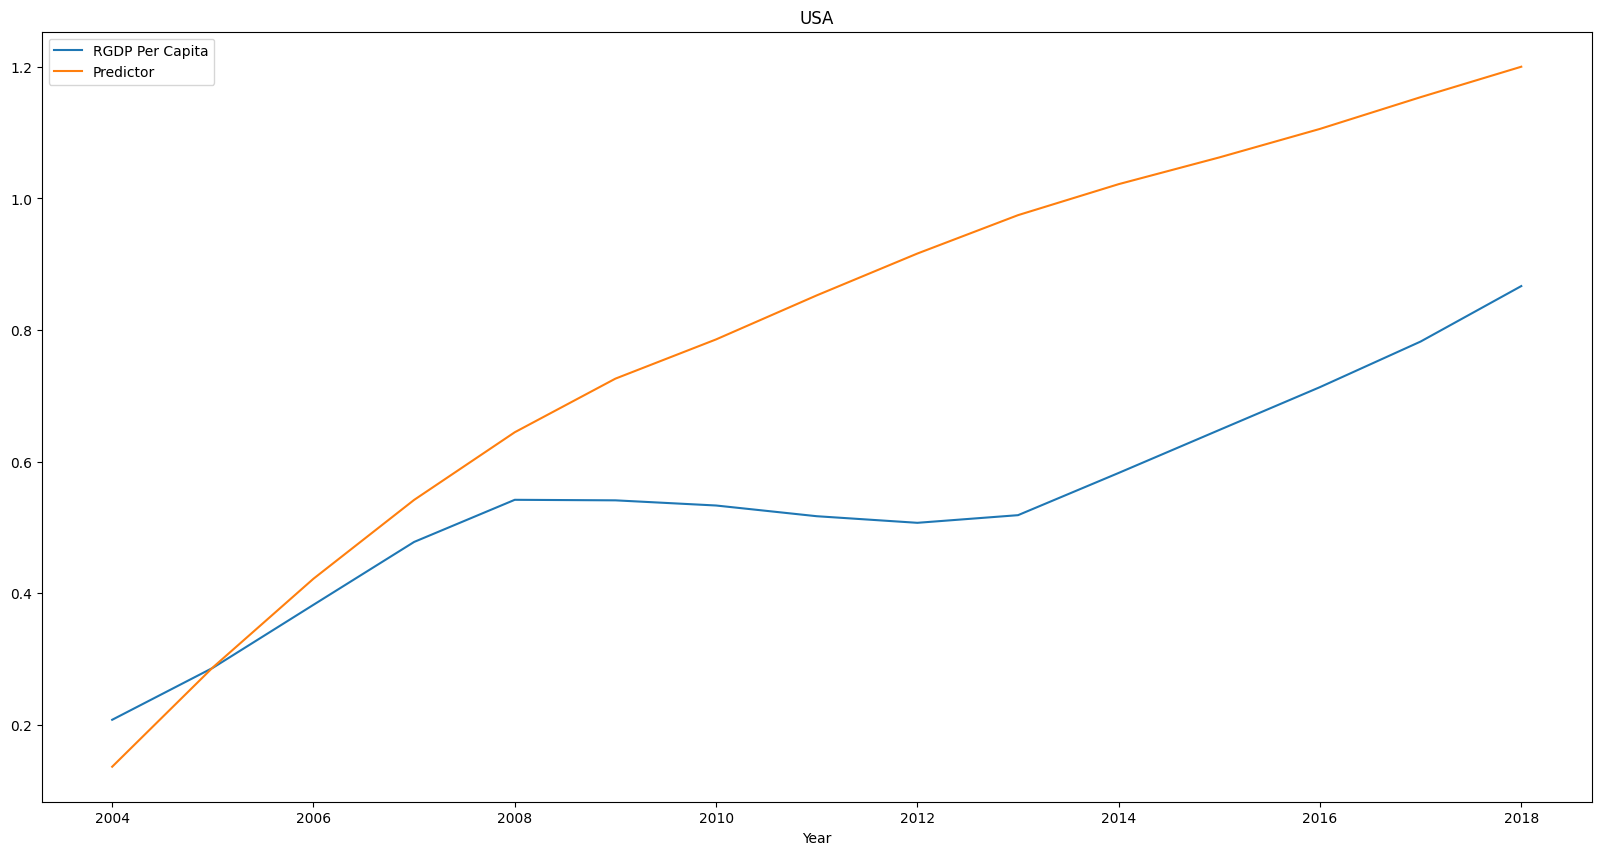

In [60]:
for country in sorted(set(plot_data.reset_index()["ISO_Code_3"])):
    fig, ax = plt.subplots(figsize = (20,10))
    plot_data.loc[country].cumsum().plot.line(ax=ax)
    ax.set_title(country)
    plt.plot()

5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

In [61]:
reg_data = data[reg_vars].dropna()
years_diff = 2
reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff) 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan)
reg_data["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].groupby("ISO_Code_3").shift(years_diff) 
x_vars.append("RGDP Per Capita Lag")
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     31.37
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           5.39e-29
Time:                        14:01:19   Log-Likelihood:                 741.30
No. Observations:                 741   AIC:                            -1471.
Df Residuals:                     735   BIC:                            -1443.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal System and Property Rights     0.0031      0.004      0.776      0.438      -0.005       0.011
Sound Money                         -0.0234      0.005     -4.908      0.000      -0.033      -0.014
Freedom to Trade Internationally     0.0306      0.006      4.912      0.000       0.018       0.043
Regulation                          -0.0114      0.005     -2.144      0.032      -0.022      -0.001
RGDP Per Capita Lag                  0.1162      0.015      7.691      0.000       0.087       0.146
RGDP Per Capita Lag                  0.1162      0.015      7.691      0.000       0.087       0.146
Constant                             0.0756      0.045      1.679      0.094      -0.013       0.164
==============================================================================
Omnibus:                      267.589   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1706.921
Skew:                           1.479   Prob(JB):                         0.00
Kurtosis:                       9.821   Cond. No.                     3.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\2817517147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()
C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\2817517147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<AxesSubplot: ylabel='Frequency'>

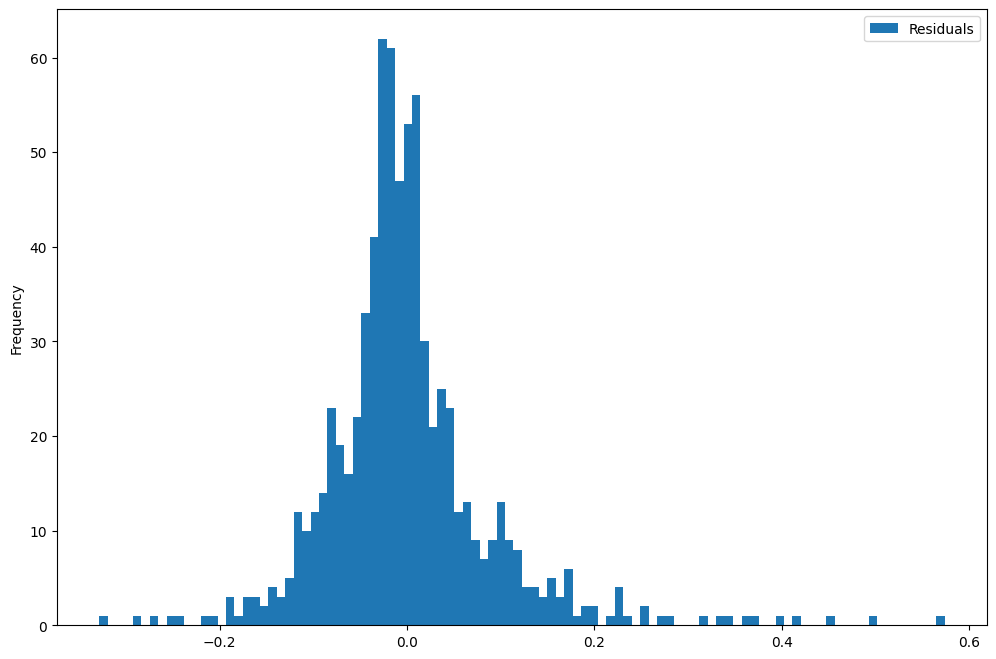

In [62]:
r_data["Predictor"] = results.predict()
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))
r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

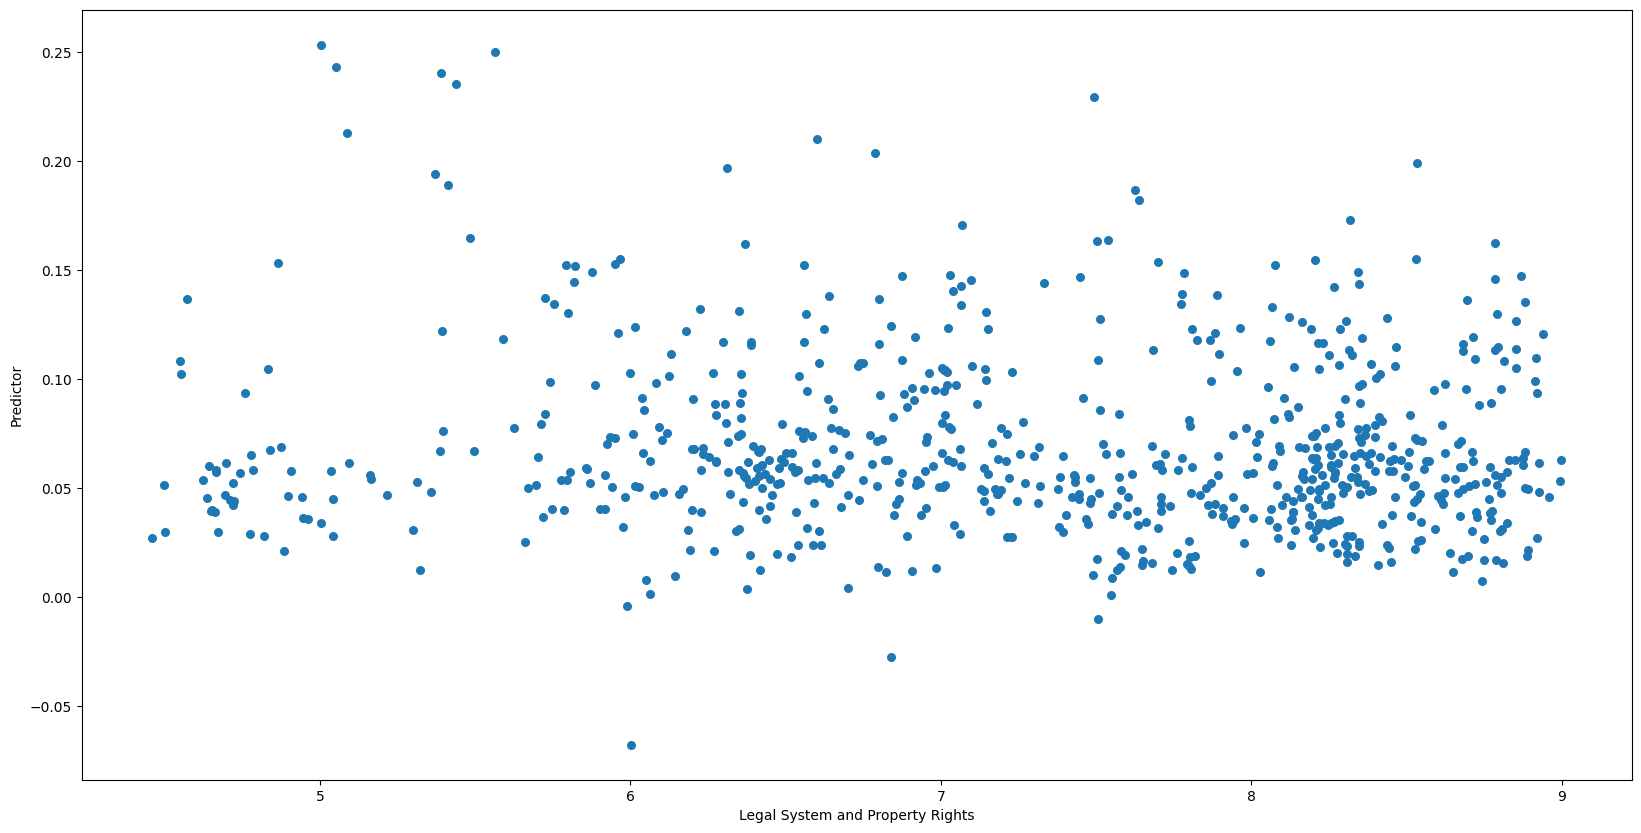

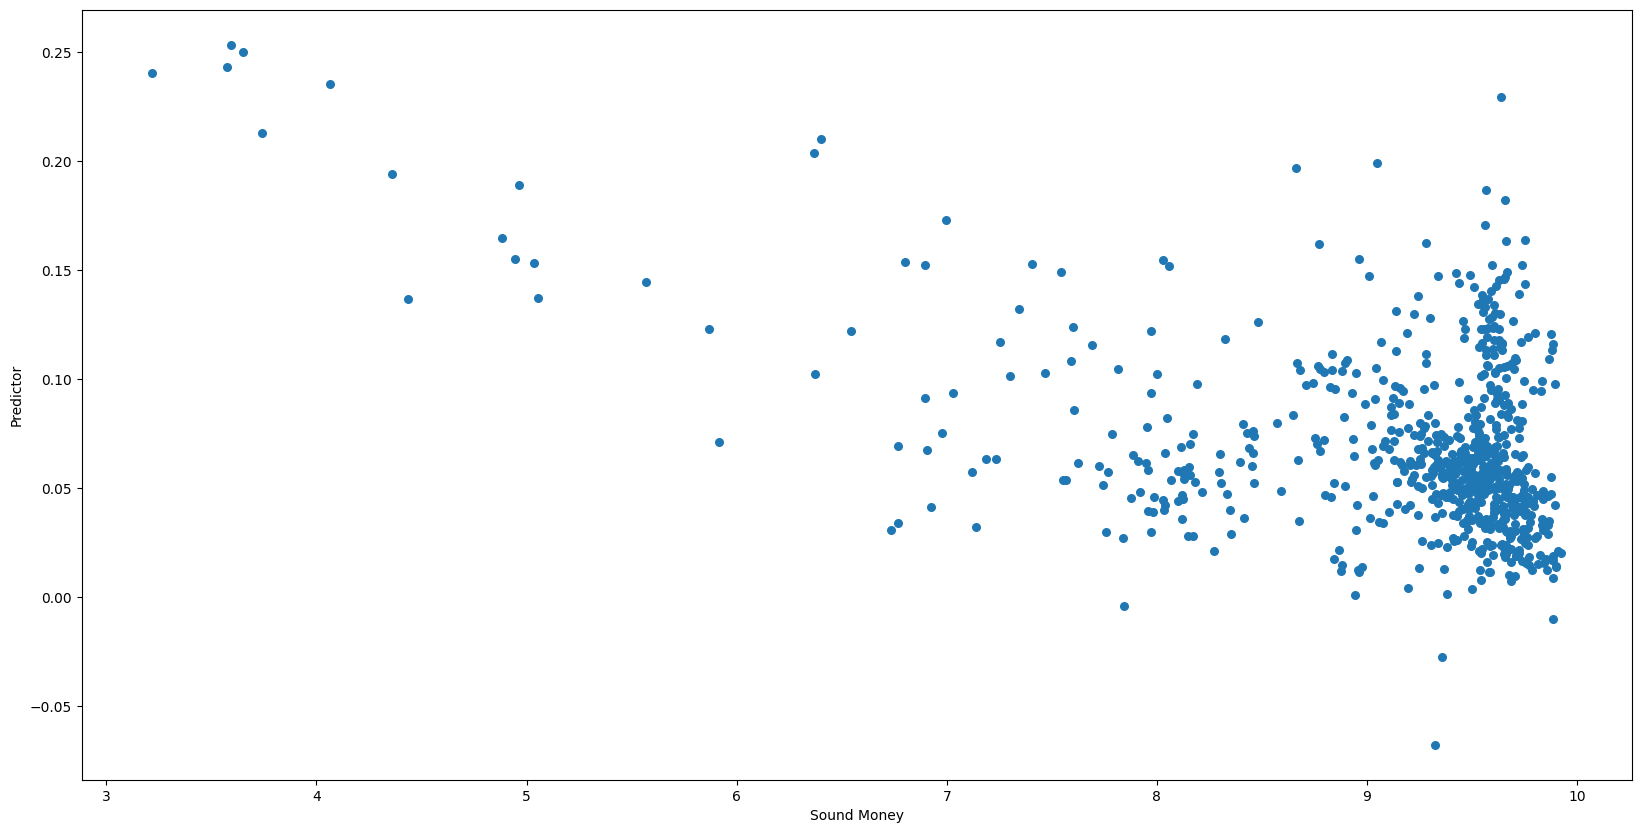

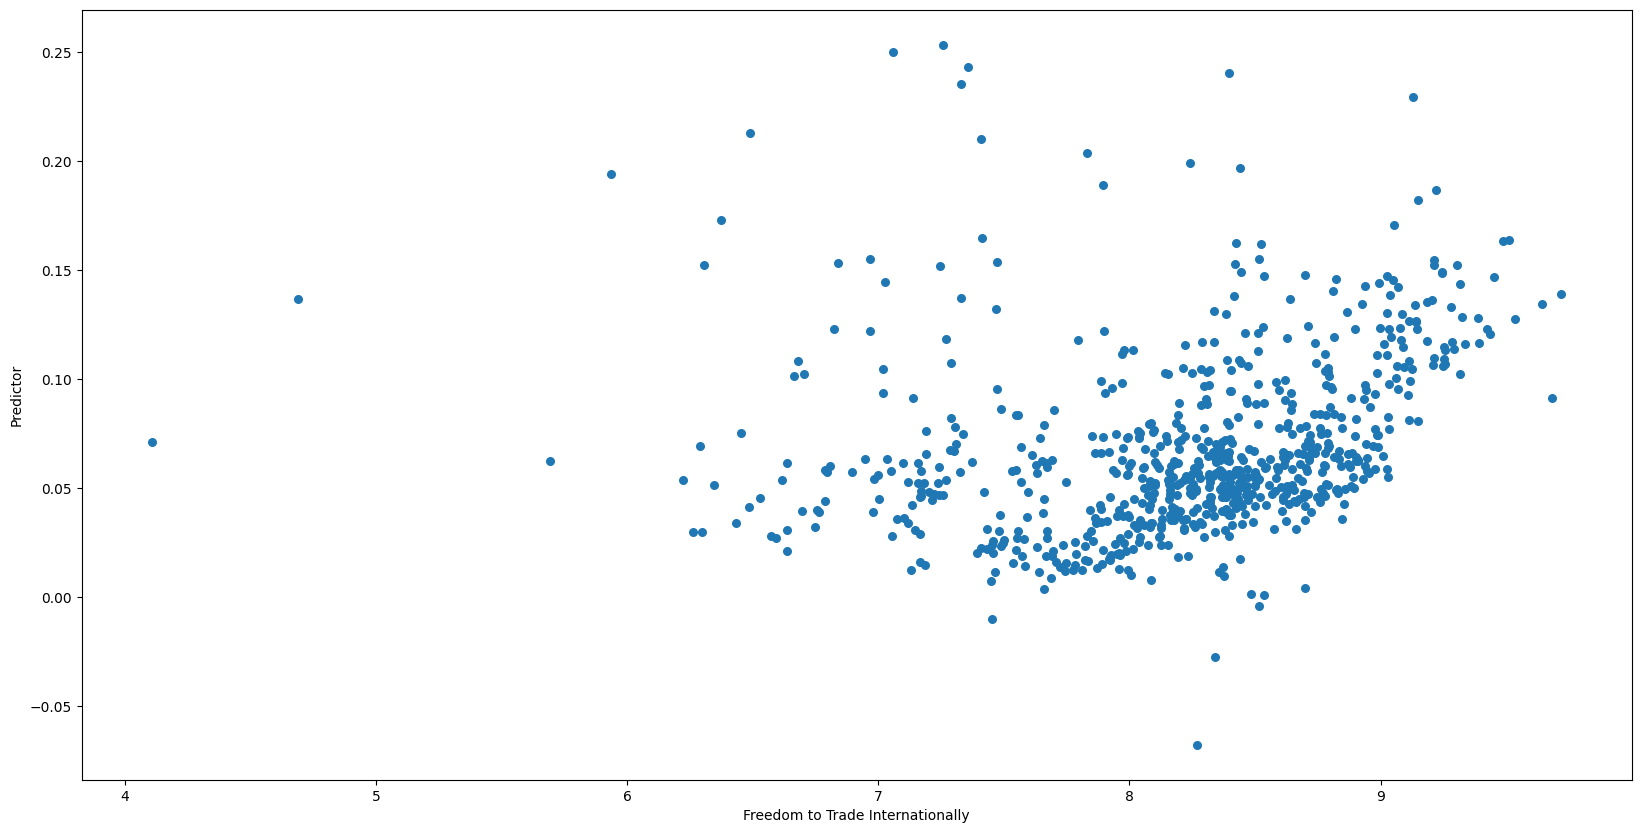

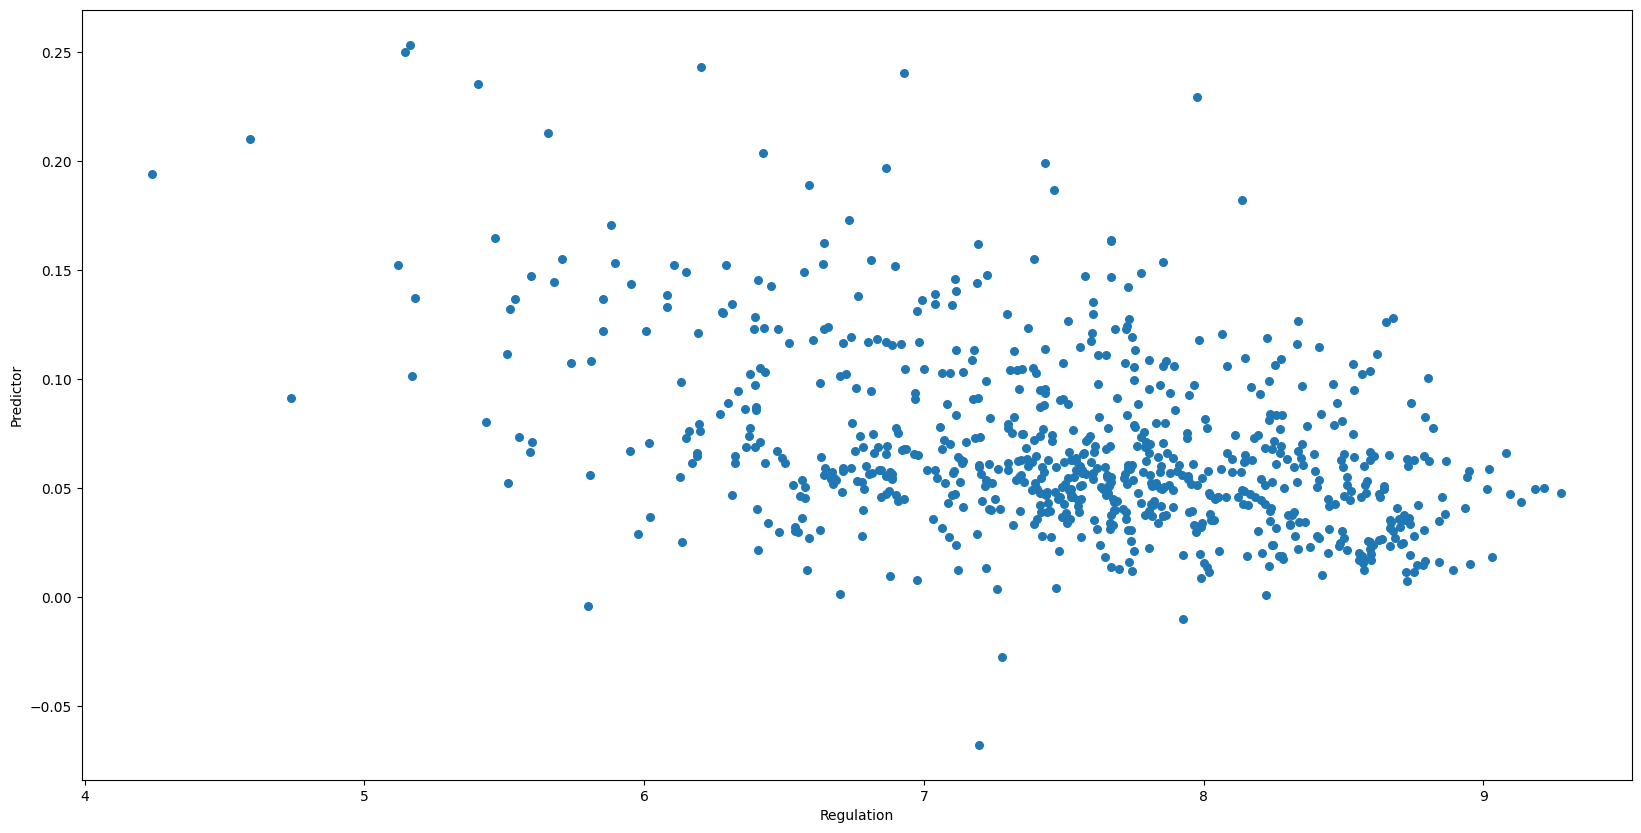

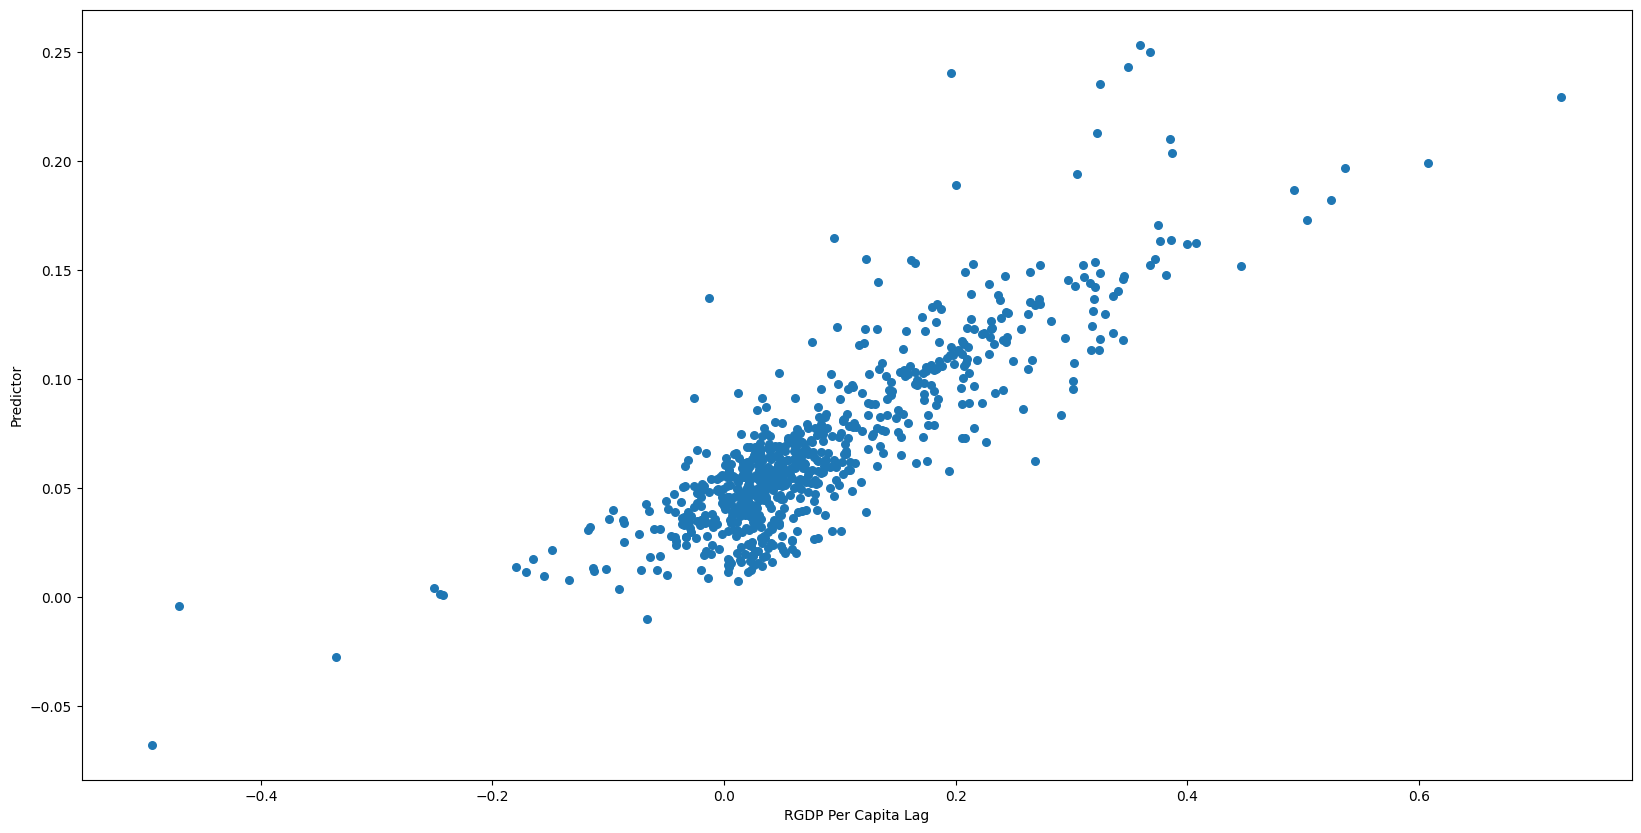

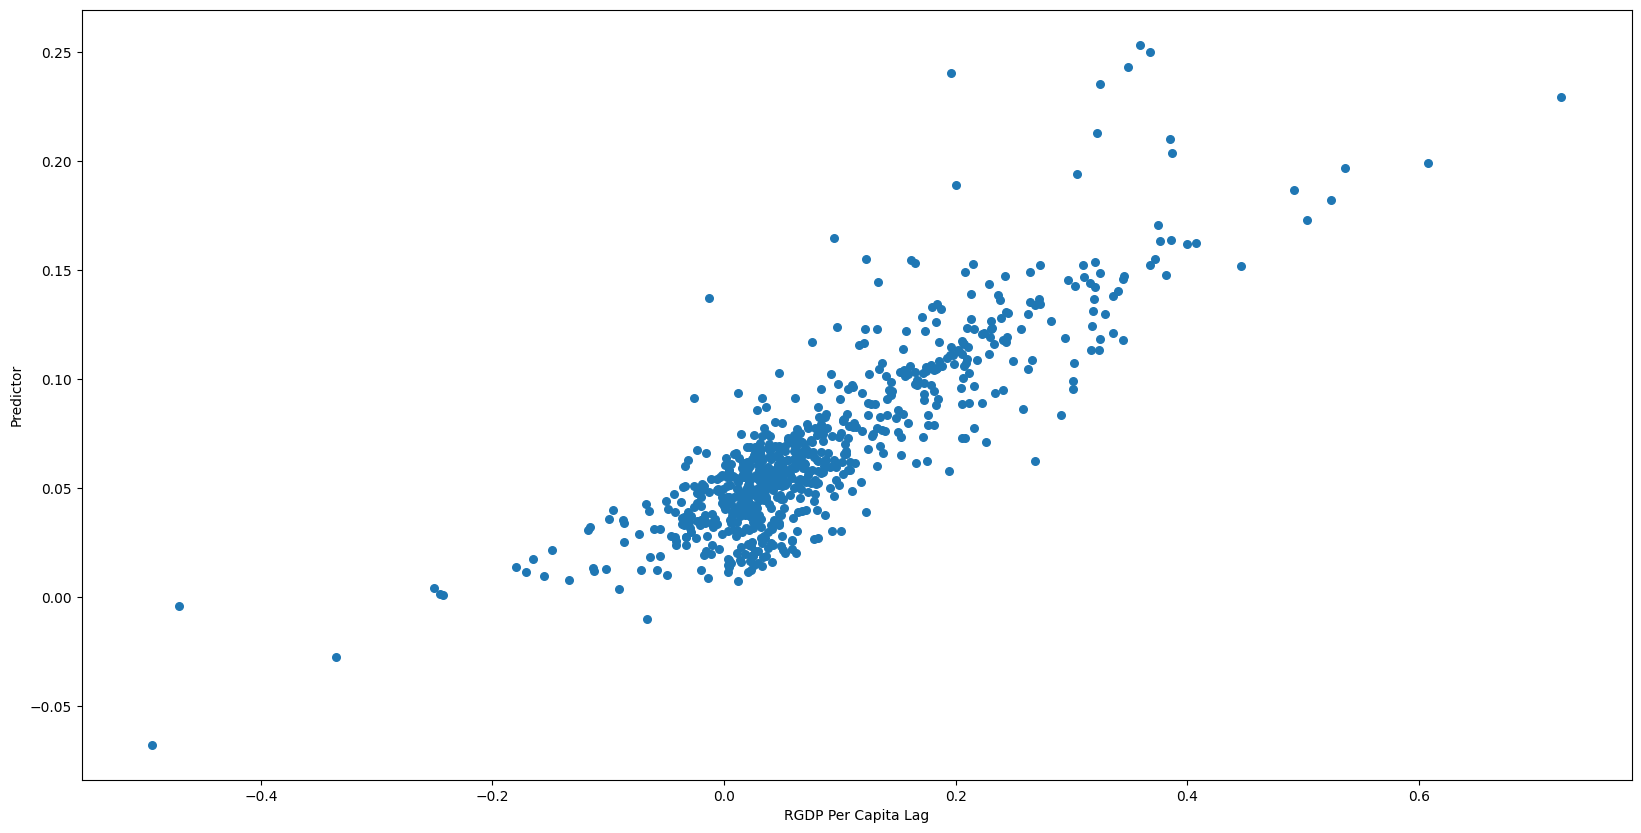

In [63]:
for key in X.keys()[:-1]:
    fig, ax = plt.subplots(figsize=(20,10))
    r_data.plot.scatter(x = key,
                 y = "Predictor", 
                  s = 30, ax = ax)

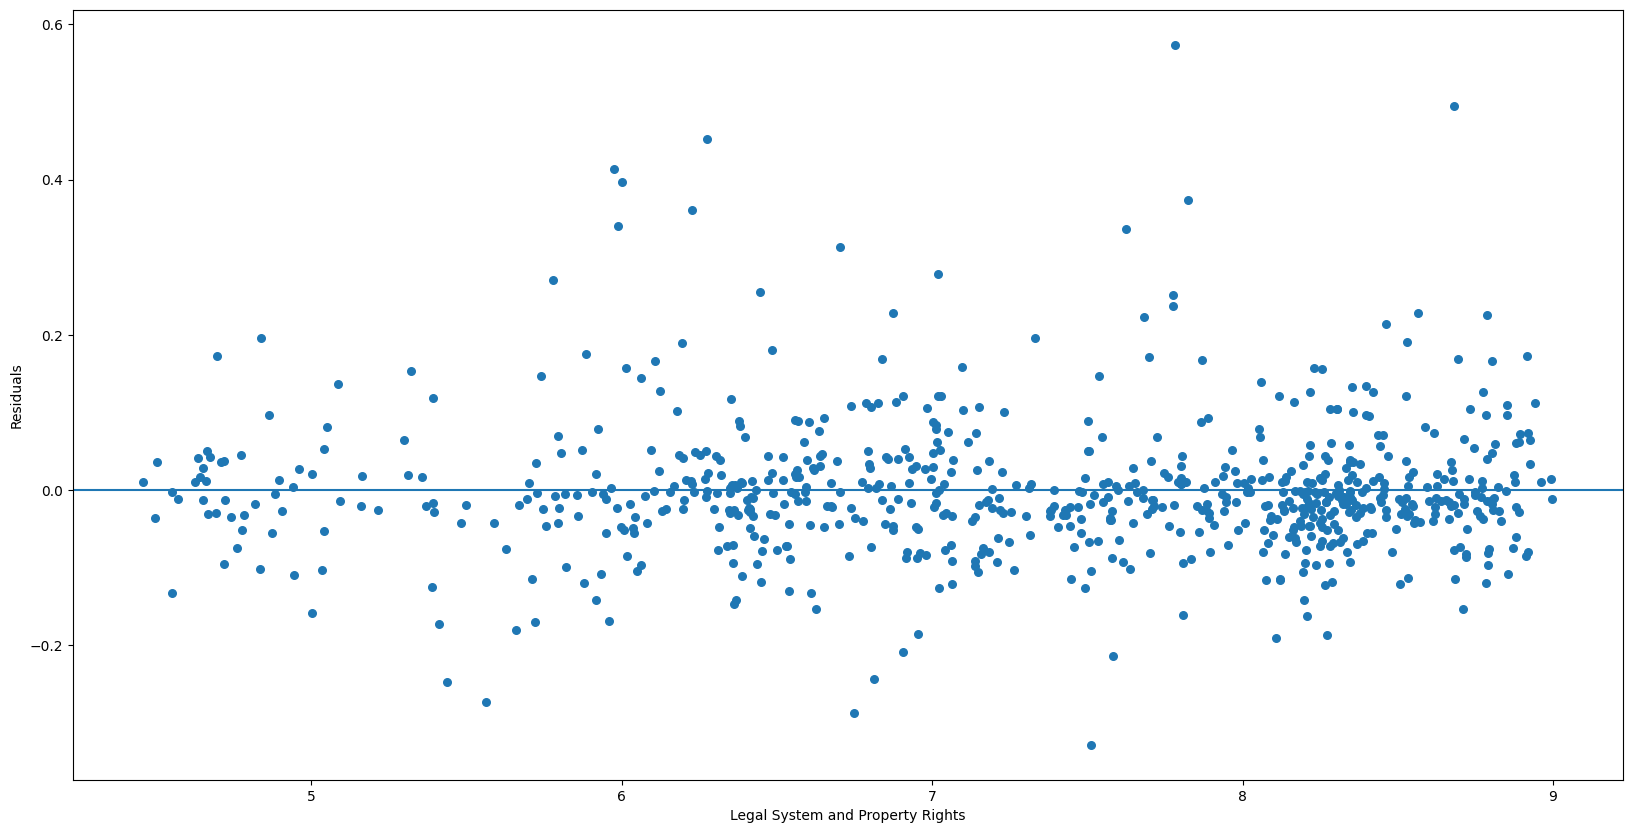

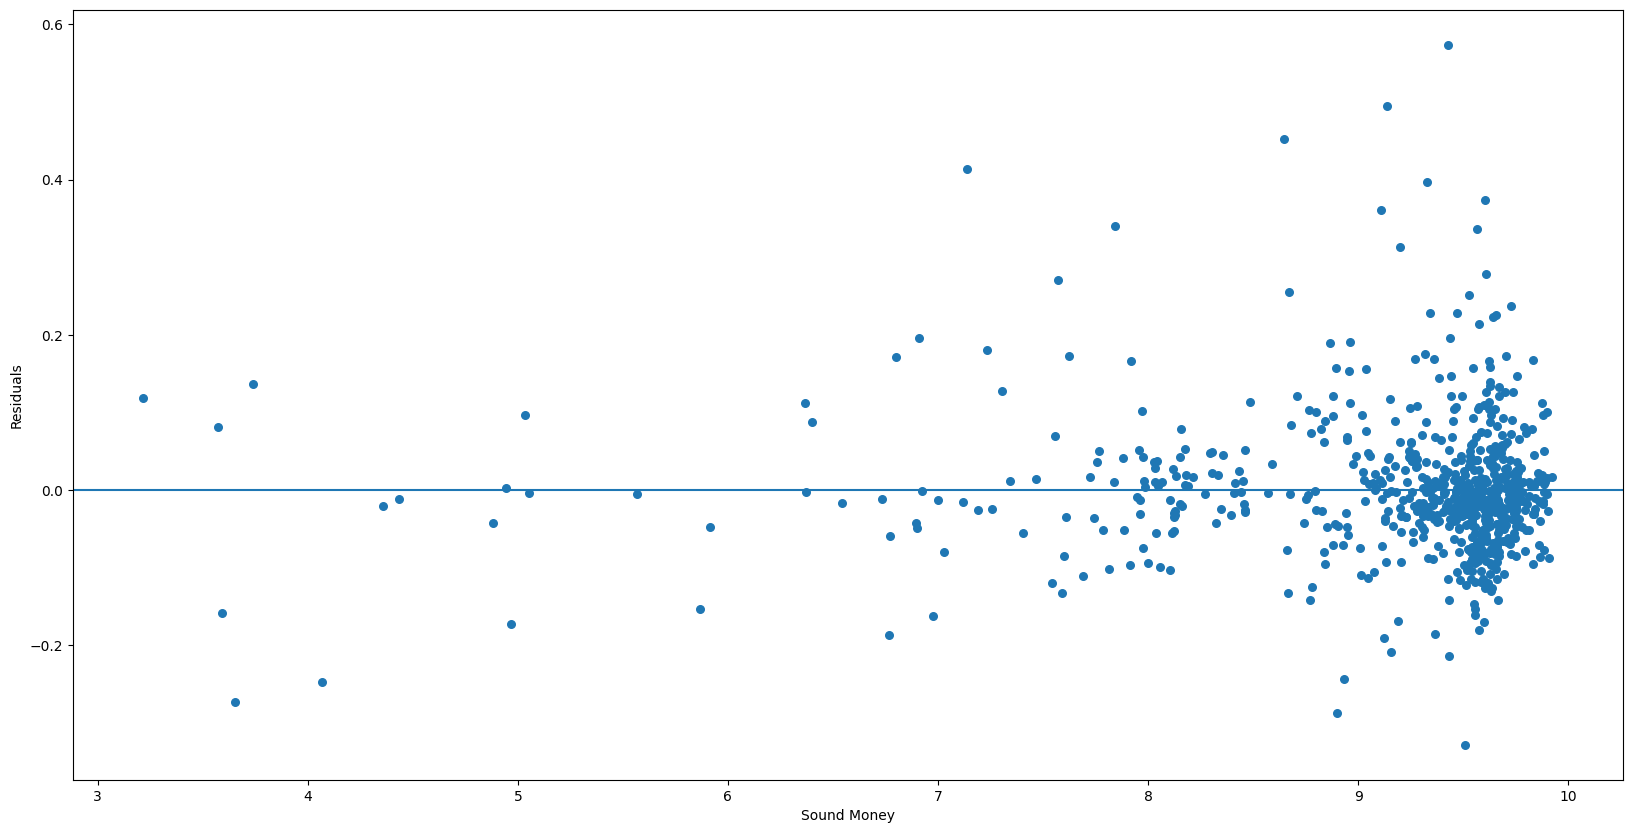

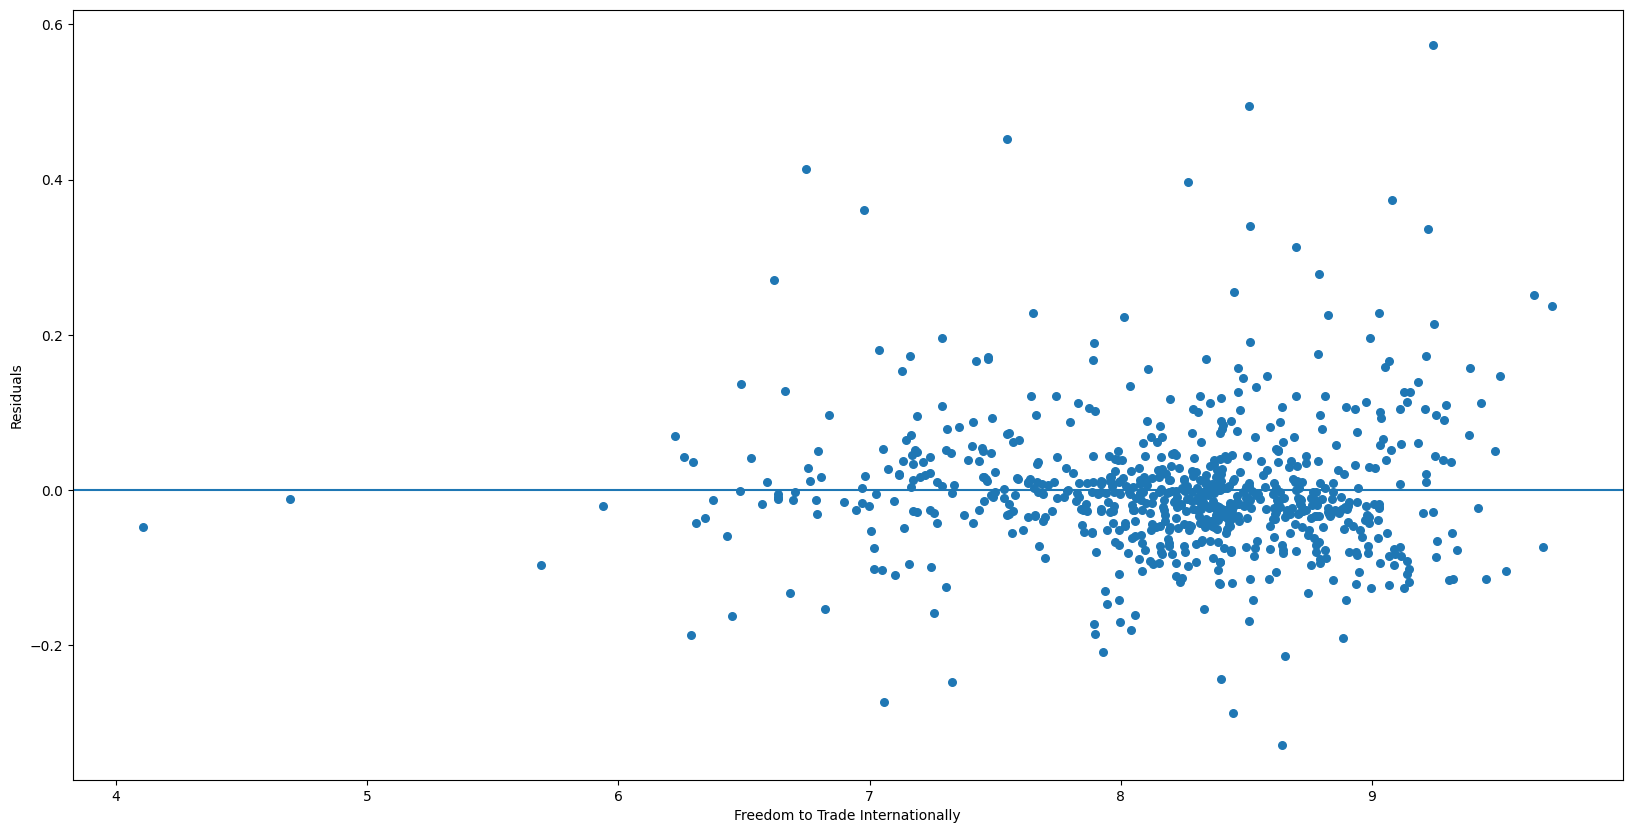

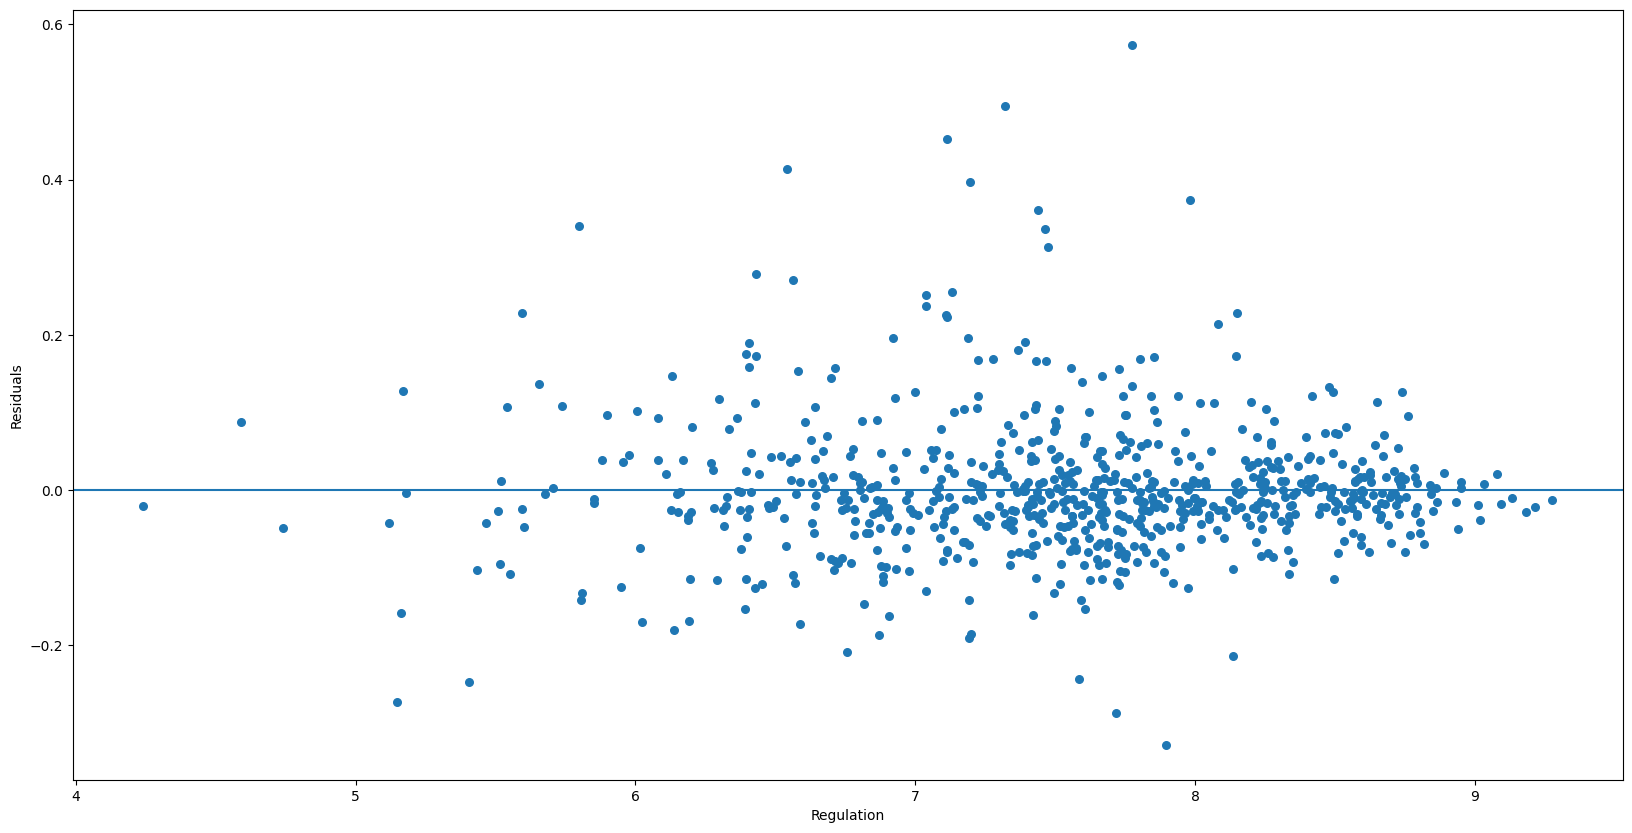

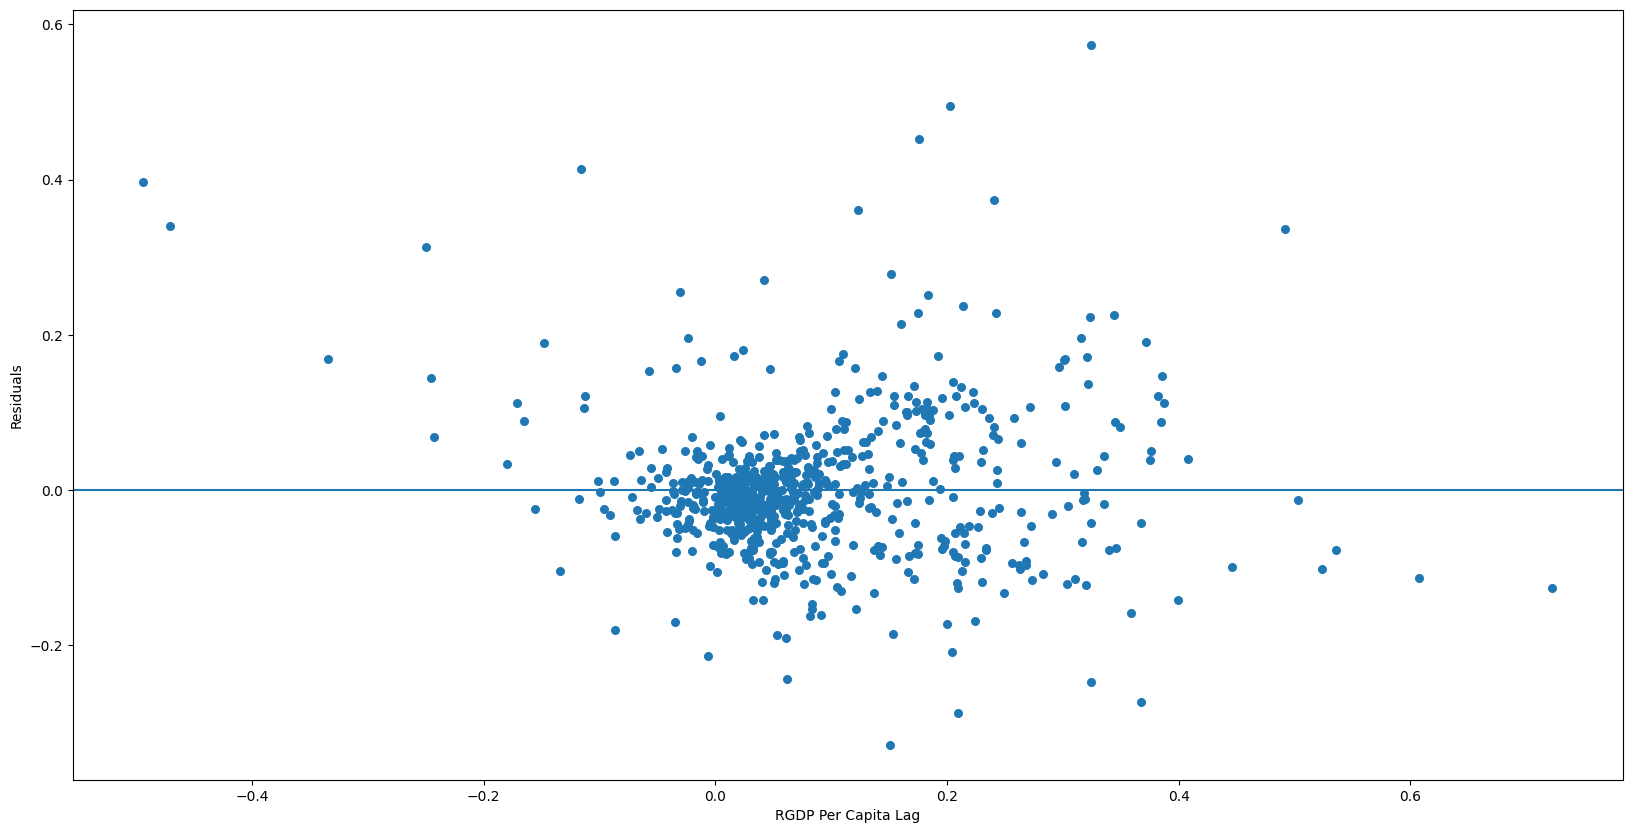

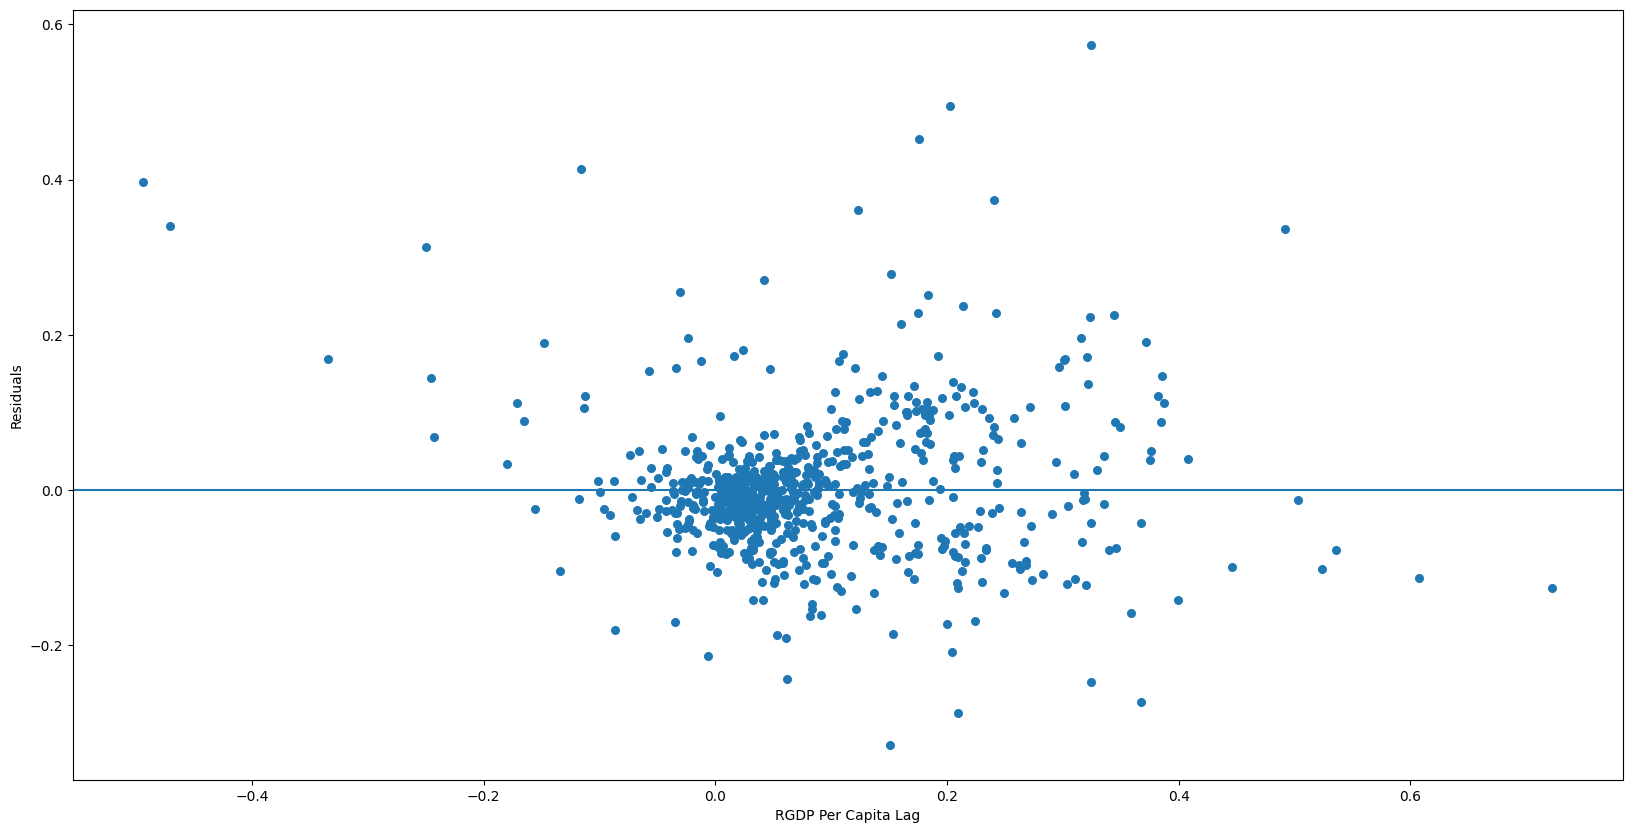

In [64]:
for key in X.keys()[:-1]:
    fig, ax = plt.subplots(figsize=(20,10))
    r_data.plot.scatter(x = key,
                 y = "Residuals", 
                  s = 30, ax = ax)
    ax.axhline(0)

C:\Users\hthog\AppData\Local\Temp\ipykernel_5456\258739728.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (20,10))


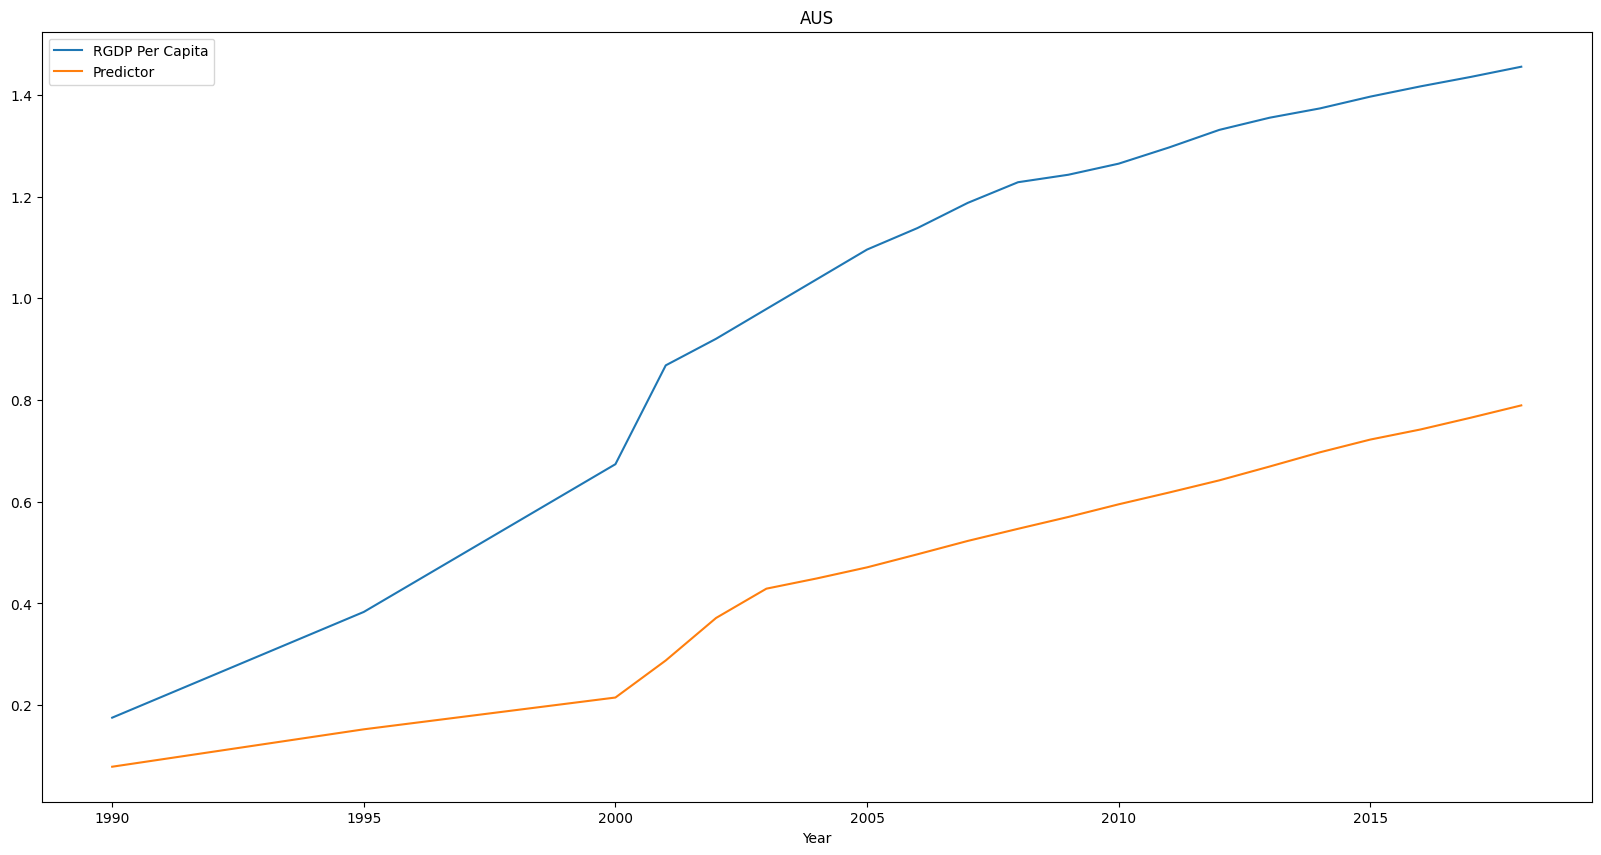

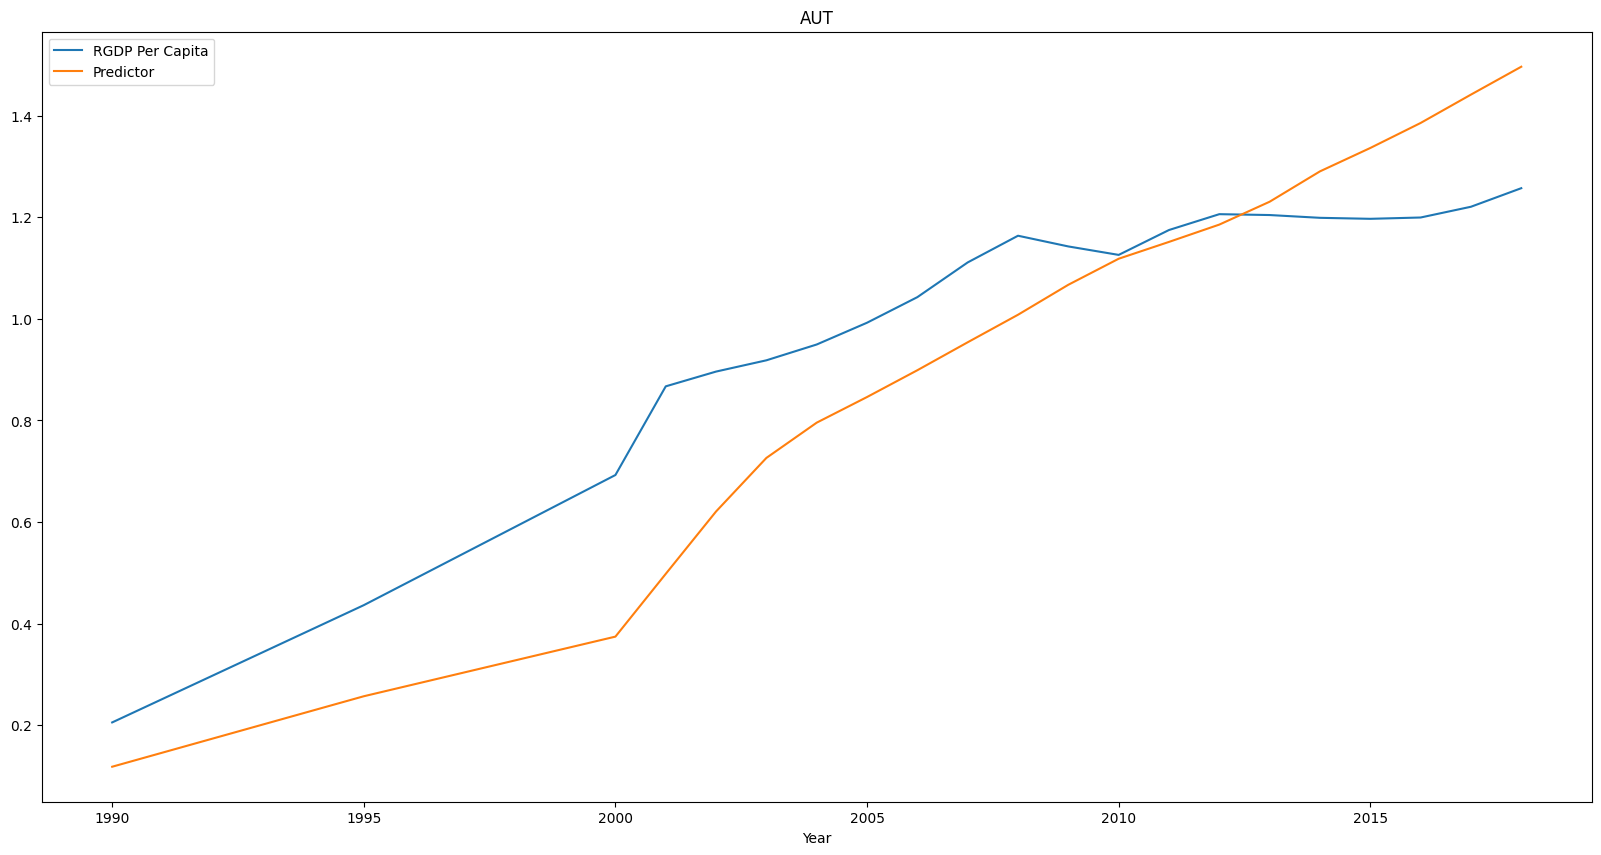

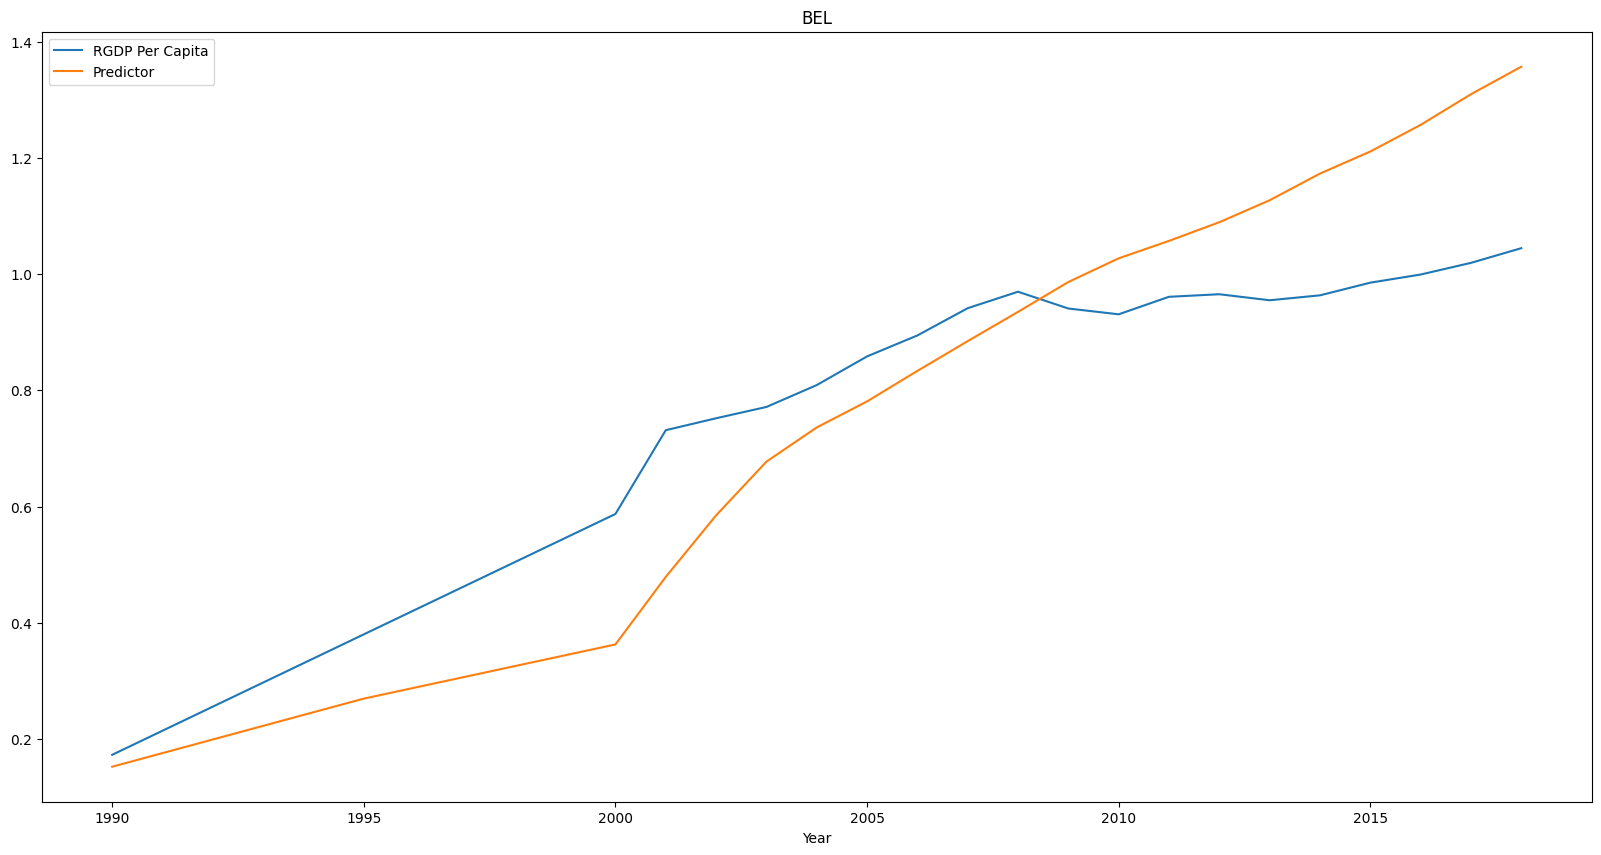

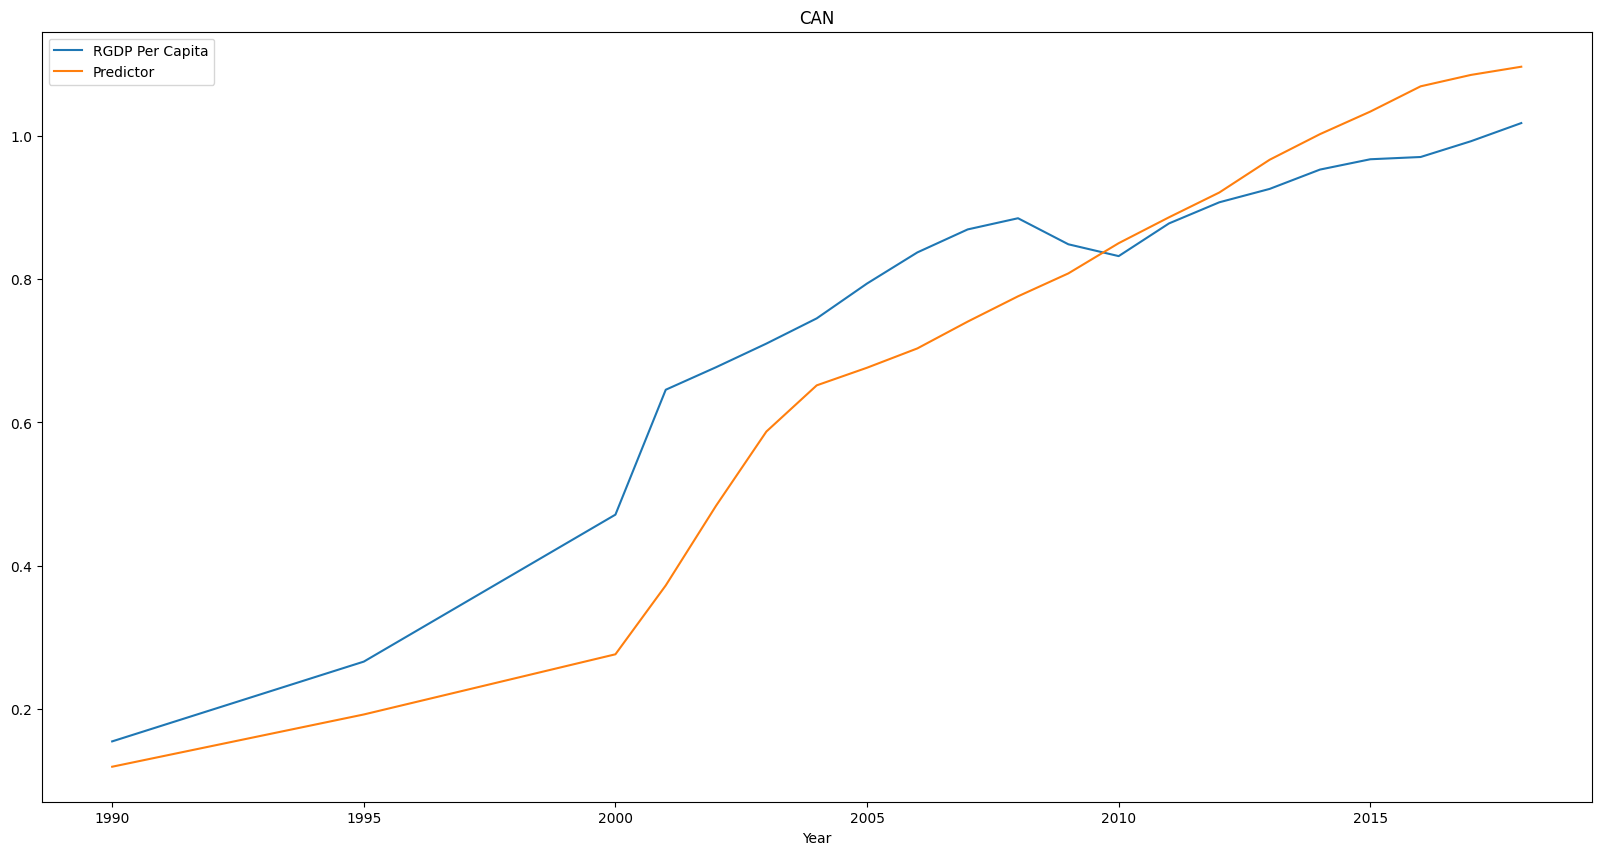

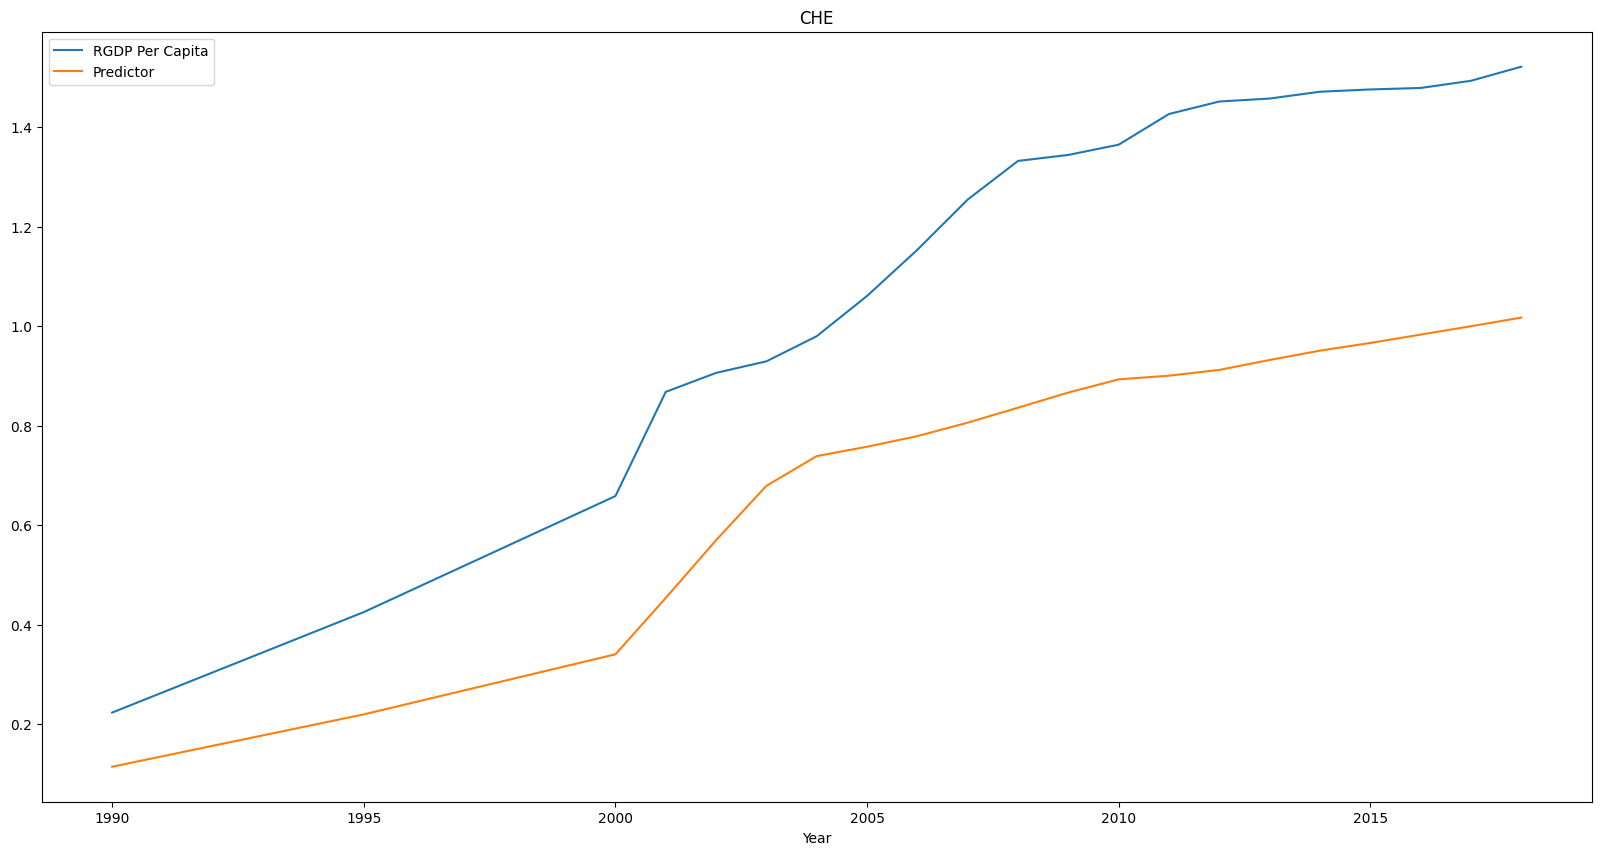

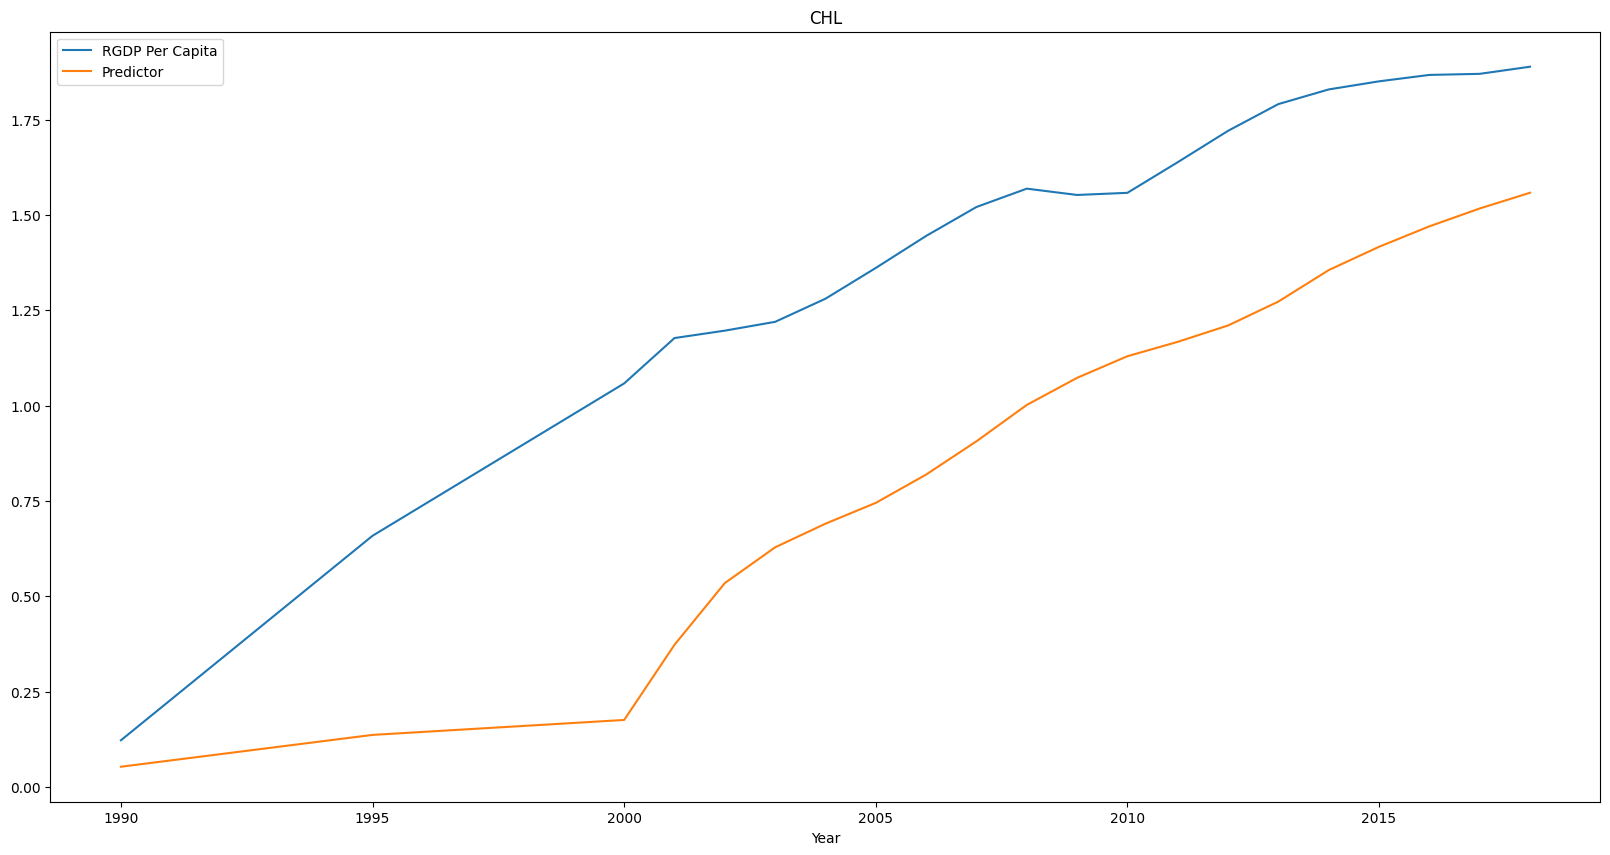

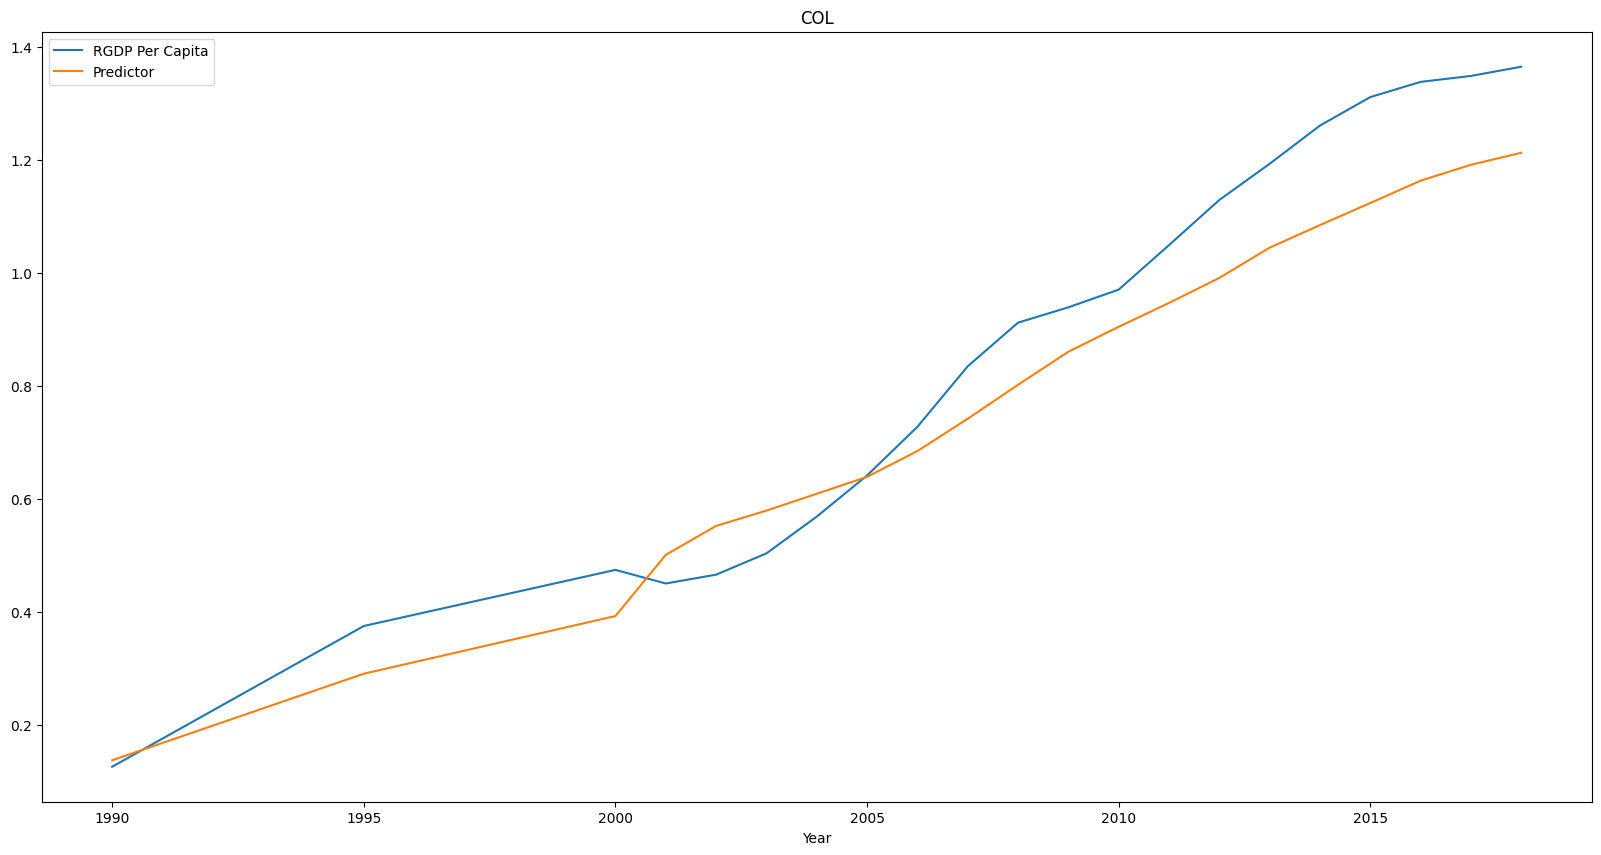

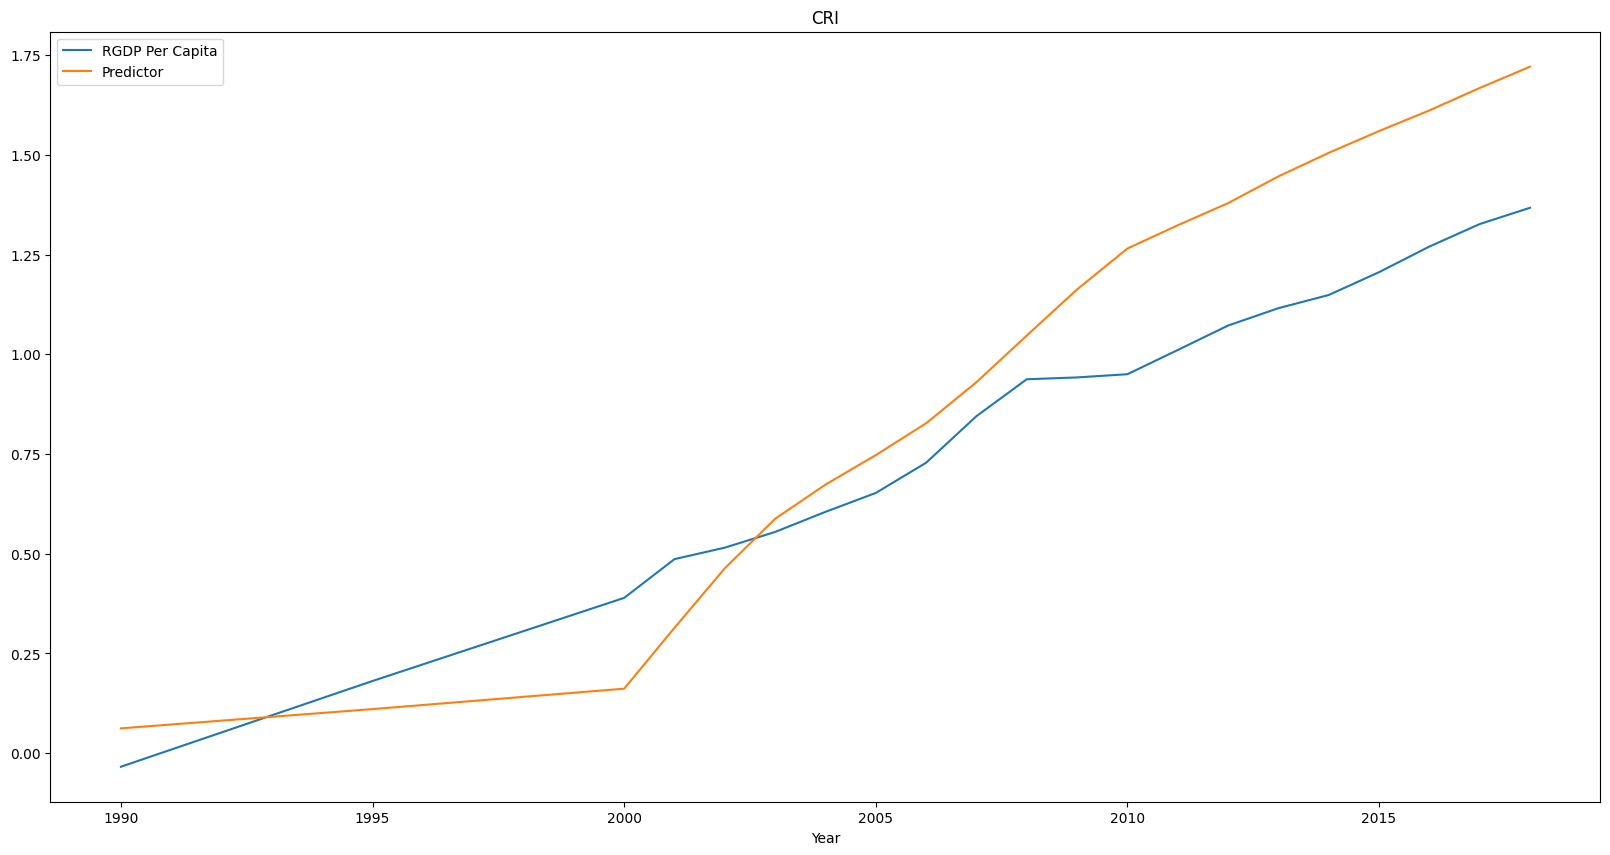

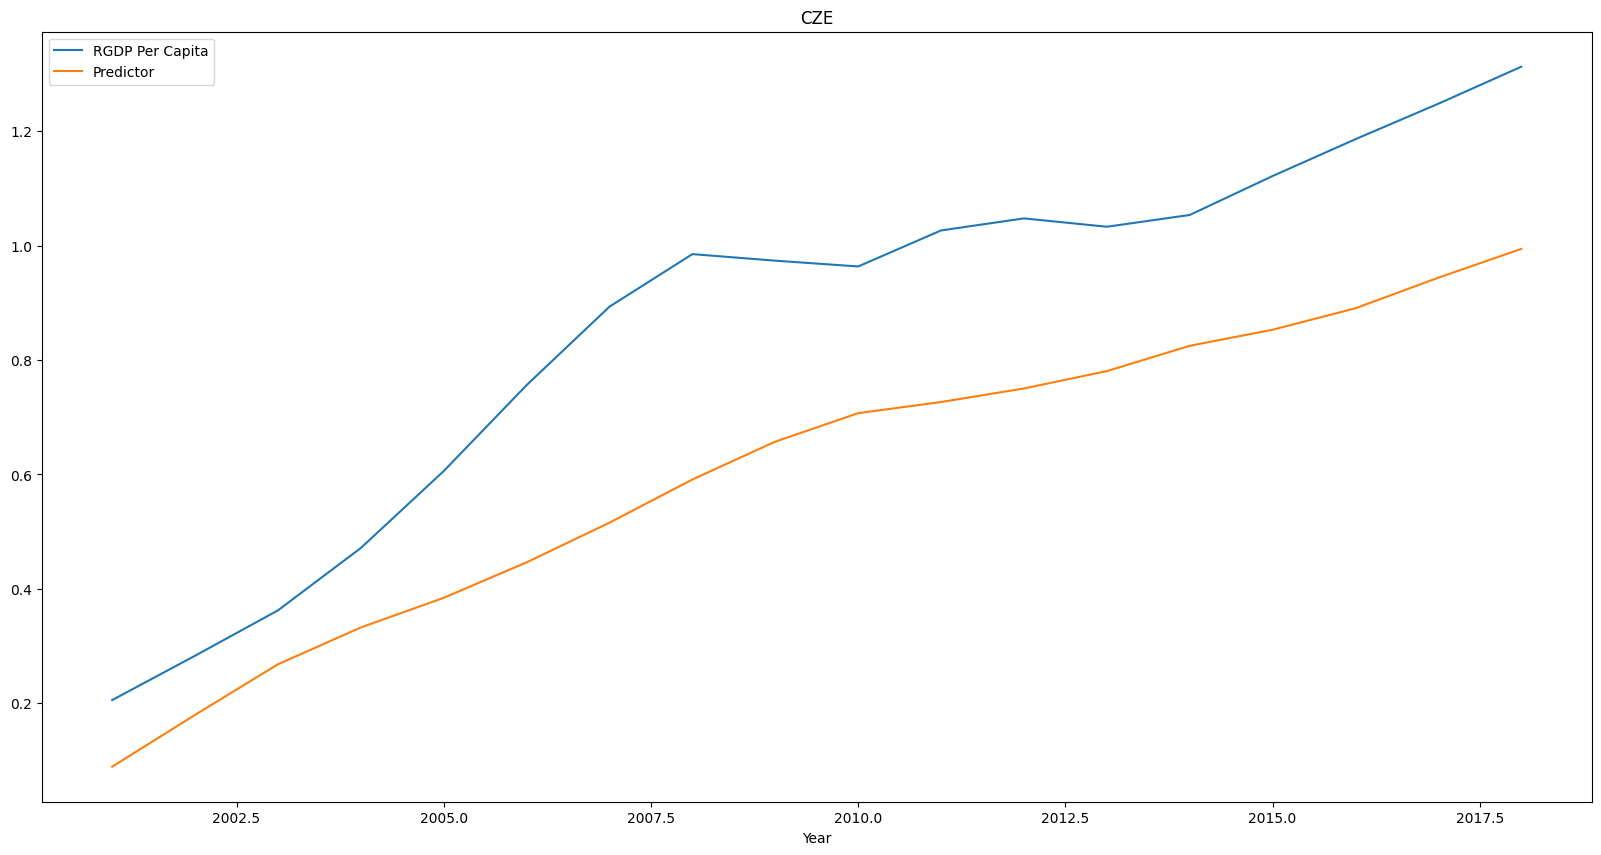

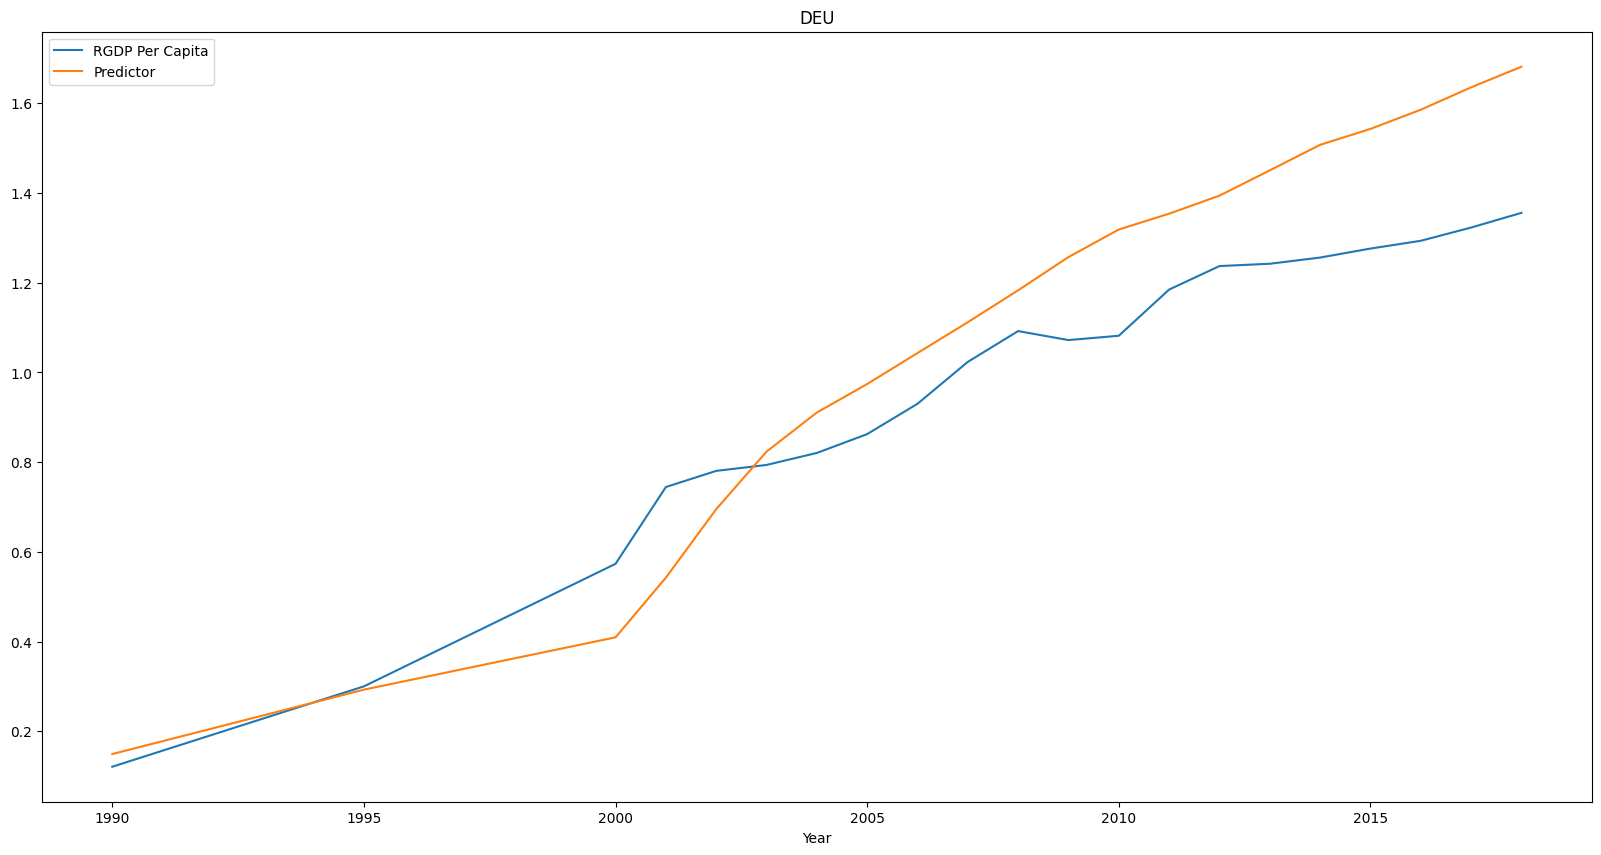

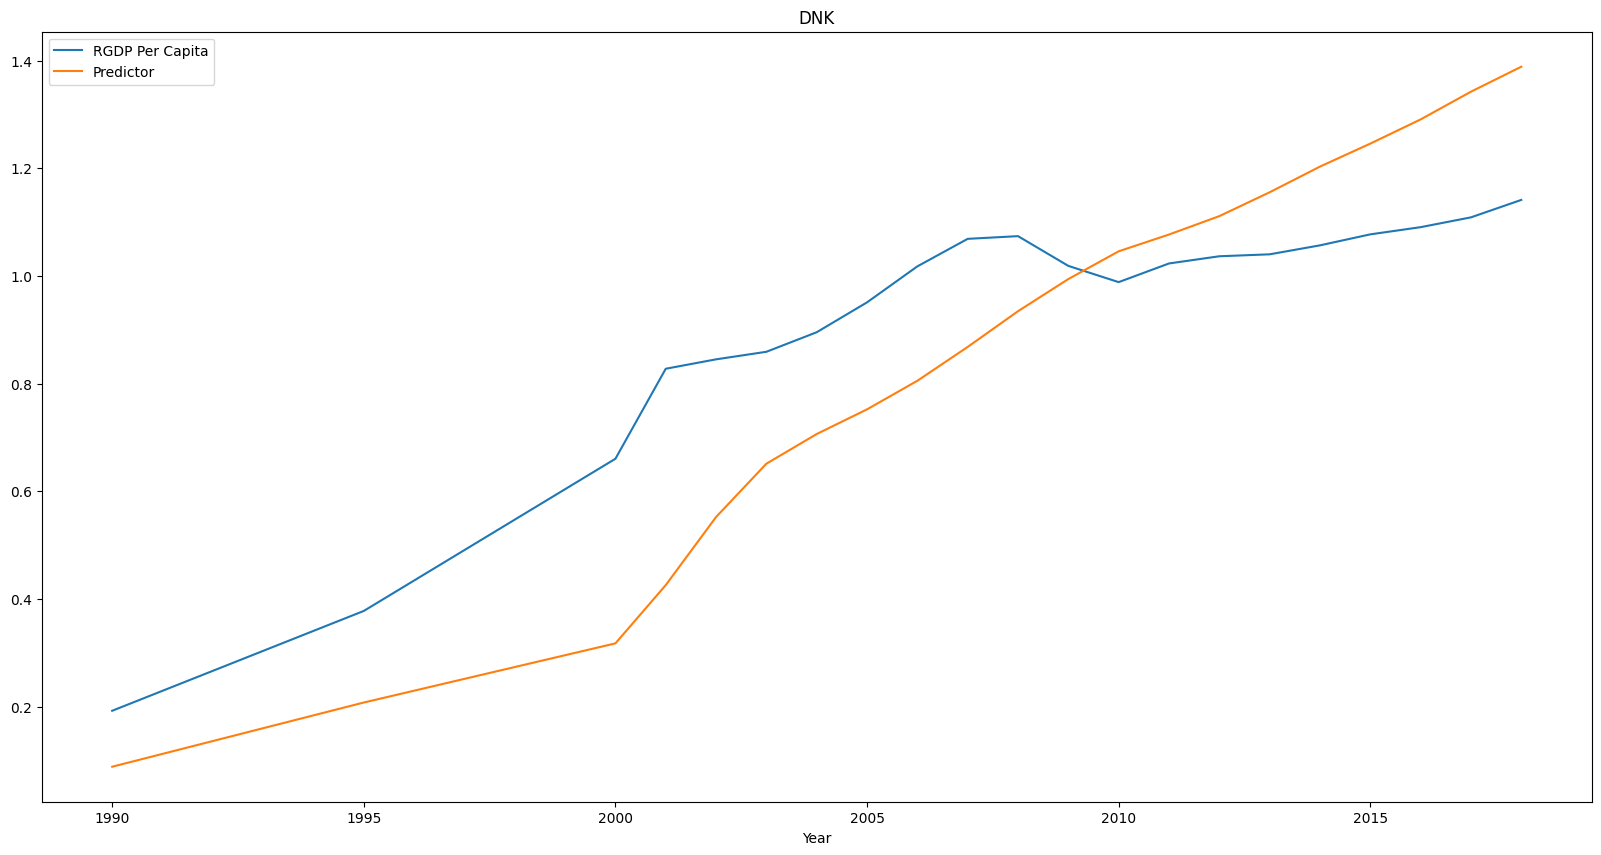

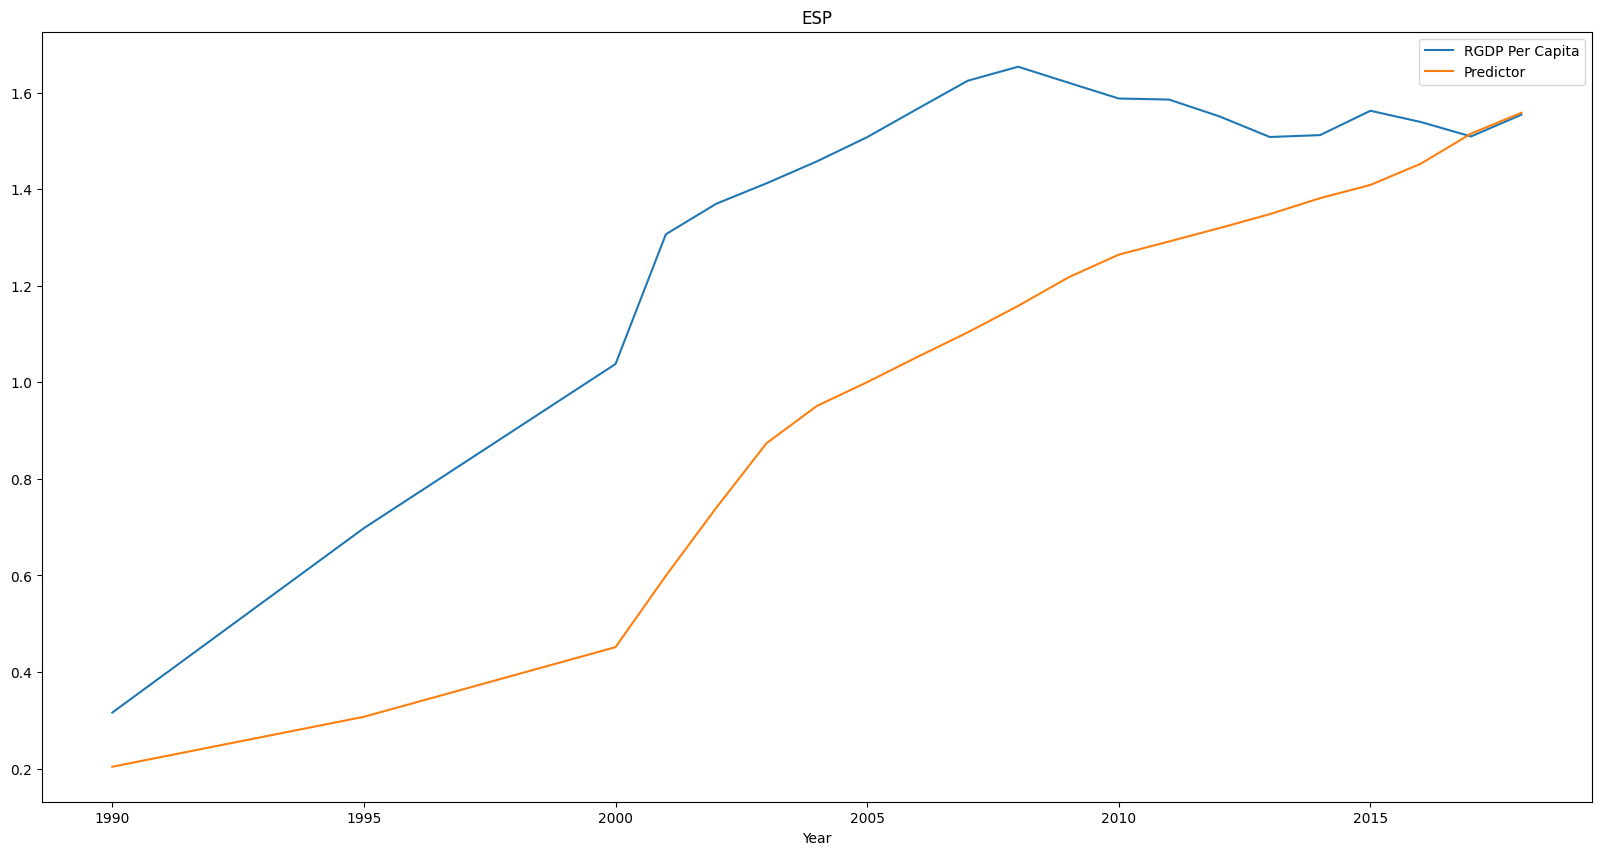

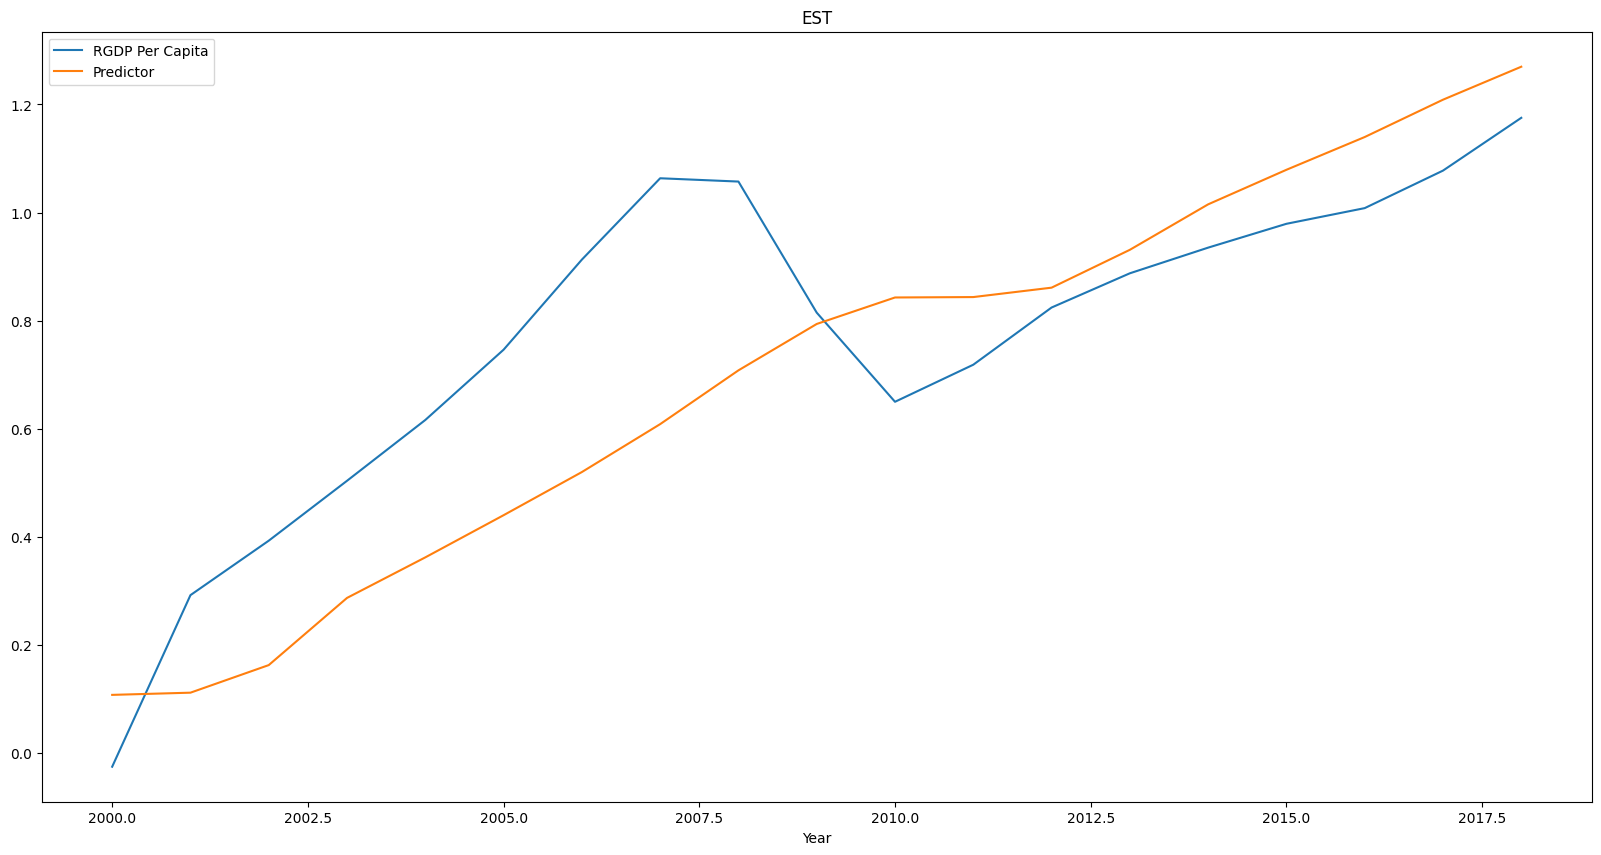

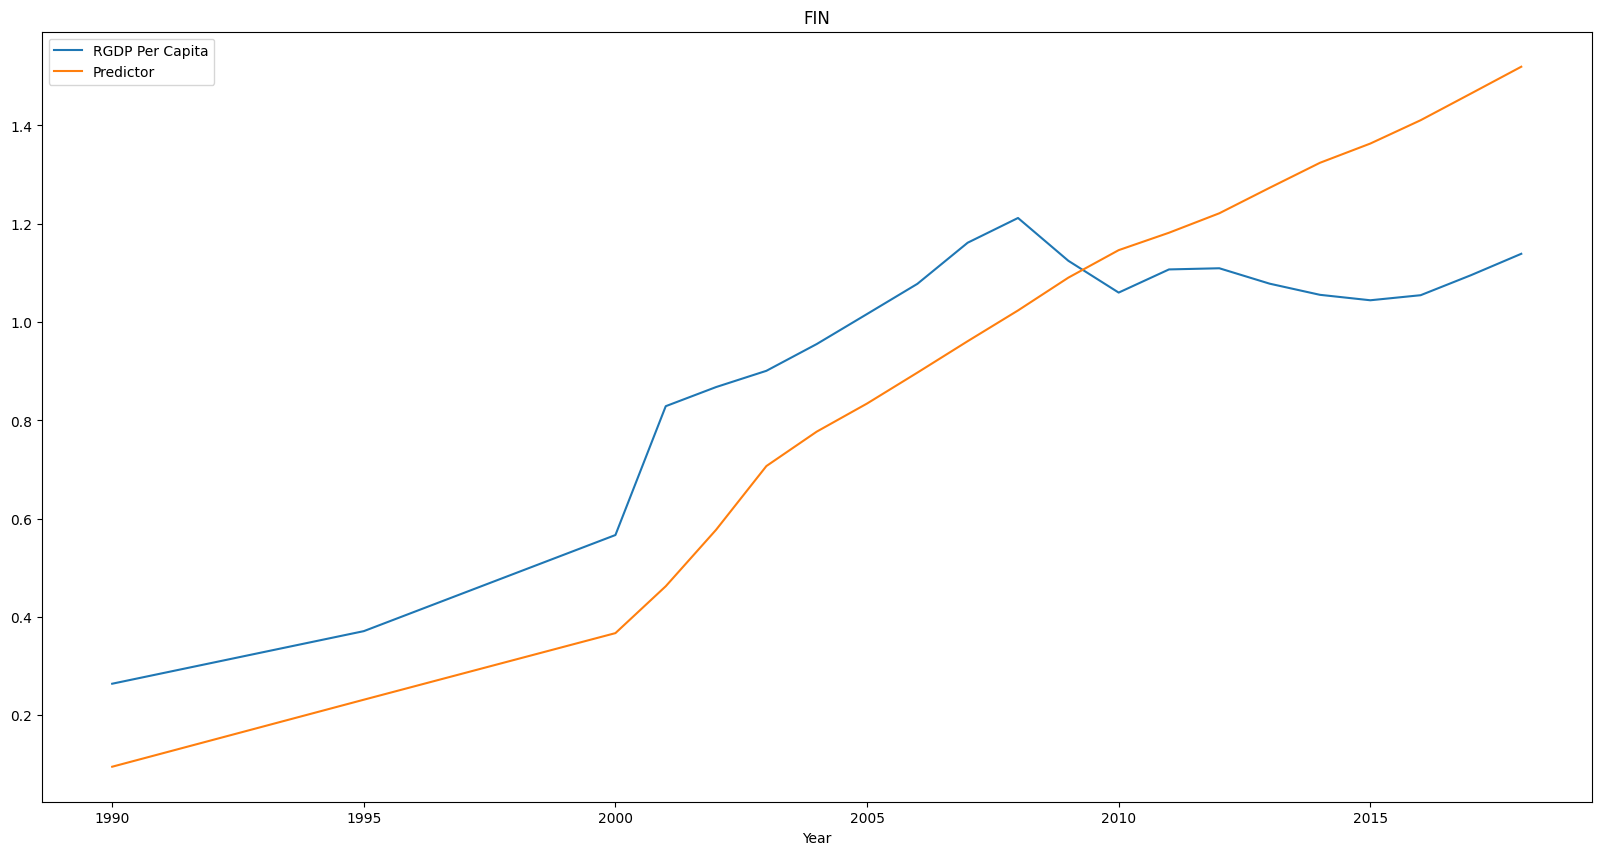

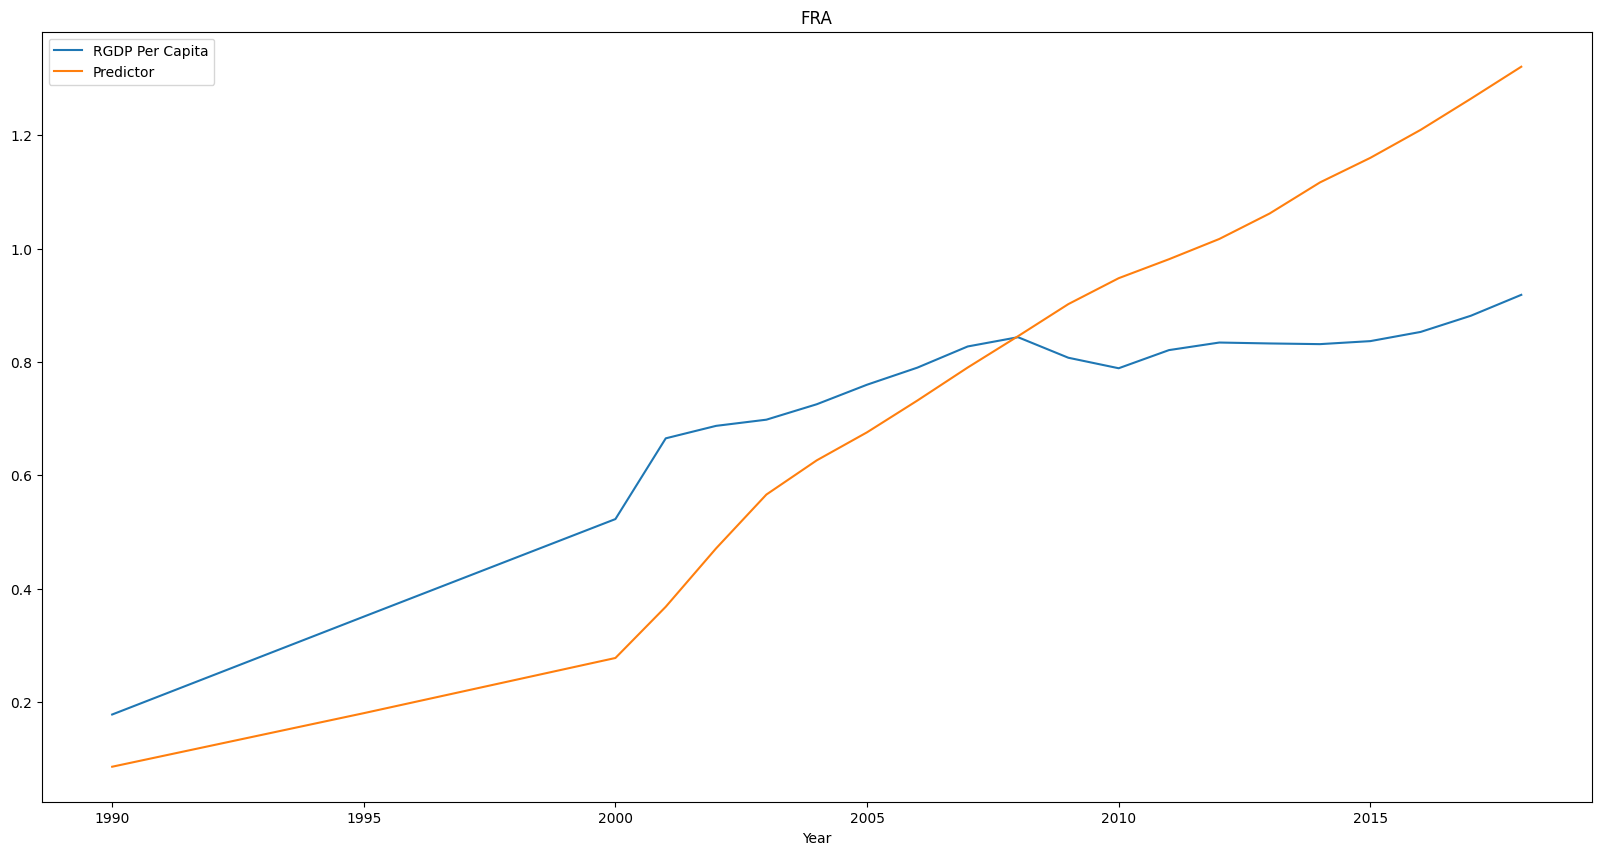

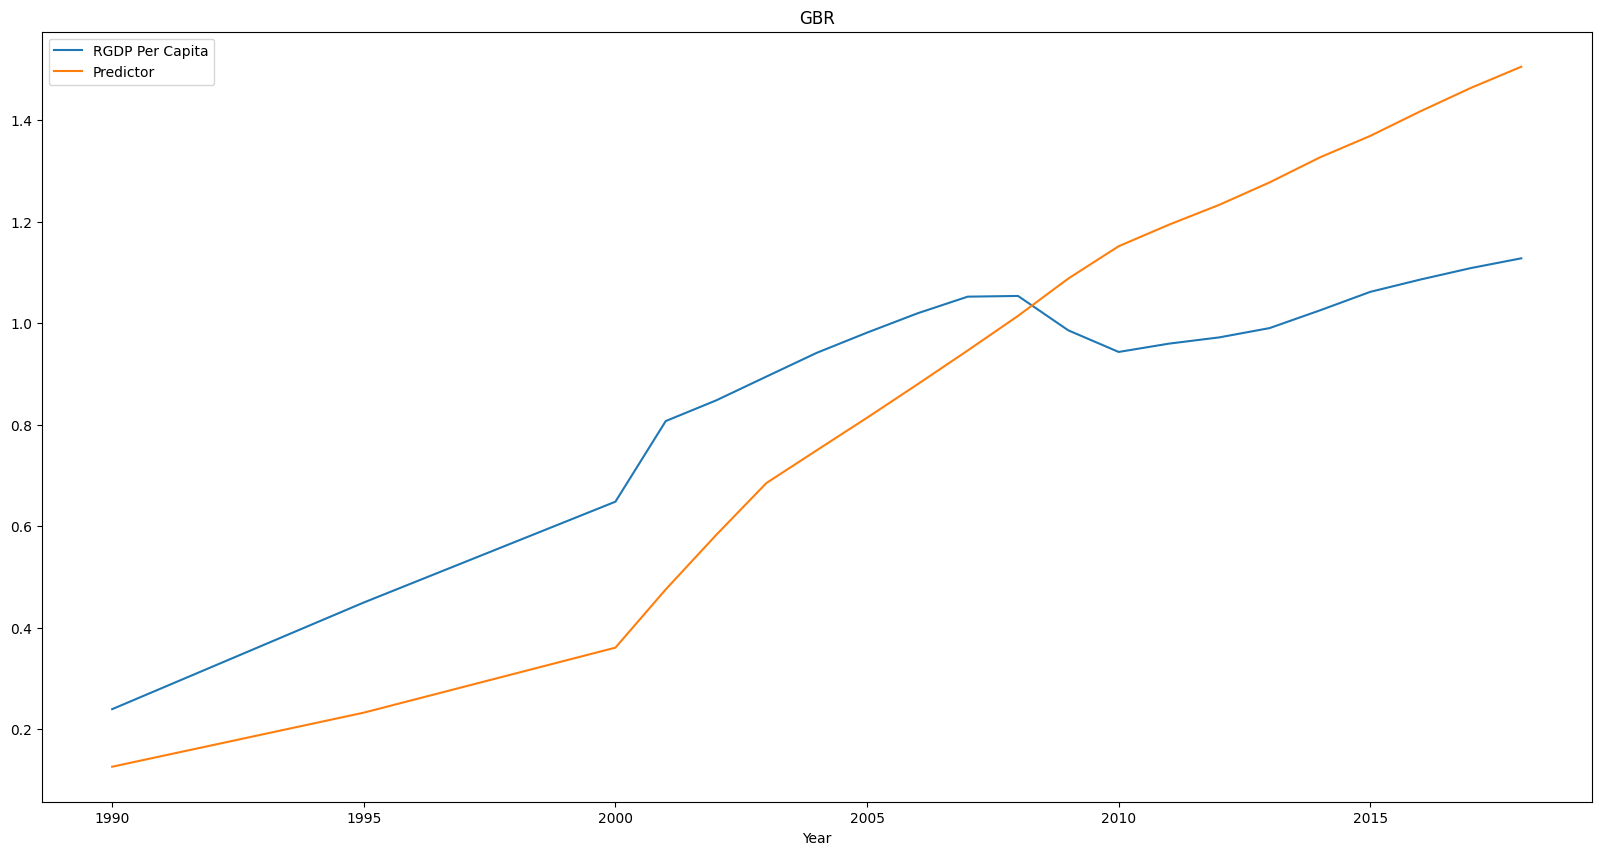

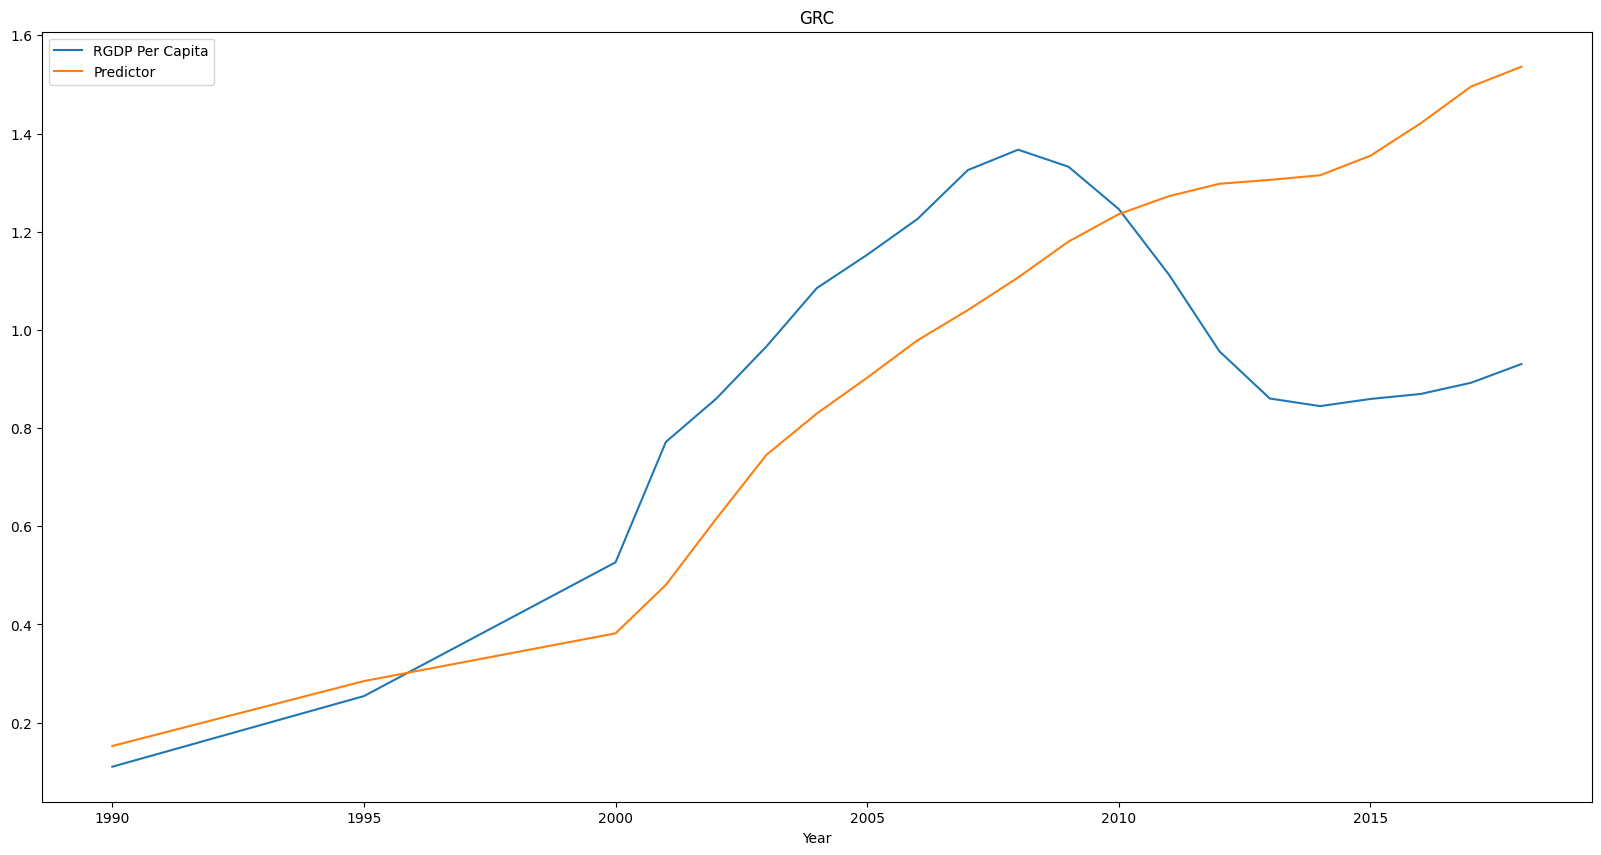

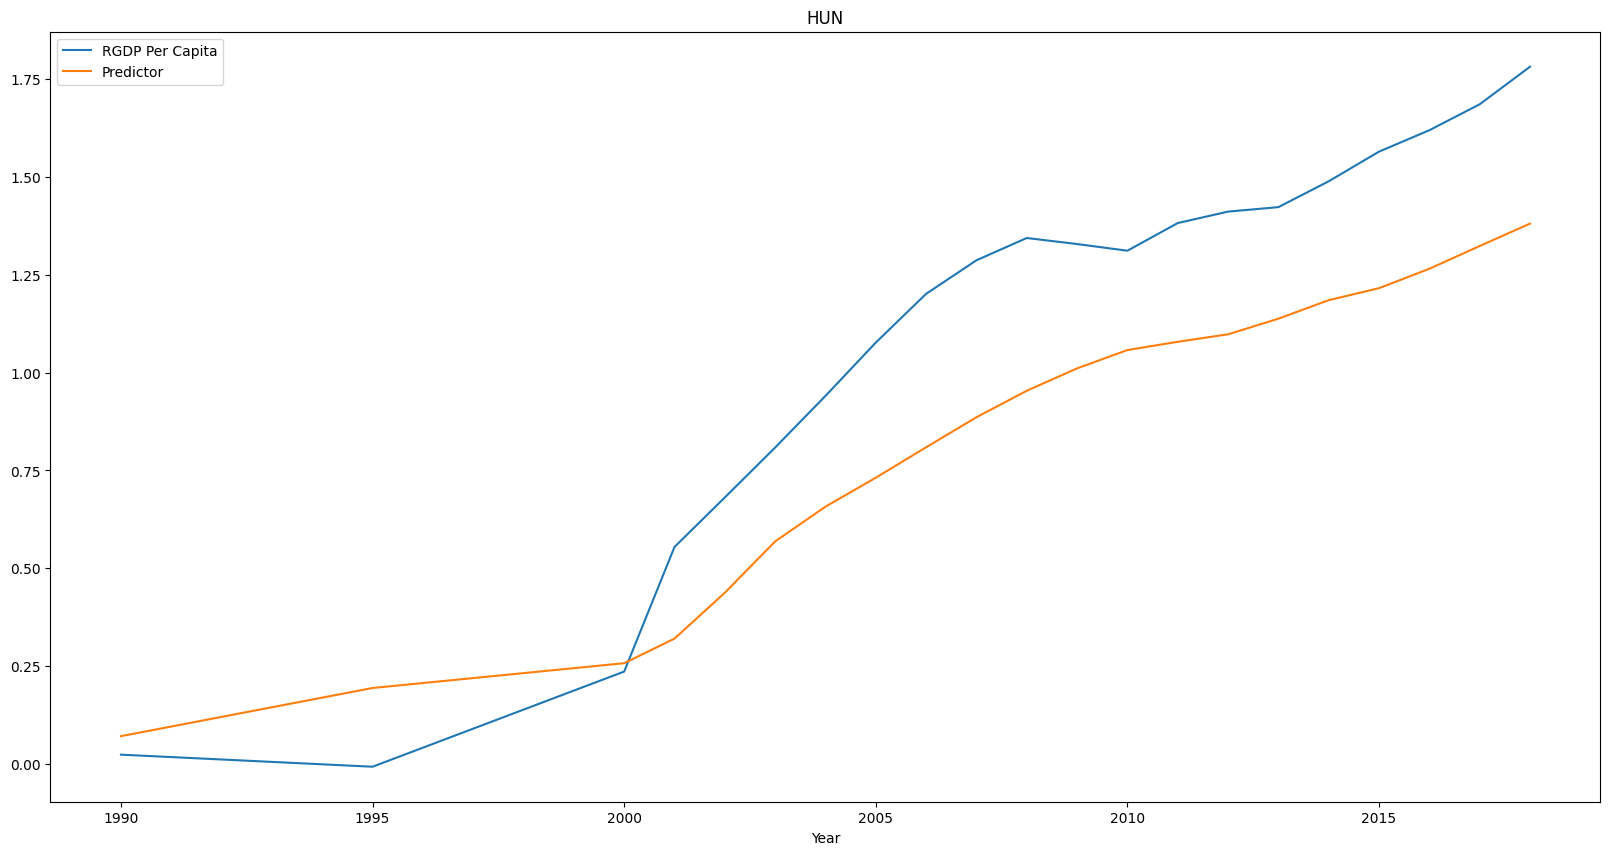

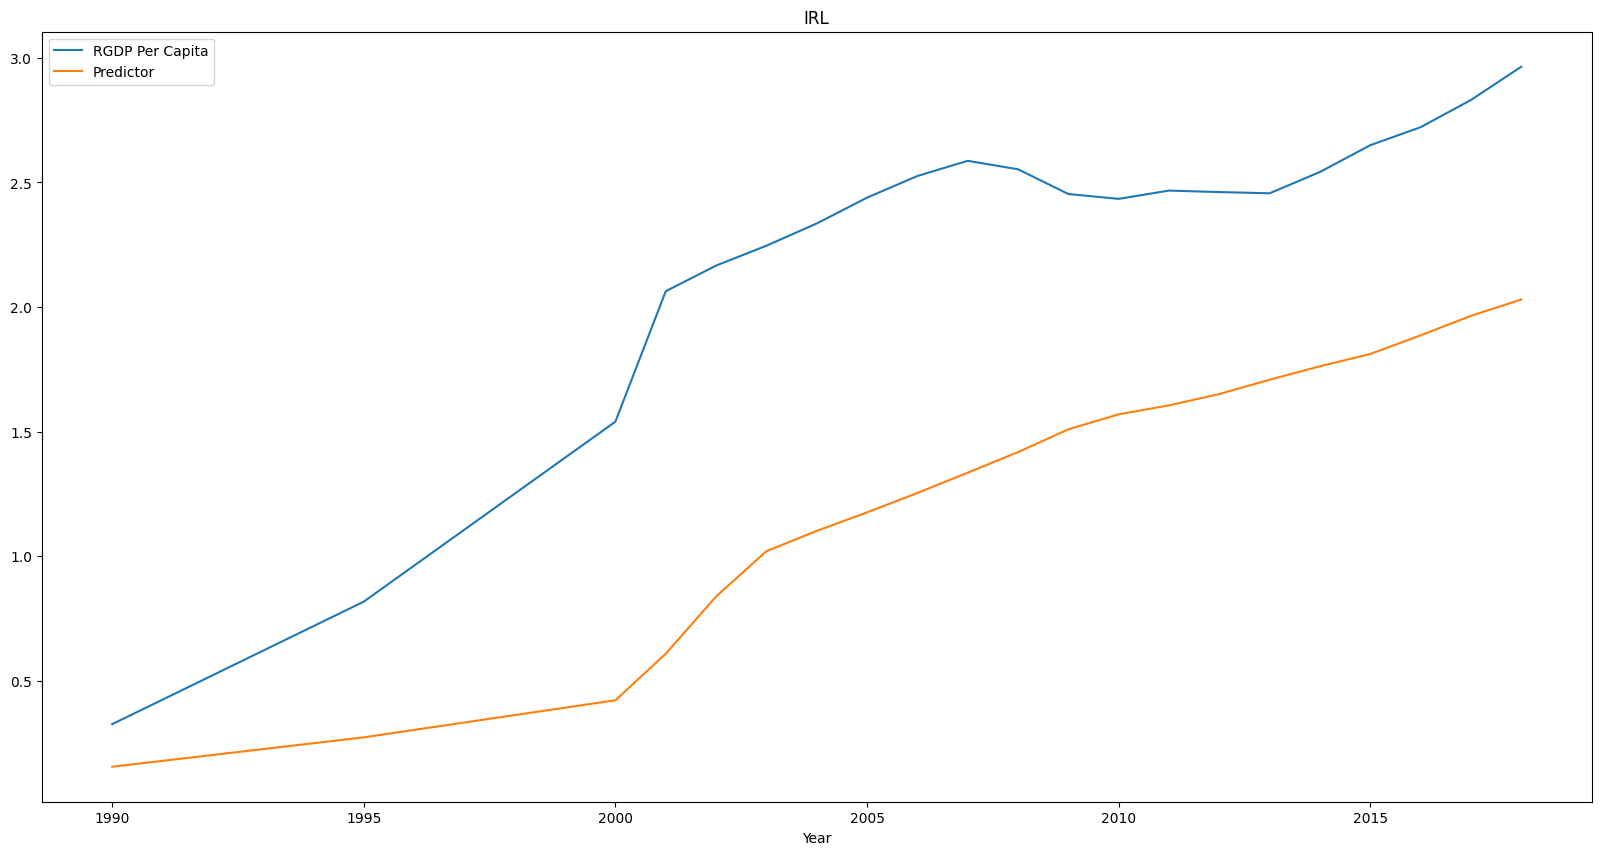

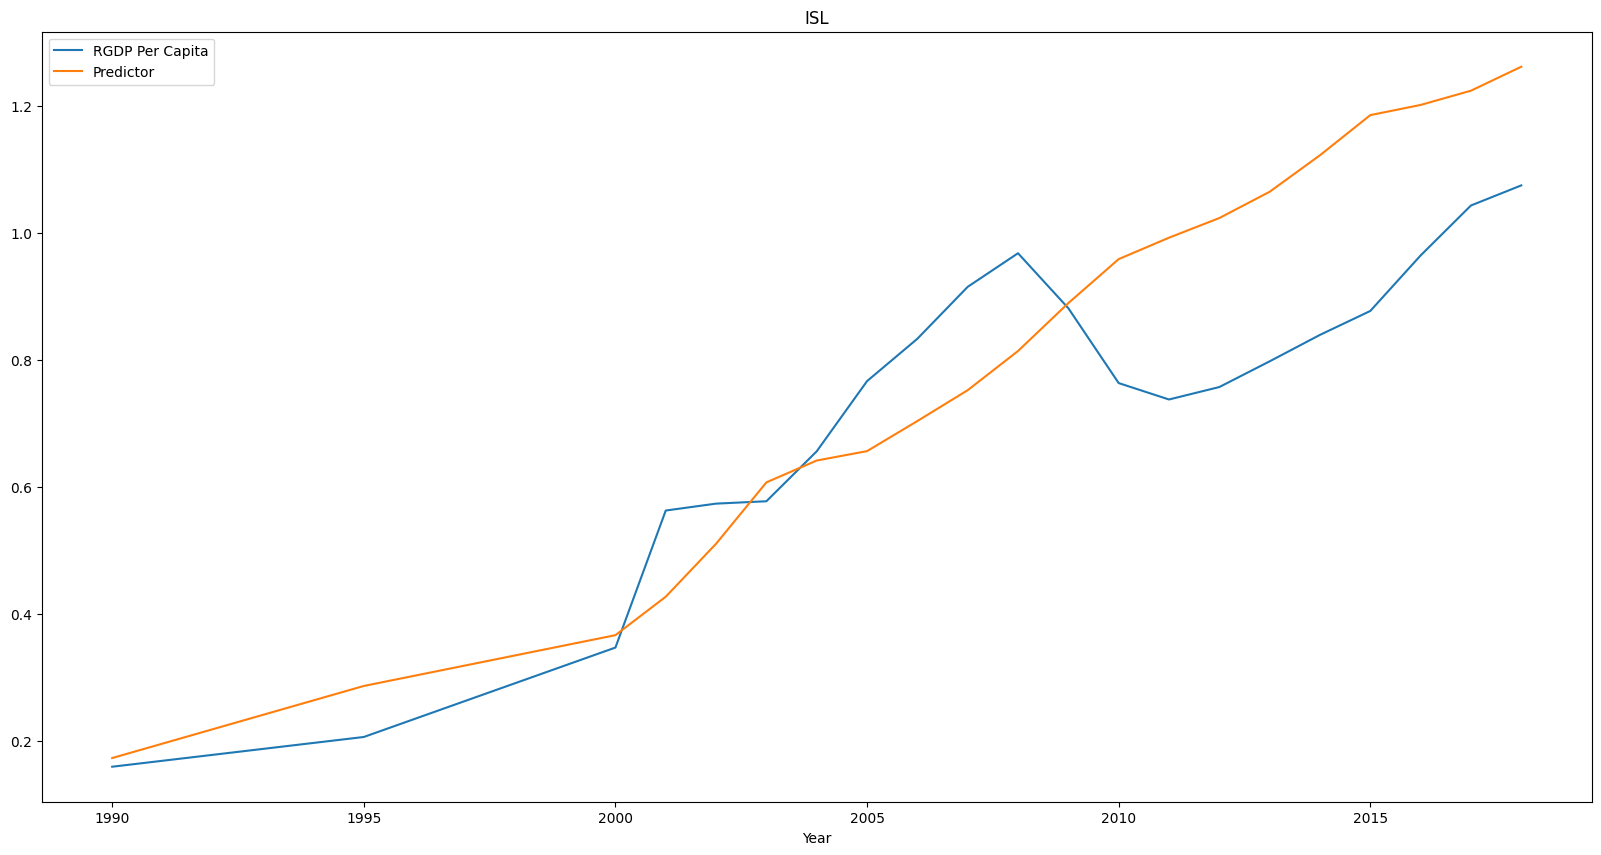

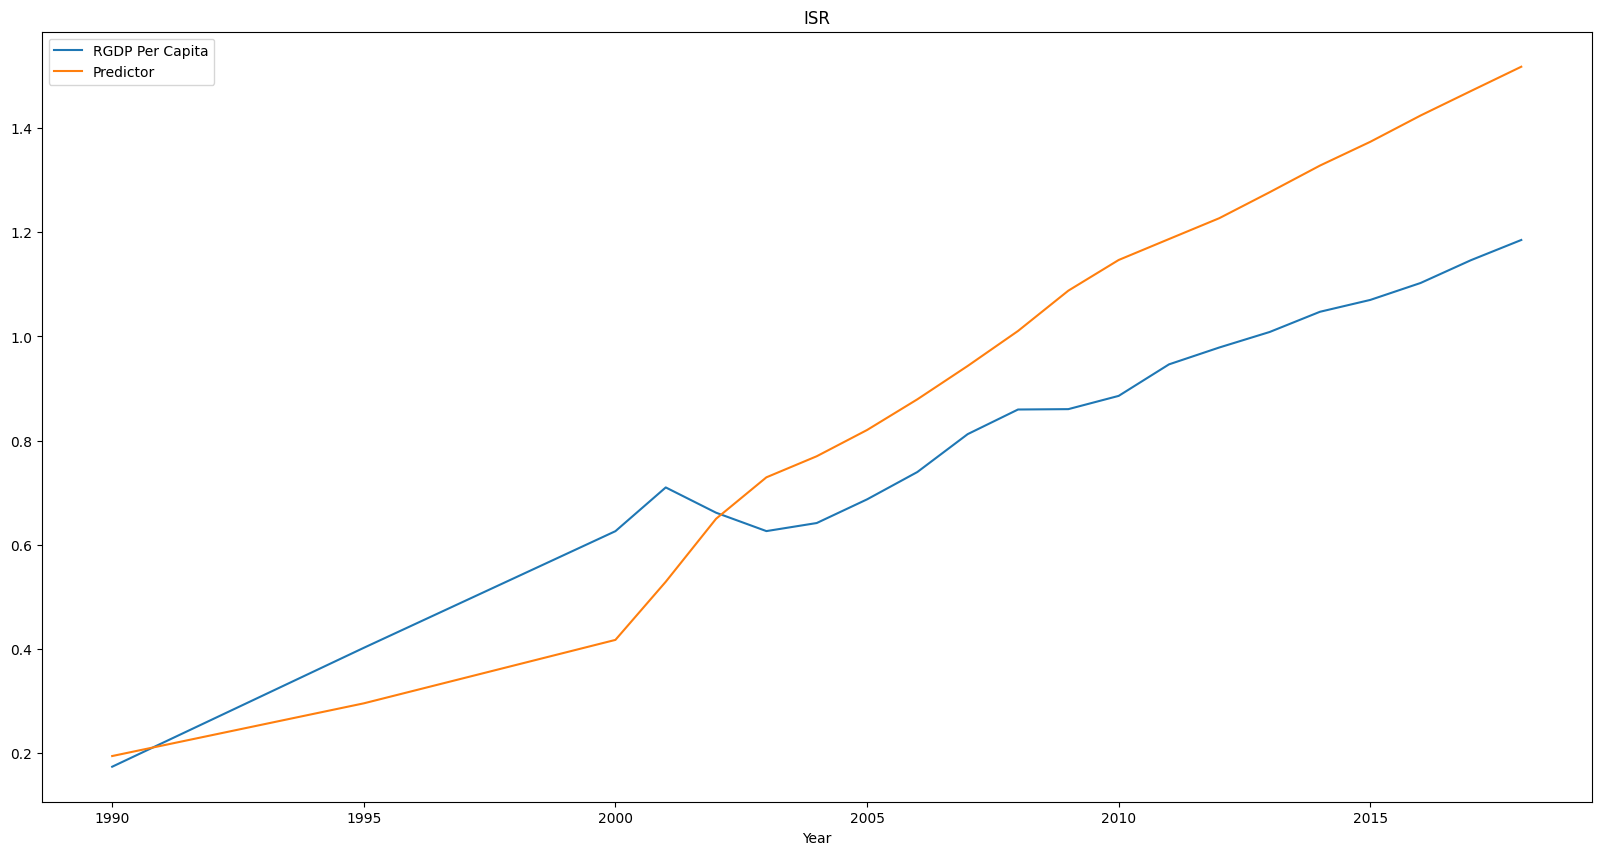

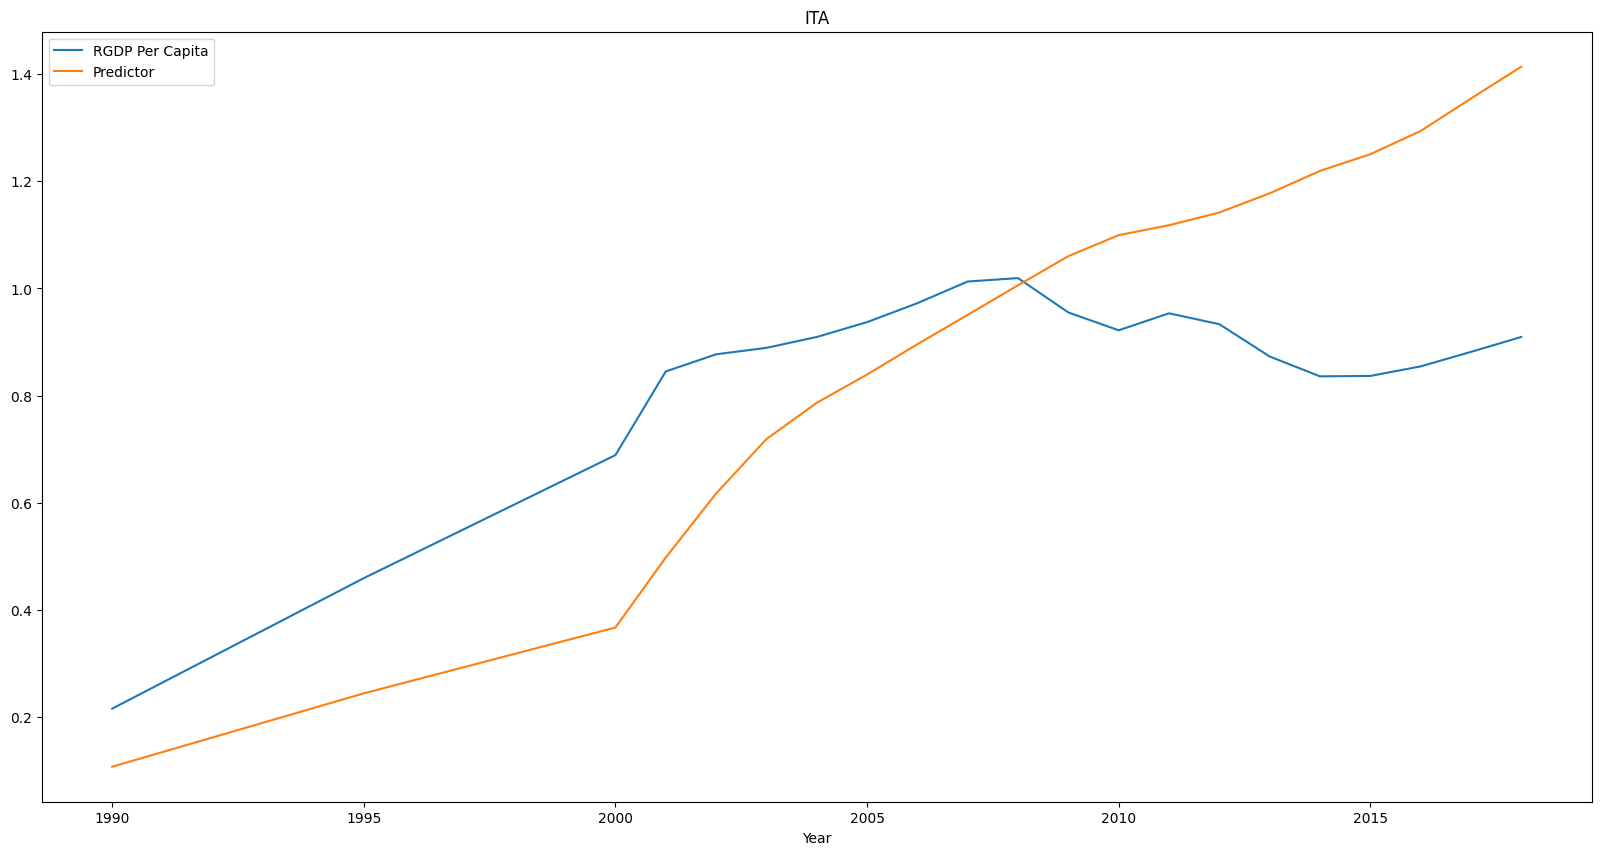

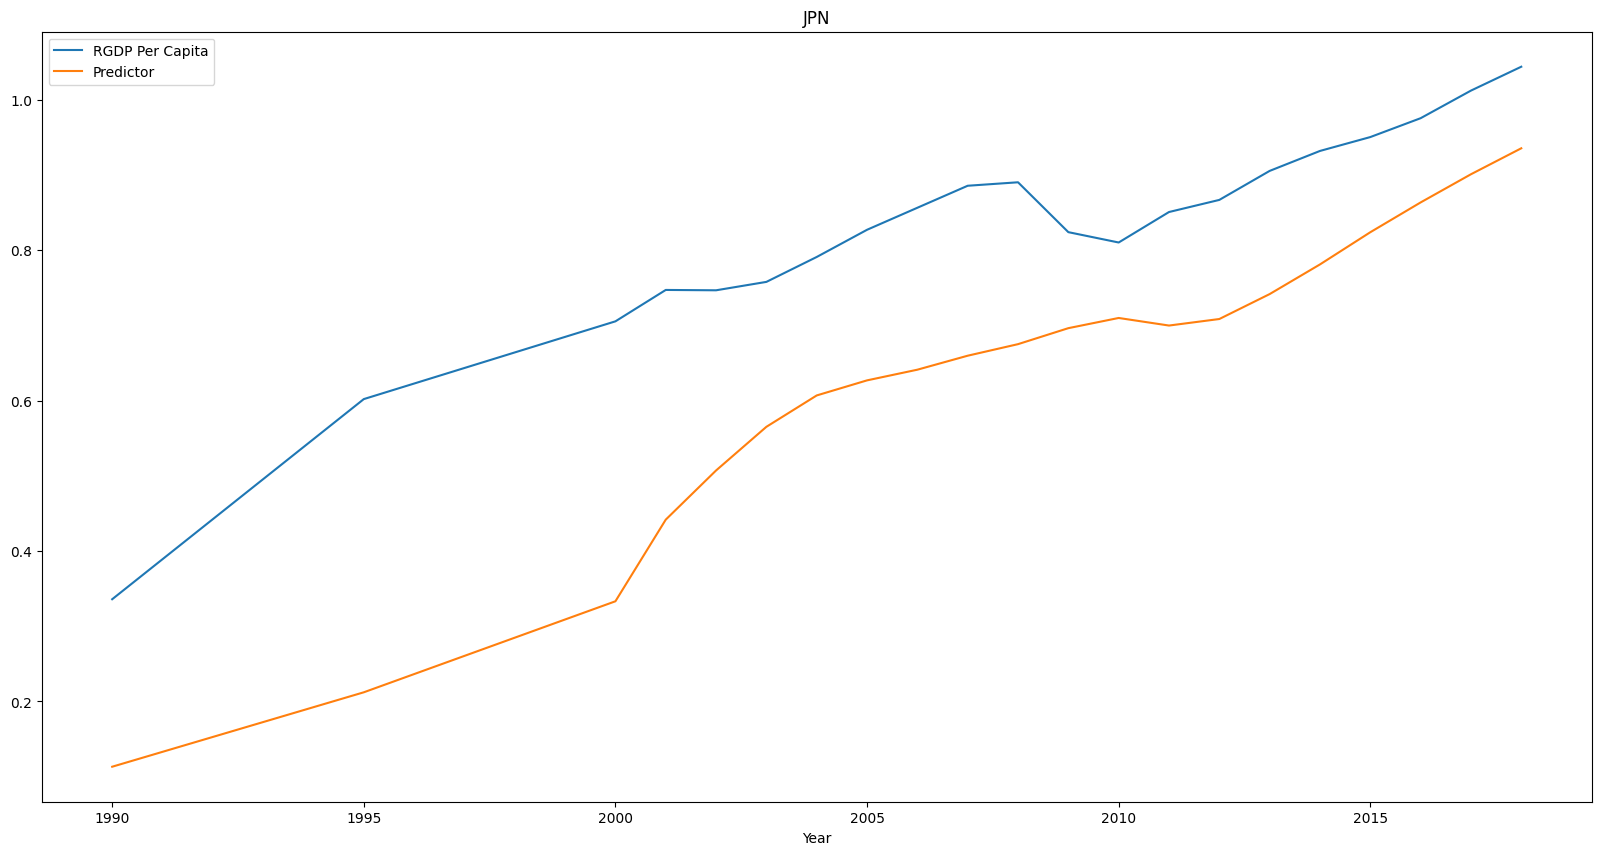

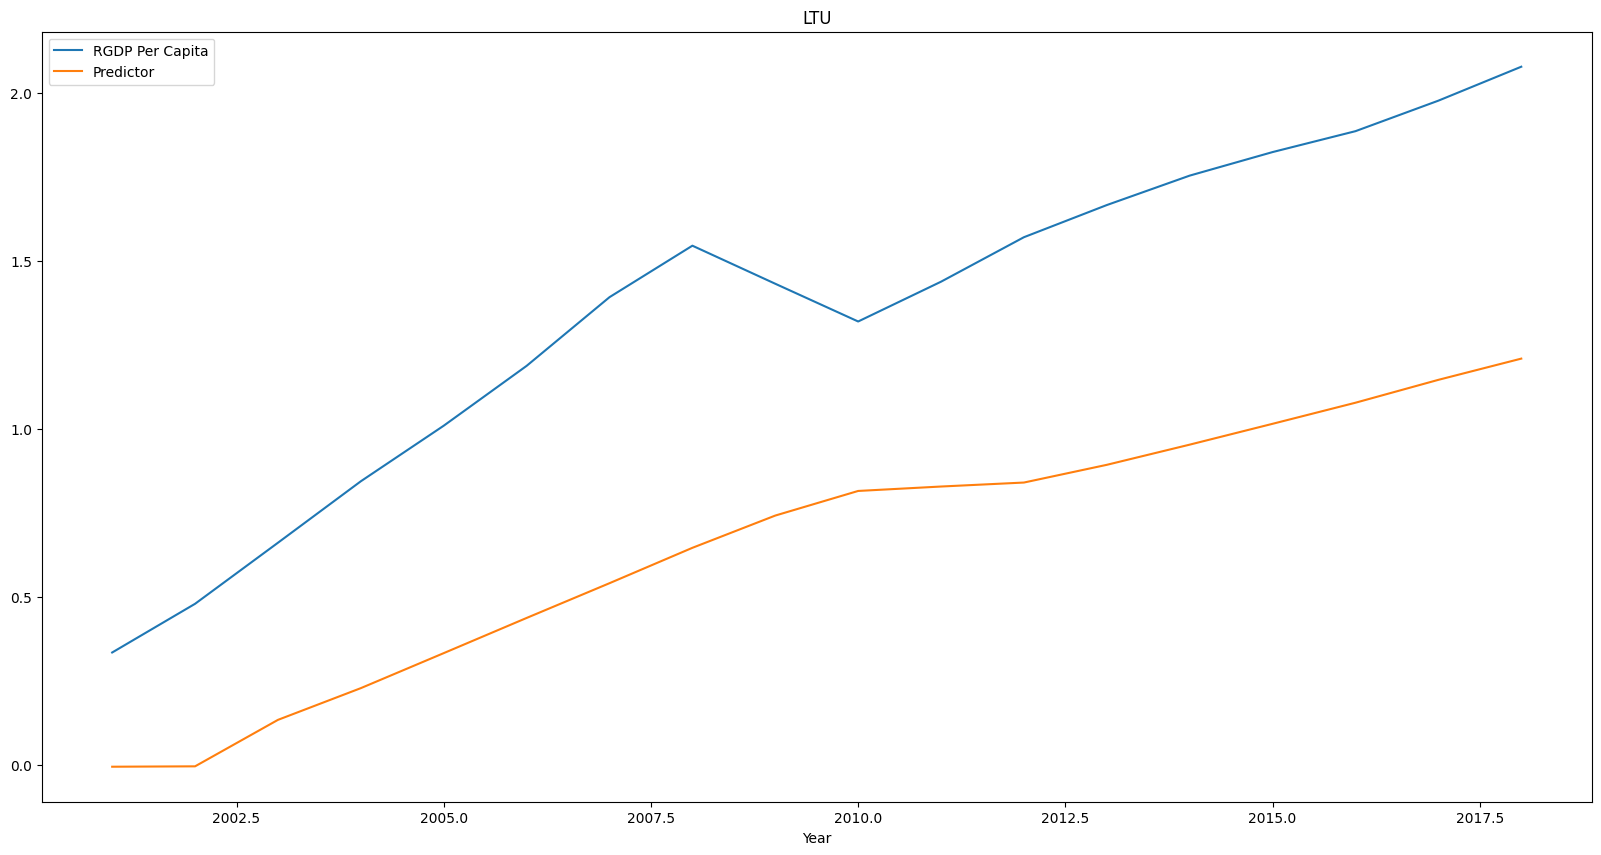

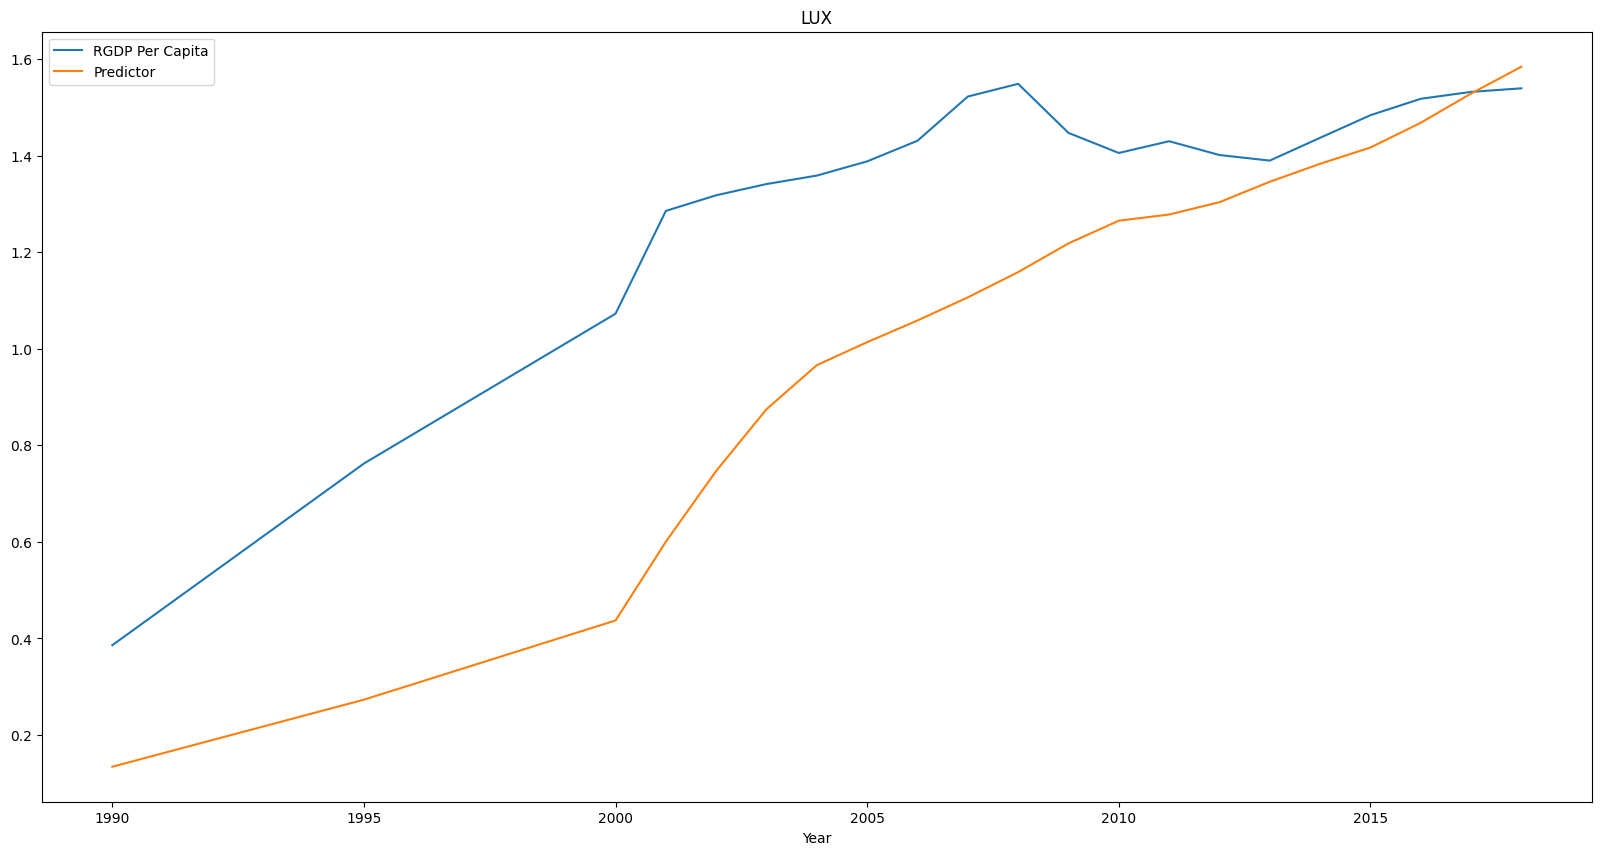

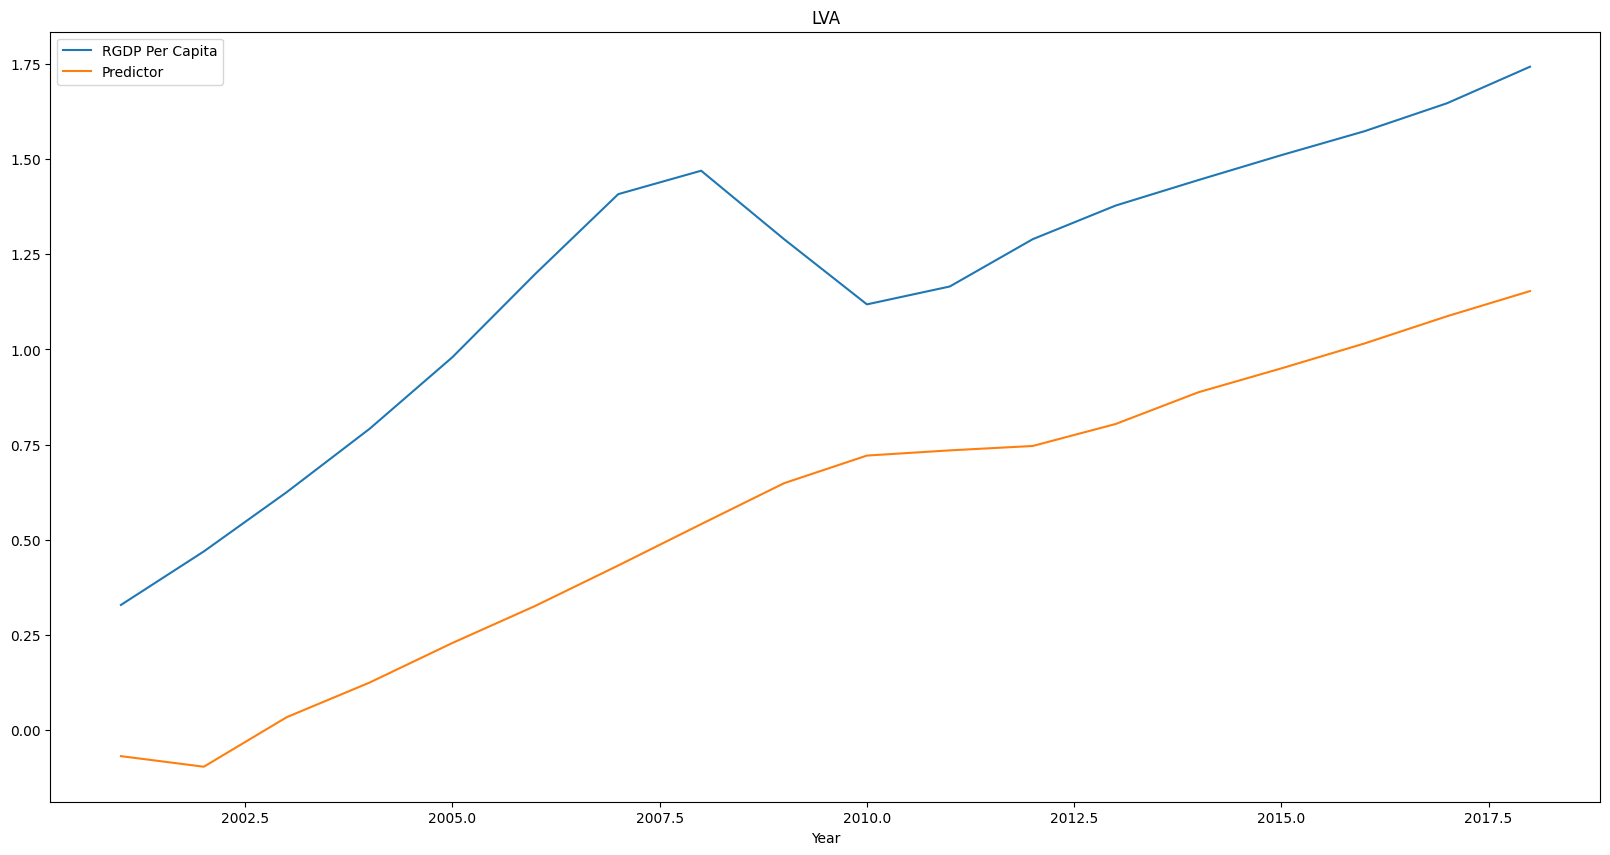

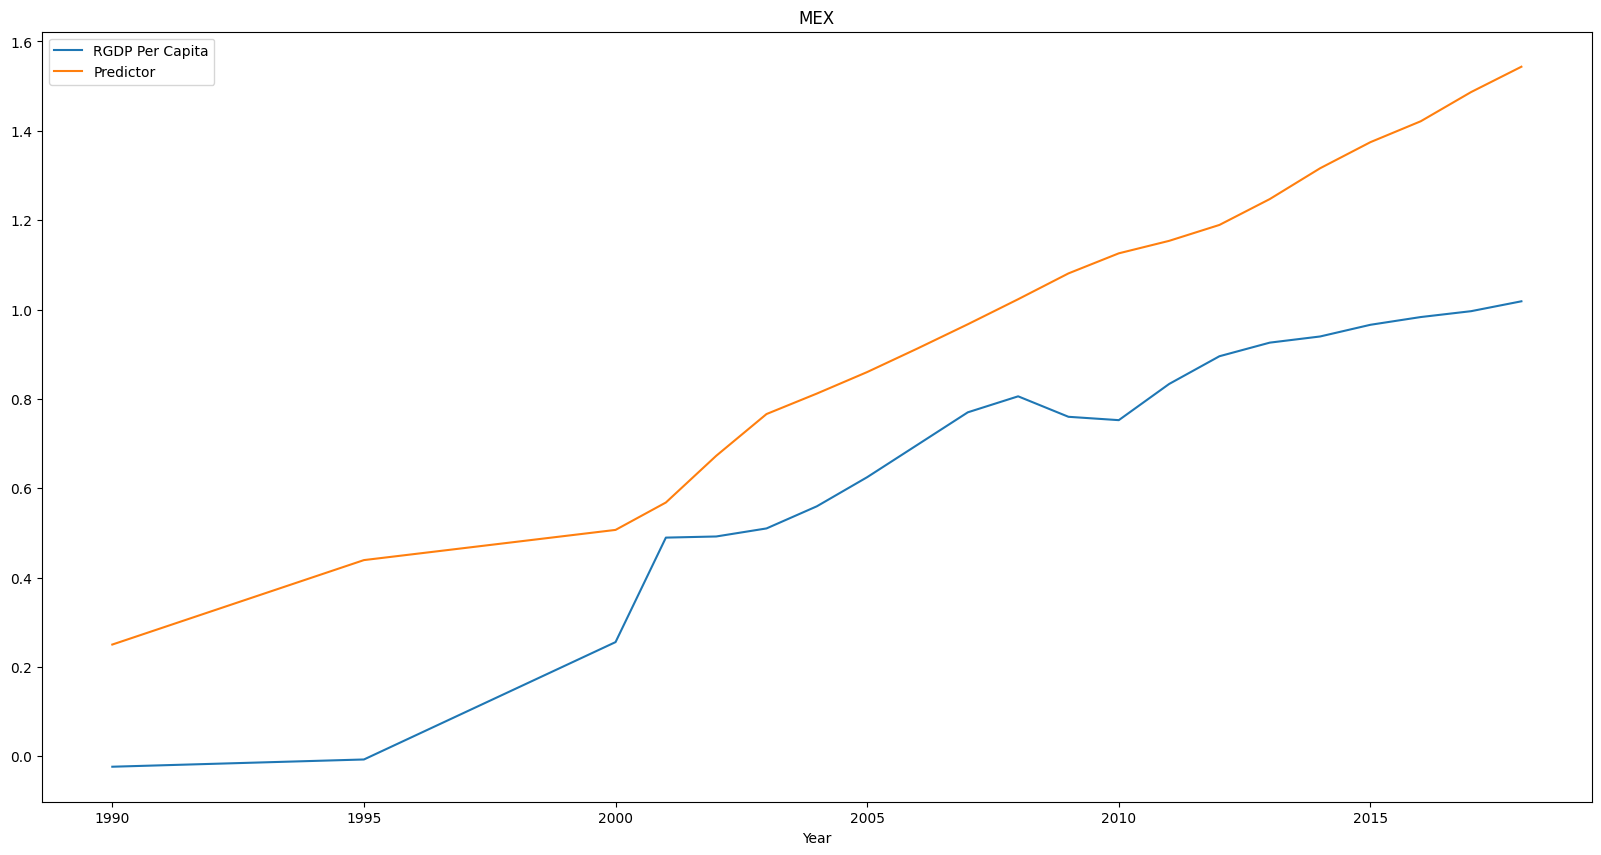

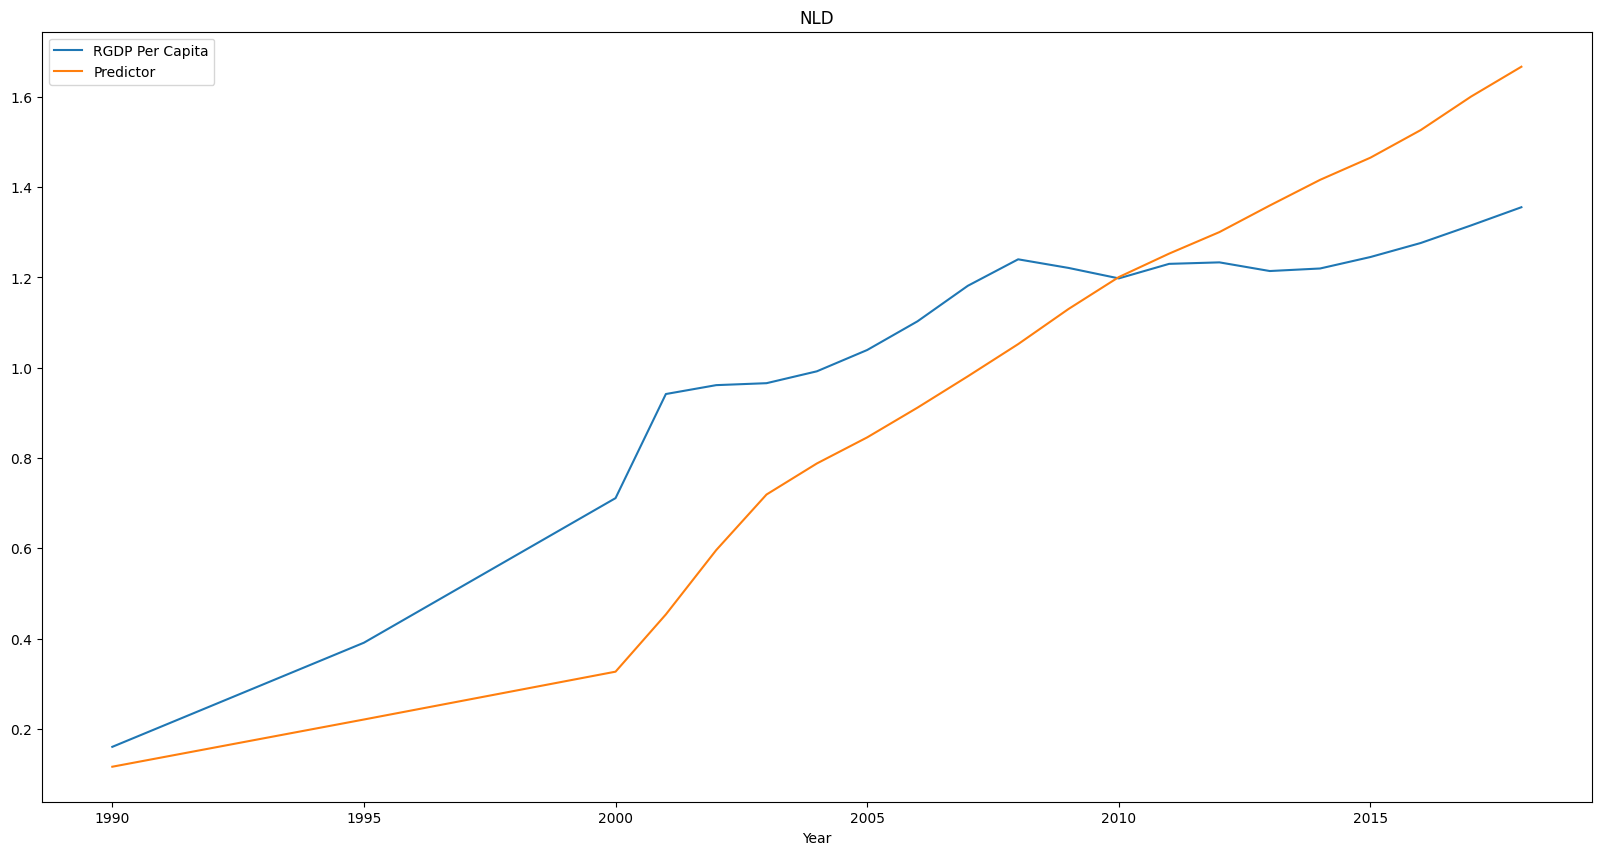

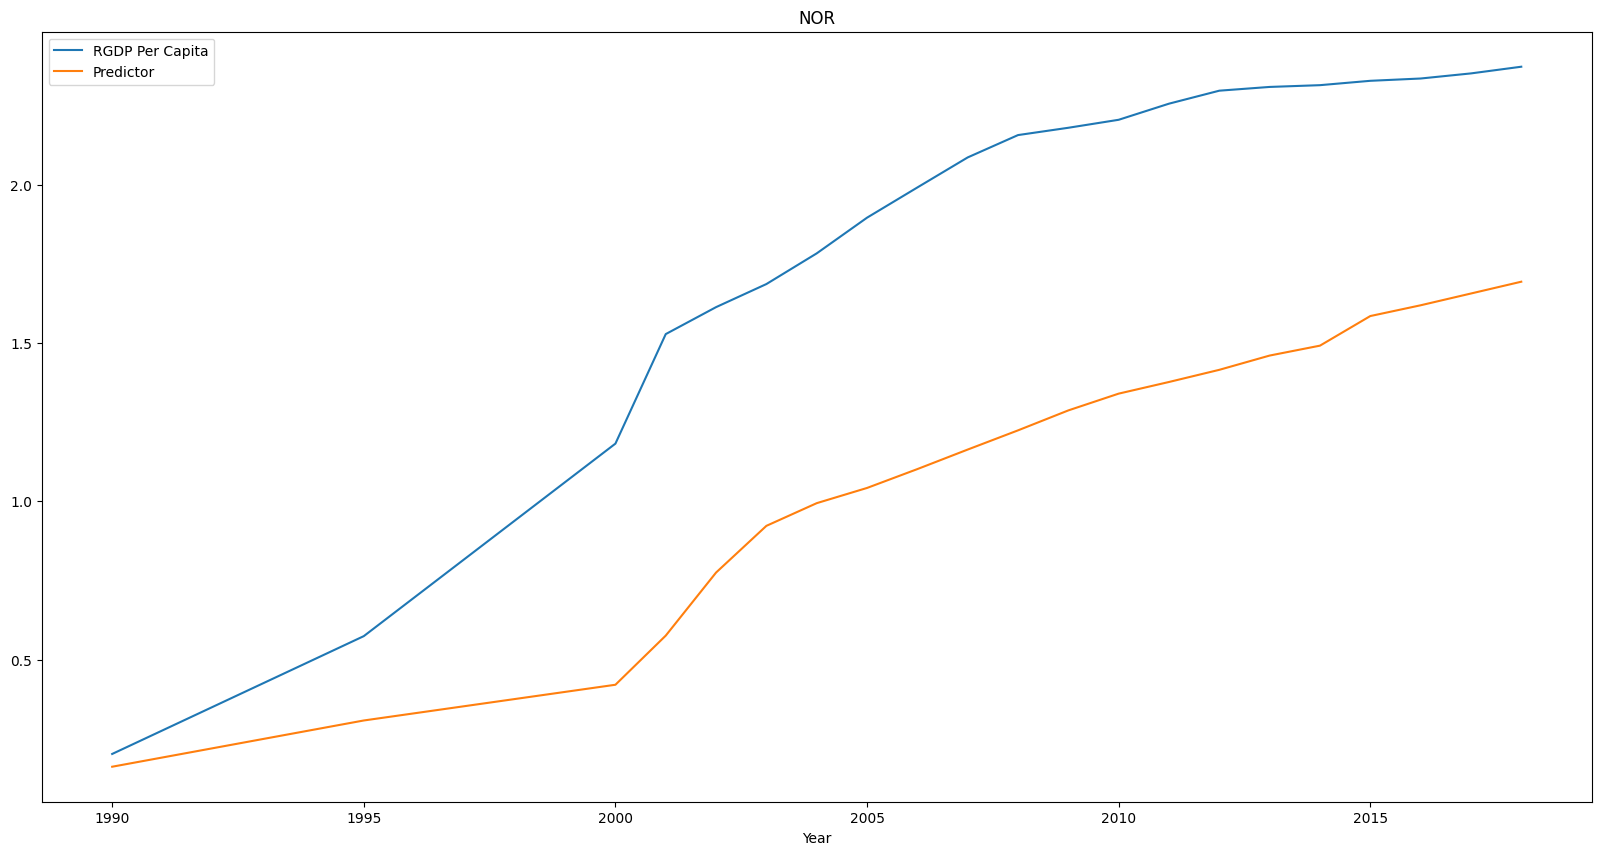

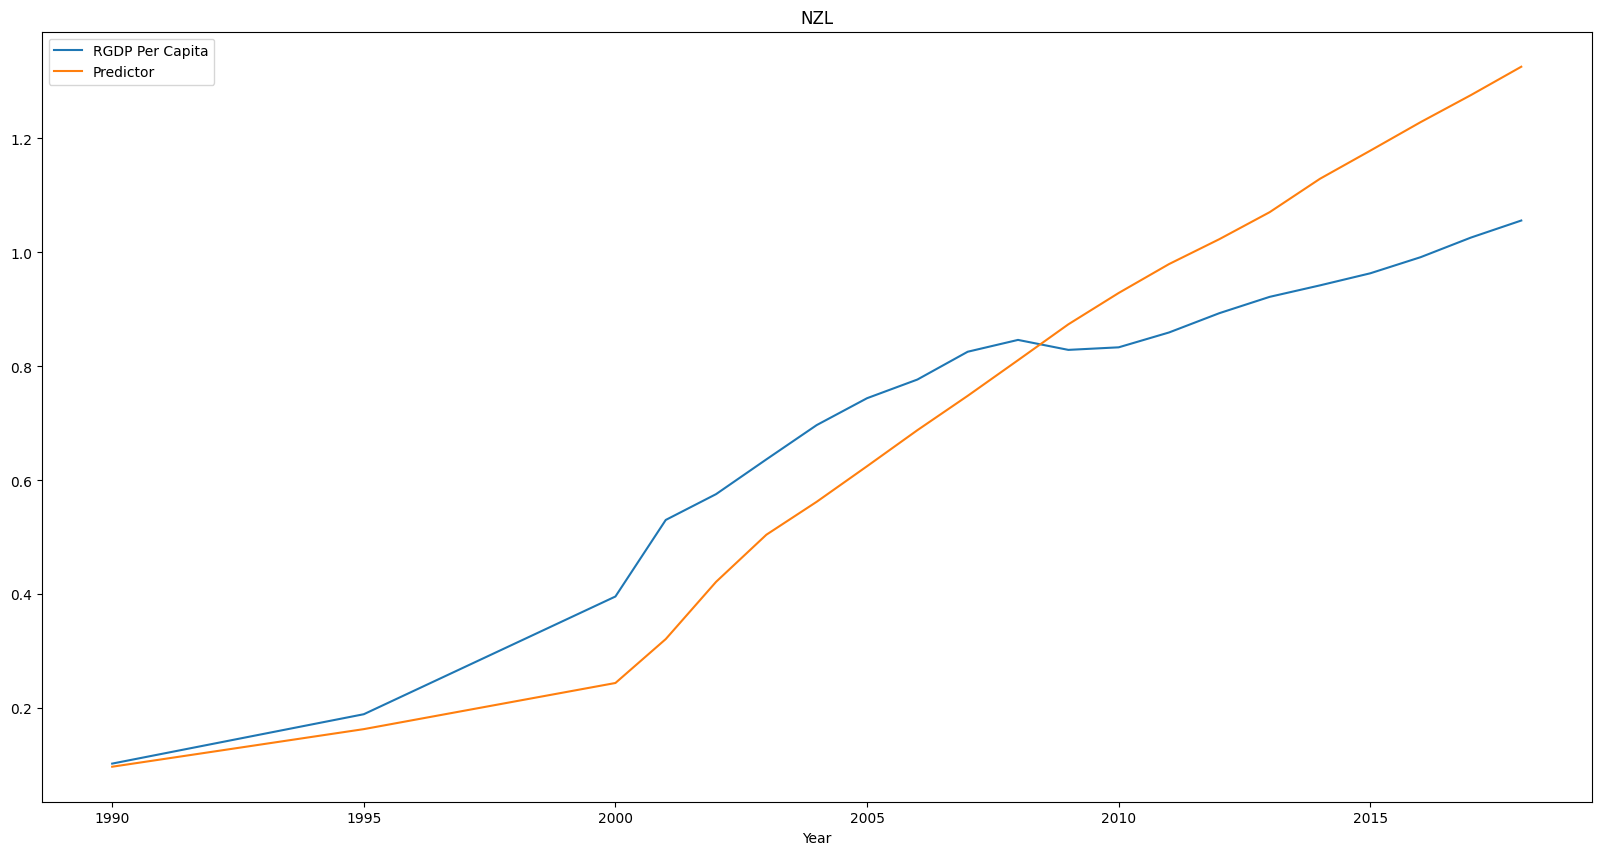

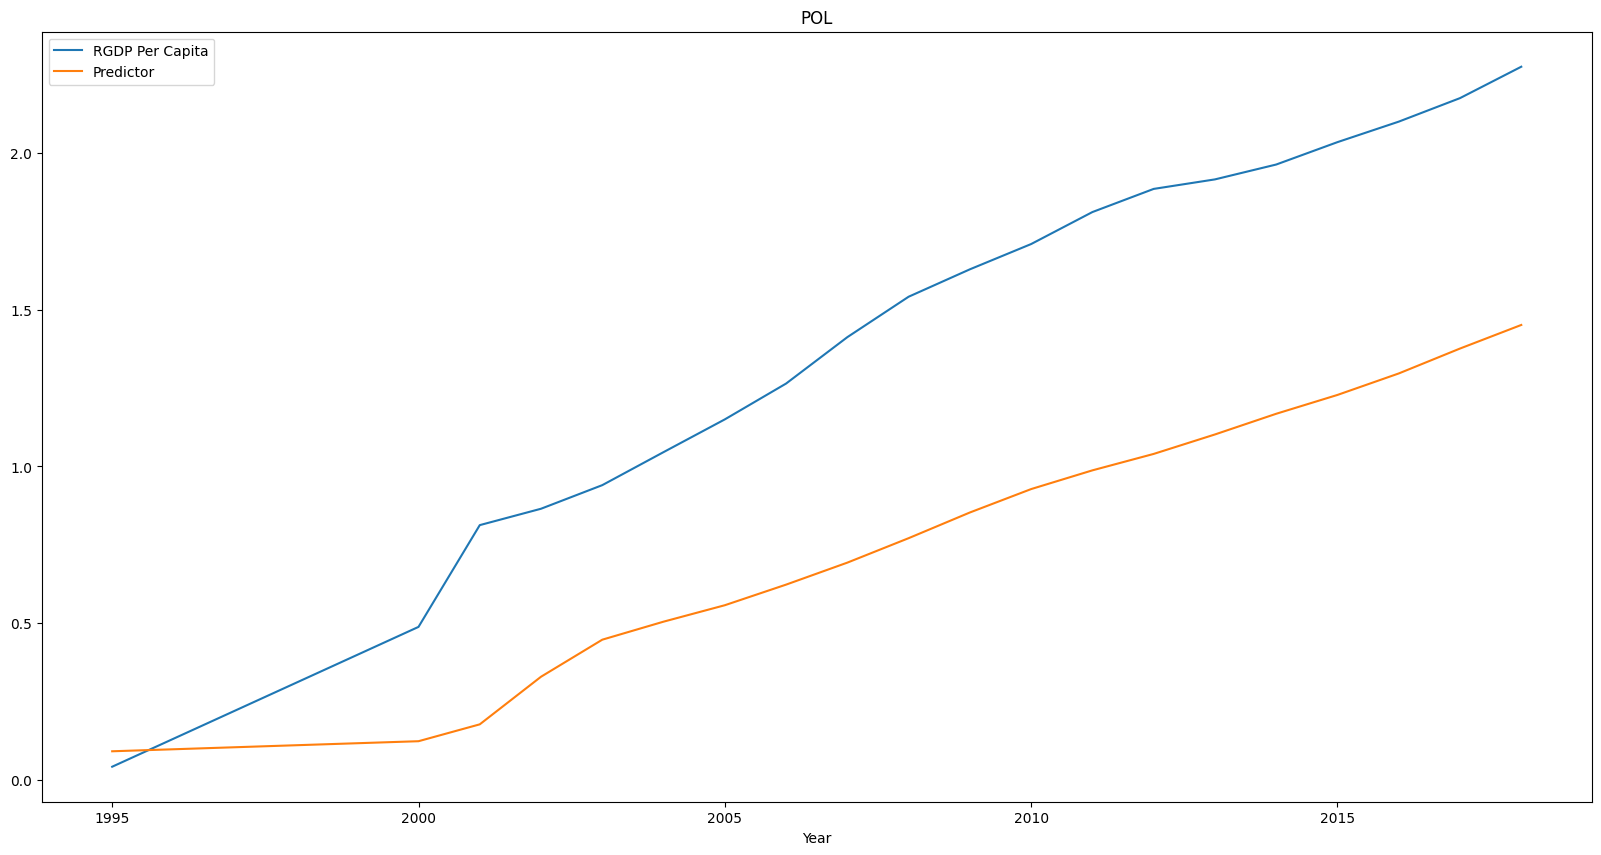

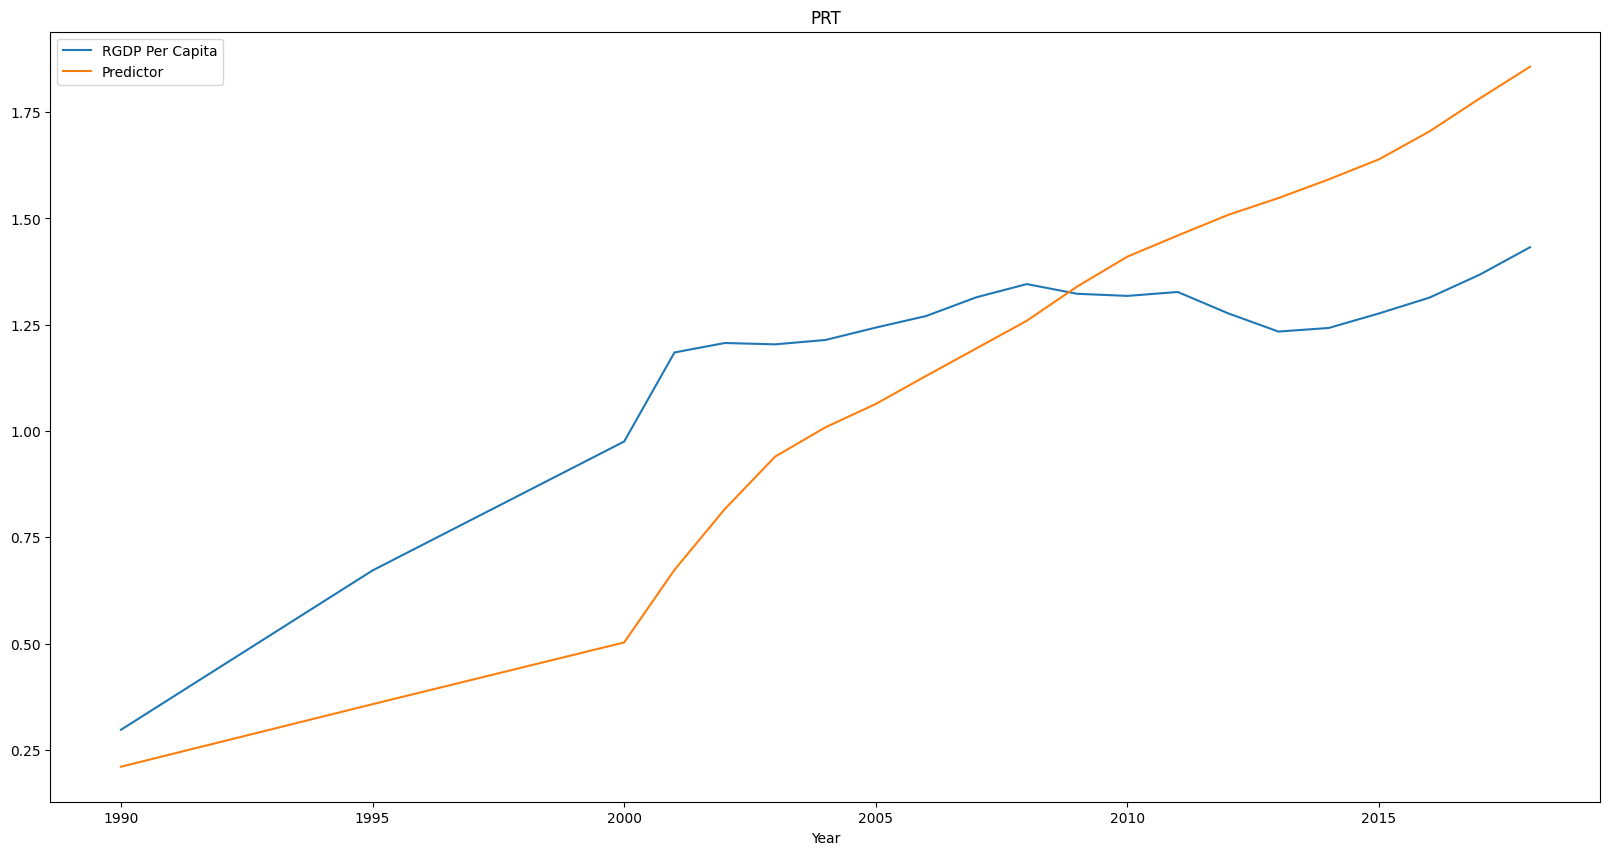

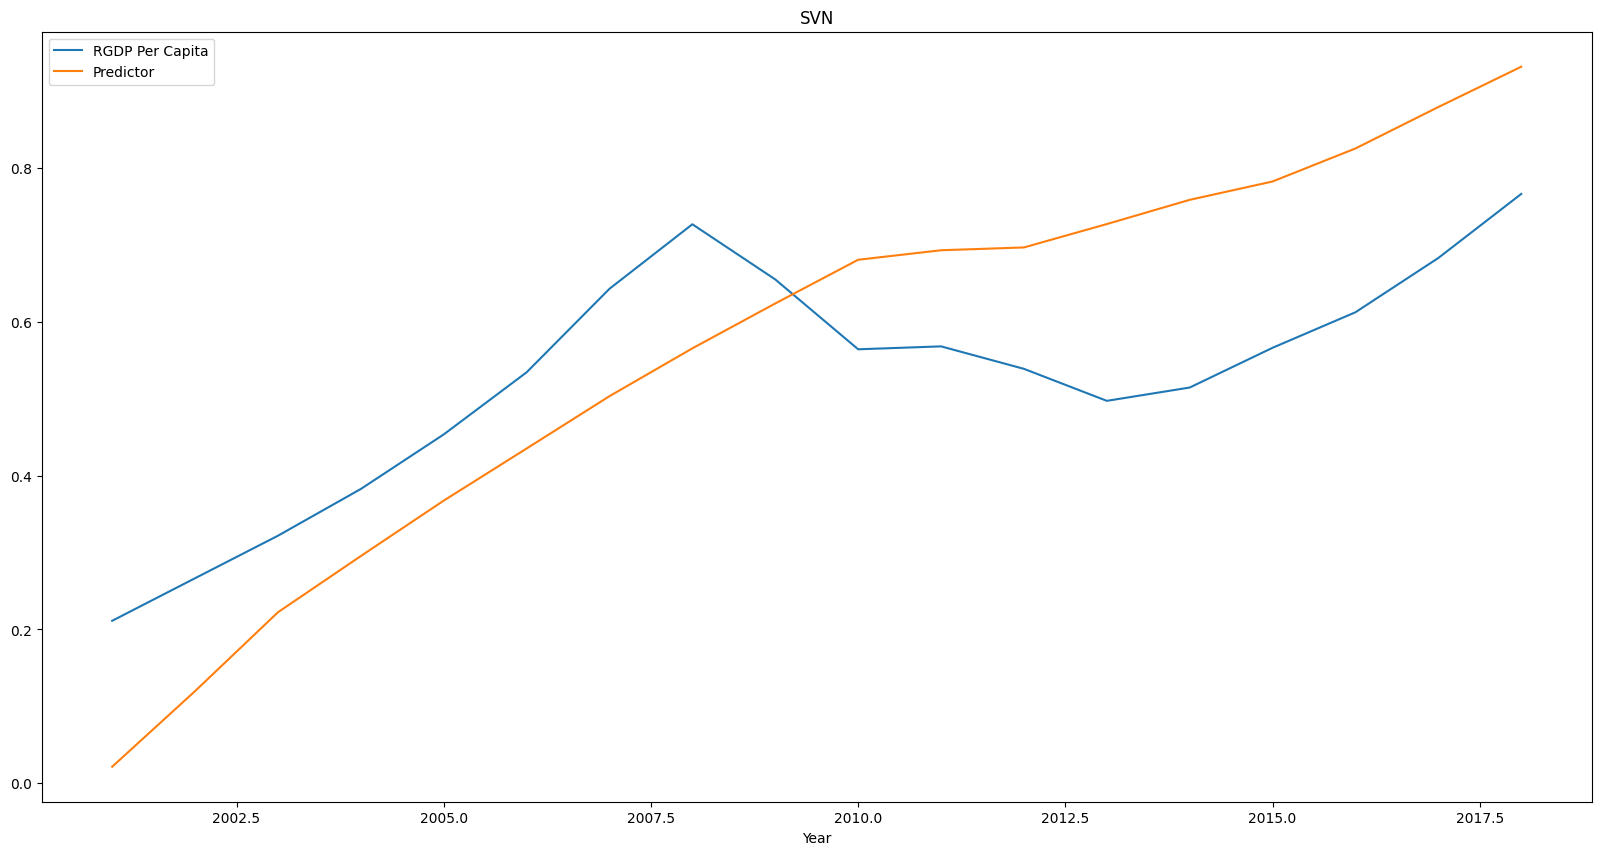

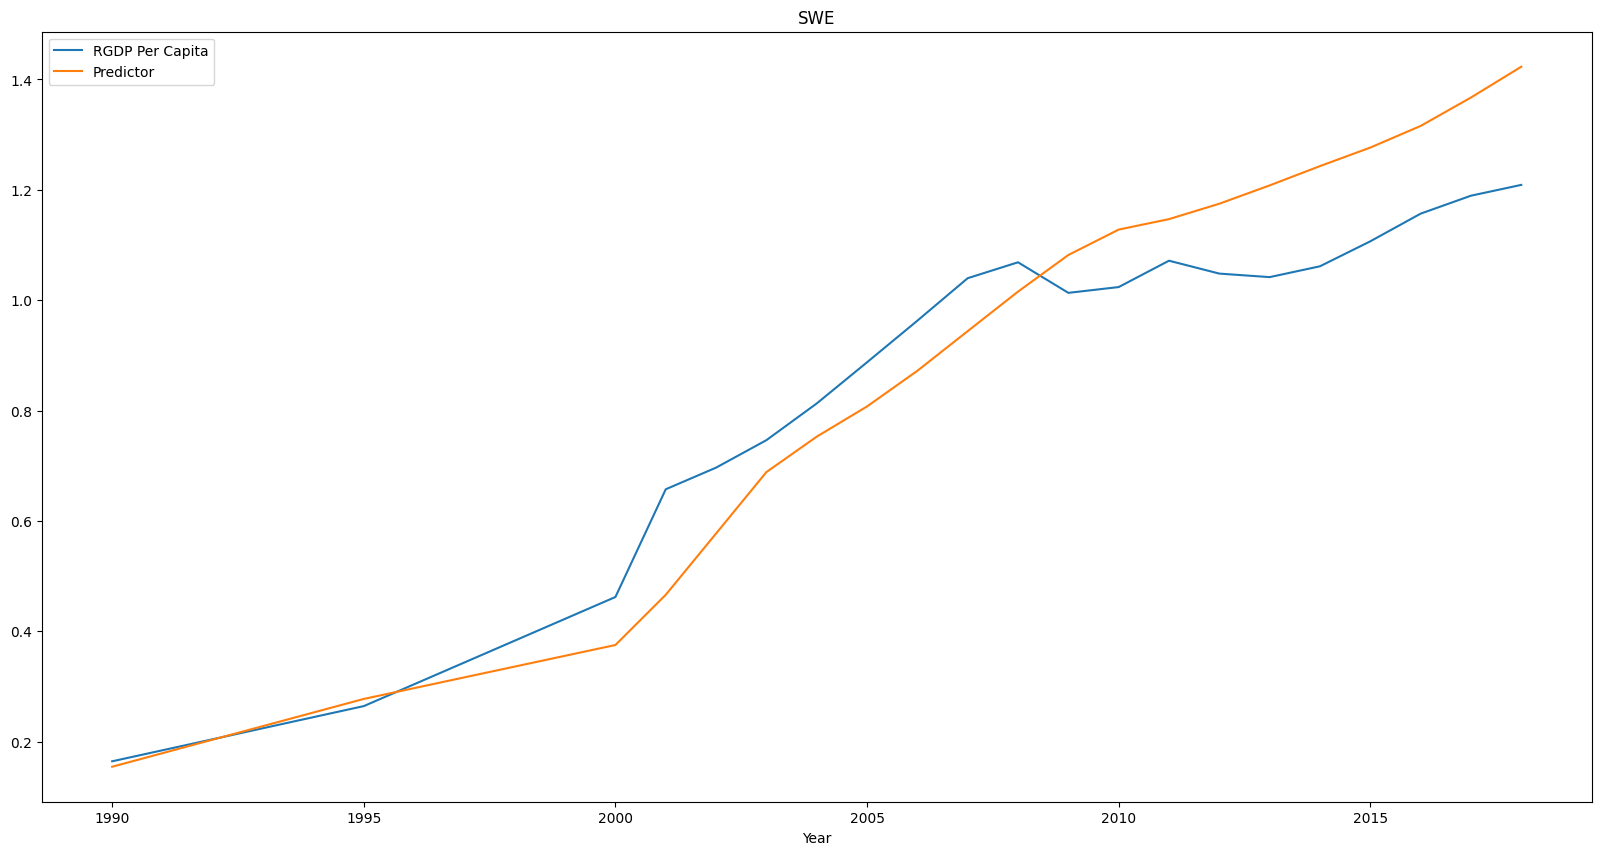

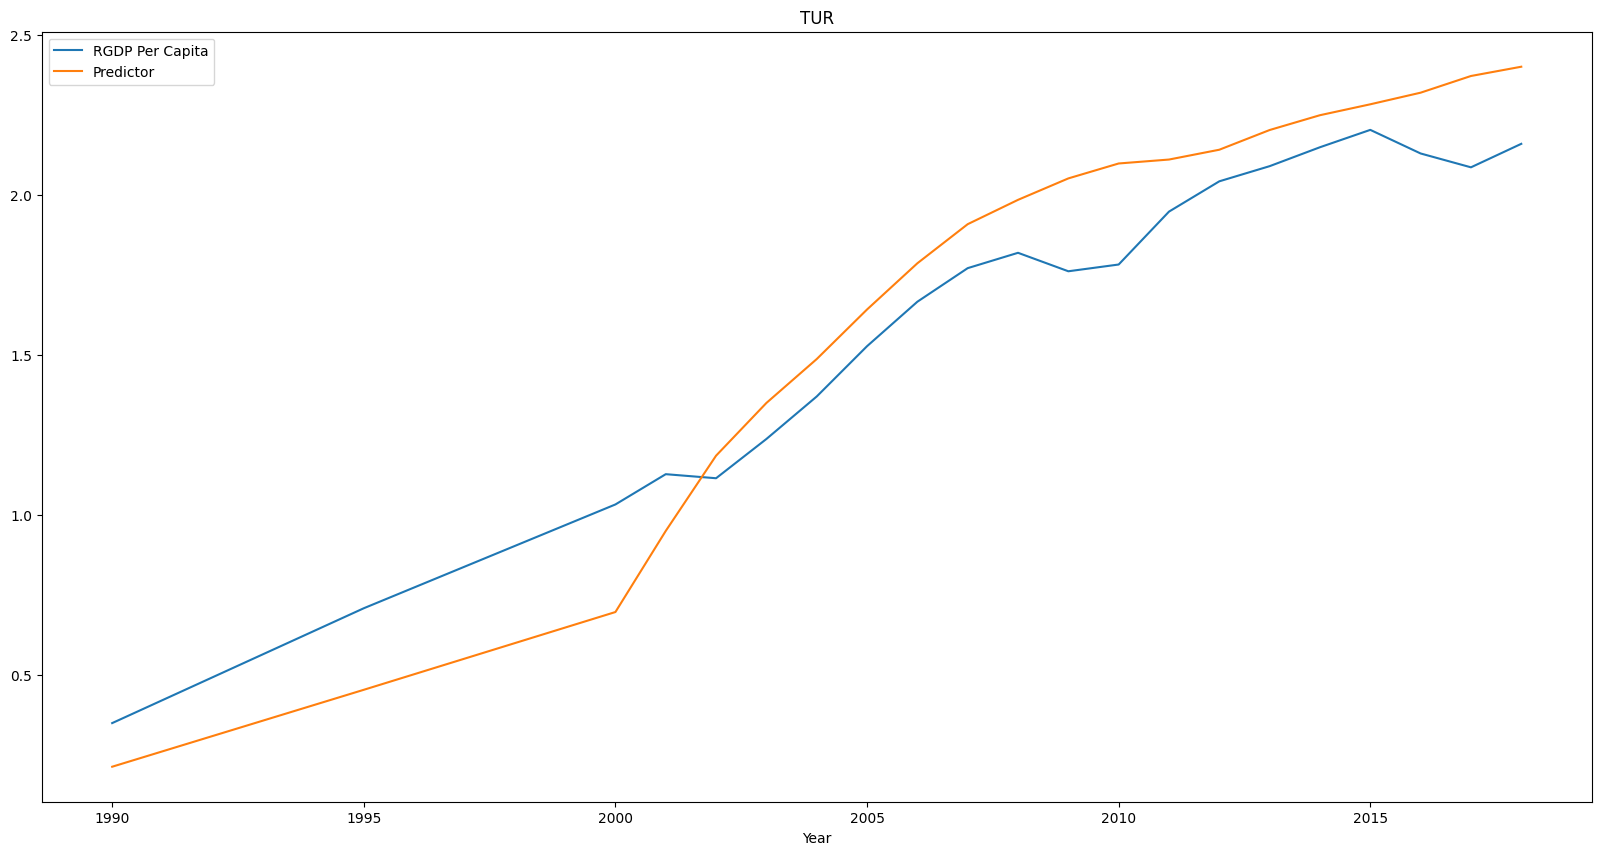

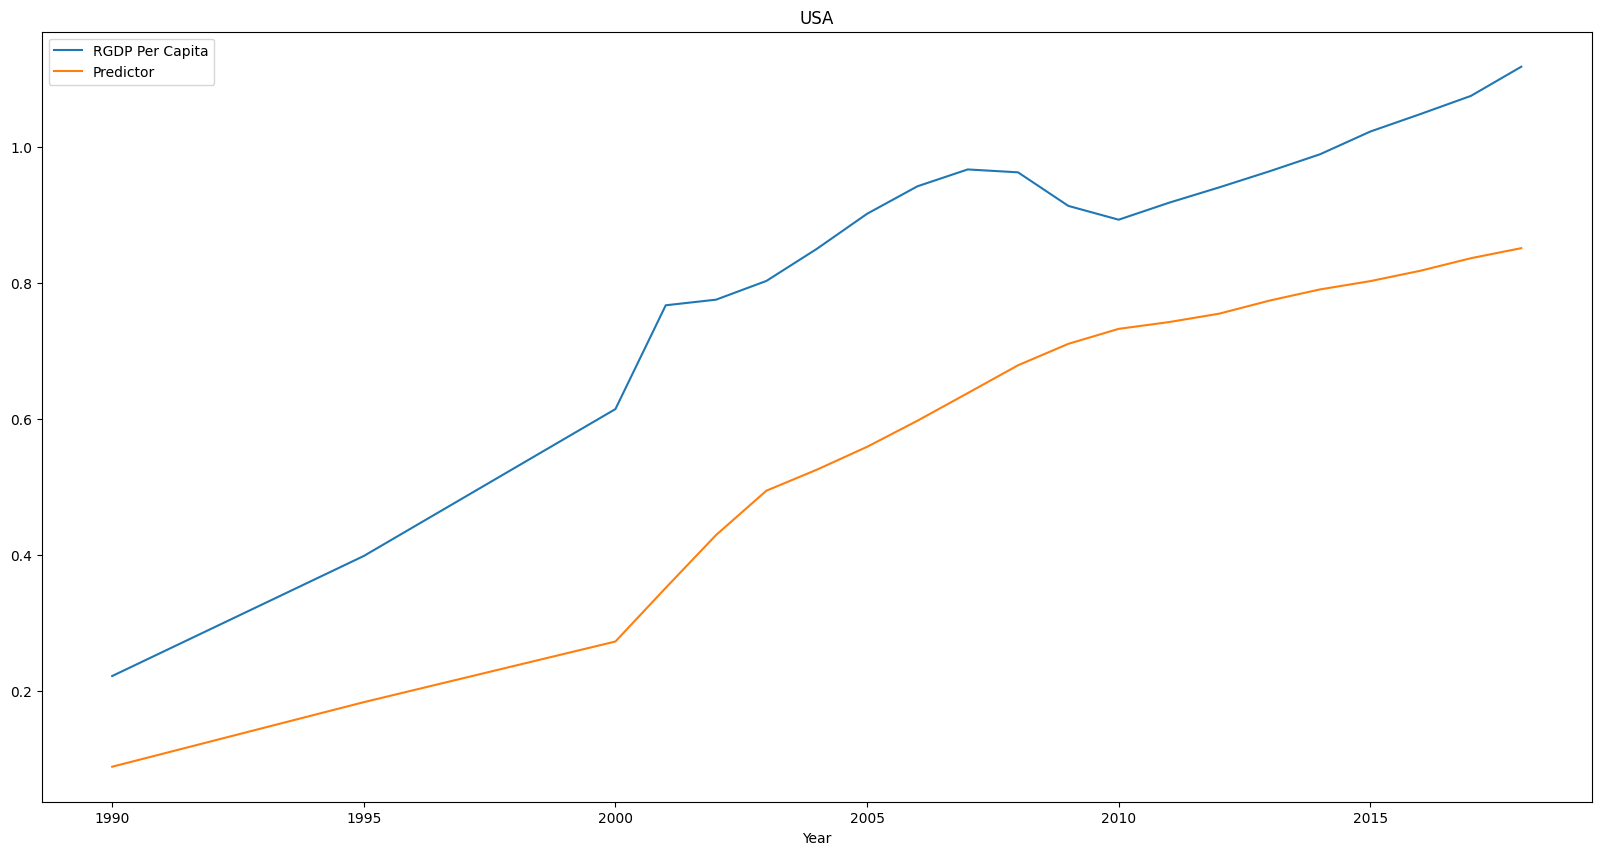

In [65]:
plot_data = r_data[["RGDP Per Capita", "Predictor"]]
for country in sorted(set(plot_data.reset_index()["ISO_Code_3"])):
    fig, ax = plt.subplots(figsize = (20,10))
    plot_data.loc[country].cumsum().plot.line(ax=ax)
    ax.set_title(country)
    plt.plot()